In [200]:
import pandas as pd

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

**automatic result export**

In [202]:
#still have to work on static link
#for now check automatic resuts export notebook 

In [203]:
#df = pd.read_csv('Espacenet_search_result.csv', delimiter=';' )

In [204]:
#skipping the first rows with description of the search
df = pd.read_csv('search-results-epo.csv',delimiter=';', skiprows=7)

In [205]:
import pandas as pd

# Assuming df is your DataFrame
df.rename(columns={
    'Titre': 'Title',
    'Inventeurs': 'Inventors',
    'Demandeurs': 'Applicants',
    'Numéro de publication': 'Publication number',
    'Priorité la plus ancienne': 'Earliest priority',
    'CIB': 'IPC',
    'CPC': 'CPC',
    'Date de publication': 'Publication date',
    'Publication la plus ancienne': 'Earliest publication',
    'Numéro de famille': 'Family number'
}, inplace=True)


In [206]:
df.columns

Index(['No', 'Title', 'Inventors', 'Applicants', 'Publication number',
       'Earliest priority', 'IPC', 'CPC', 'Publication date',
       'Earliest publication', 'Family number', 'Unnamed: 11'],
      dtype='object')

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   No                    500 non-null    int64  
 1   Title                 500 non-null    object 
 2   Inventors             498 non-null    object 
 3   Applicants            495 non-null    object 
 4   Publication number    500 non-null    object 
 5   Earliest priority     500 non-null    object 
 6   IPC                   499 non-null    object 
 7   CPC                   437 non-null    object 
 8   Publication date      500 non-null    object 
 9   Earliest publication  500 non-null    object 
 10  Family number         500 non-null    int64  
 11  Unnamed: 11           0 non-null      float64
dtypes: float64(1), int64(2), object(9)
memory usage: 47.0+ KB


In [208]:
df.columns

Index(['No', 'Title', 'Inventors', 'Applicants', 'Publication number',
       'Earliest priority', 'IPC', 'CPC', 'Publication date',
       'Earliest publication', 'Family number', 'Unnamed: 11'],
      dtype='object')

In [209]:

df[['first publication date','second publication date']] = df['Publication date'].str.split(' ' , n=1 , expand= True)
df['second publication date'] = df['second publication date'].str.strip('\n')
df.head()

No                                              Title  \
0   1    Plug-in hybrid vehicle with fast energy storage   
1   2  Vehicle charging system capable of hydrogen an...   
2   3  Electric vehicle charging system using hydroge...   
3   4  Electric vehicle wireless charging system thro...   
4   5           Vehicle electric battery charging system   

                                           Inventors  \
0  BENDER DONALD A [US] \r\nDESHMANE ATUL [US] \r...   
1                                      HONG SEONG HO   
2                                      HONG SEONG HO   
3                                  SON JEONG KI [KR]   
4                                JULIAN MENASHE [BS]   

                    Applicants Publication number Earliest priority  \
0  AFS TRINITY POWER CORP [US]     US2006250902A1        2005-05-05   
1       HOGREENAIR CO LTD [KR]      KR102511398B1        2022-09-20   
2       HOGREENAIR CO LTD [KR]      KR102511391B1        2022-09-20   
3            SON JEONG KI [KR]     KR20230163874A        2022-05-24   
4          JULIAN MENASHE [BS]         GB2631101A        2023-06-19   

                                                 IPC  \
0                                           H04B1/20   
1  B60L3/00 \r\nB60L53/16 \r\nB60L53/51 \r\nB60L5...   
2  B60L3/00 \r\nB60L53/16 \r\nB60L53/51 \r\nB60L5...   
3  B60L53/12 \r\nB60L53/38 \r\nB60L53/54 \r\nB60L...   
4                            B60L53/66 \r\nB60L53/68   

                                                 CPC Publication date  \
0  B60K6/20 (KR) \r\nB60K6/28 (KR) \r\nB60K6/30 (...       2006-11-09   
1                Y02T10/70 (EP) \r\nY02T10/7072 (EP)       2023-03-20   
2                                     Y02T10/70 (EP)       2023-03-20   
3  B60L53/12 (KR) \r\nB60L53/38 (KR) \r\nB60L53/5...       2023-12-01   
4  B60L50/10 (EP) \r\nB60L50/50 (EP) \r\nB60L50/7...       2024-12-25   

  Earliest publication  Family number  Unnamed: 11 first publication date  \
0           2006-11-09       37397092          NaN             2006-11-09   
1           2023-03-20       85796445          NaN             2023-03-20   
2           2023-03-20       85796535          NaN             2023-03-20   
3           2023-12-01       89124565          NaN             2023-12-01   
4           2024-12-25       91738186          NaN             2024-12-25   

  second publication date  
0                    None  
1                    None  
2                    None  
3                    None  
4                    None

In [210]:
df['first publication date']=pd.to_datetime(df['first publication date'])
df['second publication date']=pd.to_datetime(df['second publication date'])

In [211]:
#first filing country 
df[['first publication number', 'second publication number']] = df['Publication number'].str.split(' ' , n=1 , expand=True)



In [212]:
df['second publication number']=df['second publication number'].str.strip('\n')
df['first publication country'] = df['first publication number'].str[:2]
df['second publication country'] = df['second publication number'].str[:2]


In [213]:
df=df.drop('Unnamed: 11' , axis= 1 )


In [214]:

df['first filing year'] = df['first publication date'].dt.year

In [215]:

df['Earliest priority'] = pd.to_datetime(df['Earliest priority'])
df['earliest priority year'] = df['Earliest priority'].dt.year

In [216]:
df.head()

No                                              Title  \
0   1    Plug-in hybrid vehicle with fast energy storage   
1   2  Vehicle charging system capable of hydrogen an...   
2   3  Electric vehicle charging system using hydroge...   
3   4  Electric vehicle wireless charging system thro...   
4   5           Vehicle electric battery charging system   

                                           Inventors  \
0  BENDER DONALD A [US] \r\nDESHMANE ATUL [US] \r...   
1                                      HONG SEONG HO   
2                                      HONG SEONG HO   
3                                  SON JEONG KI [KR]   
4                                JULIAN MENASHE [BS]   

                    Applicants Publication number Earliest priority  \
0  AFS TRINITY POWER CORP [US]     US2006250902A1        2005-05-05   
1       HOGREENAIR CO LTD [KR]      KR102511398B1        2022-09-20   
2       HOGREENAIR CO LTD [KR]      KR102511391B1        2022-09-20   
3            SON JEONG KI [KR]     KR20230163874A        2022-05-24   
4          JULIAN MENASHE [BS]         GB2631101A        2023-06-19   

                                                 IPC  \
0                                           H04B1/20   
1  B60L3/00 \r\nB60L53/16 \r\nB60L53/51 \r\nB60L5...   
2  B60L3/00 \r\nB60L53/16 \r\nB60L53/51 \r\nB60L5...   
3  B60L53/12 \r\nB60L53/38 \r\nB60L53/54 \r\nB60L...   
4                            B60L53/66 \r\nB60L53/68   

                                                 CPC Publication date  \
0  B60K6/20 (KR) \r\nB60K6/28 (KR) \r\nB60K6/30 (...       2006-11-09   
1                Y02T10/70 (EP) \r\nY02T10/7072 (EP)       2023-03-20   
2                                     Y02T10/70 (EP)       2023-03-20   
3  B60L53/12 (KR) \r\nB60L53/38 (KR) \r\nB60L53/5...       2023-12-01   
4  B60L50/10 (EP) \r\nB60L50/50 (EP) \r\nB60L50/7...       2024-12-25   

  Earliest publication  Family number first publication date  \
0           2006-11-09       37397092             2006-11-09   
1           2023-03-20       85796445             2023-03-20   
2           2023-03-20       85796535             2023-03-20   
3           2023-12-01       89124565             2023-12-01   
4           2024-12-25       91738186             2024-12-25   

  second publication date first publication number second publication number  \
0                     NaT           US2006250902A1                      None   
1                     NaT            KR102511398B1                      None   
2                     NaT            KR102511391B1                      None   
3                     NaT           KR20230163874A                      None   
4                     NaT               GB2631101A                      None   

  first publication country second publication country  first filing year  \
0                        US                       None               2006   
1                        KR                       None               2023   
2                        KR                       None               2023   
3                        KR                       None               2023   
4                        GB                       None               2024   

   earliest priority year  
0                    2005  
1                    2022  
2                    2022  
3                    2022  
4                    2023

In [217]:
df.columns

Index(['No', 'Title', 'Inventors', 'Applicants', 'Publication number',
       'Earliest priority', 'IPC', 'CPC', 'Publication date',
       'Earliest publication', 'Family number', 'first publication date',
       'second publication date', 'first publication number',
       'second publication number', 'first publication country',
       'second publication country', 'first filing year',
       'earliest priority year'],
      dtype='object')

In [218]:
df['applicant country'] = df['Applicants'].str.extract(r'\[([A-Z]{2})\]')

In [219]:
len(df)

500

In [220]:
df = df.dropna(subset=['Inventors'])

In [221]:
len(df)

498

first filing analysis 


In [222]:

df['Applicants'] = df['Applicants'].fillna(df['Inventors'])

In [223]:
df = df.reset_index(drop=True)


In [224]:
df.head()

No                                              Title  \
0   1    Plug-in hybrid vehicle with fast energy storage   
1   2  Vehicle charging system capable of hydrogen an...   
2   3  Electric vehicle charging system using hydroge...   
3   4  Electric vehicle wireless charging system thro...   
4   5           Vehicle electric battery charging system   

                                           Inventors  \
0  BENDER DONALD A [US] \r\nDESHMANE ATUL [US] \r...   
1                                      HONG SEONG HO   
2                                      HONG SEONG HO   
3                                  SON JEONG KI [KR]   
4                                JULIAN MENASHE [BS]   

                    Applicants Publication number Earliest priority  \
0  AFS TRINITY POWER CORP [US]     US2006250902A1        2005-05-05   
1       HOGREENAIR CO LTD [KR]      KR102511398B1        2022-09-20   
2       HOGREENAIR CO LTD [KR]      KR102511391B1        2022-09-20   
3            SON JEONG KI [KR]     KR20230163874A        2022-05-24   
4          JULIAN MENASHE [BS]         GB2631101A        2023-06-19   

                                                 IPC  \
0                                           H04B1/20   
1  B60L3/00 \r\nB60L53/16 \r\nB60L53/51 \r\nB60L5...   
2  B60L3/00 \r\nB60L53/16 \r\nB60L53/51 \r\nB60L5...   
3  B60L53/12 \r\nB60L53/38 \r\nB60L53/54 \r\nB60L...   
4                            B60L53/66 \r\nB60L53/68   

                                                 CPC Publication date  \
0  B60K6/20 (KR) \r\nB60K6/28 (KR) \r\nB60K6/30 (...       2006-11-09   
1                Y02T10/70 (EP) \r\nY02T10/7072 (EP)       2023-03-20   
2                                     Y02T10/70 (EP)       2023-03-20   
3  B60L53/12 (KR) \r\nB60L53/38 (KR) \r\nB60L53/5...       2023-12-01   
4  B60L50/10 (EP) \r\nB60L50/50 (EP) \r\nB60L50/7...       2024-12-25   

  Earliest publication  Family number first publication date  \
0           2006-11-09       37397092             2006-11-09   
1           2023-03-20       85796445             2023-03-20   
2           2023-03-20       85796535             2023-03-20   
3           2023-12-01       89124565             2023-12-01   
4           2024-12-25       91738186             2024-12-25   

  second publication date first publication number second publication number  \
0                     NaT           US2006250902A1                      None   
1                     NaT            KR102511398B1                      None   
2                     NaT            KR102511391B1                      None   
3                     NaT           KR20230163874A                      None   
4                     NaT               GB2631101A                      None   

  first publication country second publication country  first filing year  \
0                        US                       None               2006   
1                        KR                       None               2023   
2                        KR                       None               2023   
3                        KR                       None               2023   
4                        GB                       None               2024   

   earliest priority year applicant country  
0                    2005                US  
1                    2022                KR  
2                    2022                KR  
3                    2022                KR  
4                    2023                BS

In [225]:
len(df)

498

In [226]:
df = df.dropna(subset=['Inventors','Applicants','IPC'])

In [227]:
len(df)

497

In [228]:
#filling missing CPC values 
df['CPC'] = df['CPC'].fillna('unkown')
df.isnull().sum()

No                              0
Title                           0
Inventors                       0
Applicants                      0
Publication number              0
Earliest priority               0
IPC                             0
CPC                             0
Publication date                0
Earliest publication            0
Family number                   0
first publication date          0
second publication date       389
first publication number        0
second publication number     389
first publication country       0
second publication country    389
first filing year               0
earliest priority year          0
applicant country             386
dtype: int64

In [229]:
df['IPC'] = df['IPC'].str.split(r'\s+')



In [230]:
df['IPC']

0                                             [H04B1/20]
1      [B60L3/00, B60L53/16, B60L53/51, B60L53/54, B6...
2      [B60L3/00, B60L53/16, B60L53/51, B60L53/54, B6...
3      [B60L53/12, B60L53/38, B60L53/54, B60L53/66, B...
4                                 [B60L53/66, B60L53/68]
                             ...                        
493                                 [H02H7/18, H02J7/00]
494    [A62B13/00, B60P3/00, F24D15/00, F24F11/64, F2...
495                                 [H02J7/02, H02J7/34]
496          [B60L3/00, B60L58/12, B60L58/30, H01M10/42]
497                               [B60L58/30, B60L58/31]
Name: IPC, Length: 497, dtype: object

In [231]:
import re

def split_cpc(classification):
    # Split only at ") " but keep the ")"
    parts = re.split(r'\)\s+', classification)  
    return [p + ')' if not p.endswith(')') else p for p in parts]  # Ensure each part ends with ')'


df['CPC'] = df['CPC'].apply(split_cpc)



In [232]:
df['CPC'][1]

['Y02T10/70 (EP)', 'Y02T10/7072 (EP)']

In [233]:
df.columns

Index(['No', 'Title', 'Inventors', 'Applicants', 'Publication number',
       'Earliest priority', 'IPC', 'CPC', 'Publication date',
       'Earliest publication', 'Family number', 'first publication date',
       'second publication date', 'first publication number',
       'second publication number', 'first publication country',
       'second publication country', 'first filing year',
       'earliest priority year', 'applicant country'],
      dtype='object')

In [234]:
df.head()

No                                              Title  \
0   1    Plug-in hybrid vehicle with fast energy storage   
1   2  Vehicle charging system capable of hydrogen an...   
2   3  Electric vehicle charging system using hydroge...   
3   4  Electric vehicle wireless charging system thro...   
4   5           Vehicle electric battery charging system   

                                           Inventors  \
0  BENDER DONALD A [US] \r\nDESHMANE ATUL [US] \r...   
1                                      HONG SEONG HO   
2                                      HONG SEONG HO   
3                                  SON JEONG KI [KR]   
4                                JULIAN MENASHE [BS]   

                    Applicants Publication number Earliest priority  \
0  AFS TRINITY POWER CORP [US]     US2006250902A1        2005-05-05   
1       HOGREENAIR CO LTD [KR]      KR102511398B1        2022-09-20   
2       HOGREENAIR CO LTD [KR]      KR102511391B1        2022-09-20   
3            SON JEONG KI [KR]     KR20230163874A        2022-05-24   
4          JULIAN MENASHE [BS]         GB2631101A        2023-06-19   

                                                 IPC  \
0                                         [H04B1/20]   
1  [B60L3/00, B60L53/16, B60L53/51, B60L53/54, B6...   
2  [B60L3/00, B60L53/16, B60L53/51, B60L53/54, B6...   
3  [B60L53/12, B60L53/38, B60L53/54, B60L53/66, B...   
4                             [B60L53/66, B60L53/68]   

                                                 CPC Publication date  \
0  [B60K6/20 (KR), B60K6/28 (KR), B60K6/30 (EP,US...       2006-11-09   
1                 [Y02T10/70 (EP), Y02T10/7072 (EP)]       2023-03-20   
2                                   [Y02T10/70 (EP)]       2023-03-20   
3  [B60L53/12 (KR), B60L53/38 (KR), B60L53/54 (KR...       2023-12-01   
4  [B60L50/10 (EP), B60L50/50 (EP), B60L50/75 (EP...       2024-12-25   

  Earliest publication  Family number first publication date  \
0           2006-11-09       37397092             2006-11-09   
1           2023-03-20       85796445             2023-03-20   
2           2023-03-20       85796535             2023-03-20   
3           2023-12-01       89124565             2023-12-01   
4           2024-12-25       91738186             2024-12-25   

  second publication date first publication number second publication number  \
0                     NaT           US2006250902A1                      None   
1                     NaT            KR102511398B1                      None   
2                     NaT            KR102511391B1                      None   
3                     NaT           KR20230163874A                      None   
4                     NaT               GB2631101A                      None   

  first publication country second publication country  first filing year  \
0                        US                       None               2006   
1                        KR                       None               2023   
2                        KR                       None               2023   
3                        KR                       None               2023   
4                        GB                       None               2024   

   earliest priority year applicant country  
0                    2005                US  
1                    2022                KR  
2                    2022                KR  
3                    2022                KR  
4                    2023                BS

adding family mumbers column based on publication number and family number 

In [235]:
len(df)

497

In [236]:
df.head()

No                                              Title  \
0   1    Plug-in hybrid vehicle with fast energy storage   
1   2  Vehicle charging system capable of hydrogen an...   
2   3  Electric vehicle charging system using hydroge...   
3   4  Electric vehicle wireless charging system thro...   
4   5           Vehicle electric battery charging system   

                                           Inventors  \
0  BENDER DONALD A [US] \r\nDESHMANE ATUL [US] \r...   
1                                      HONG SEONG HO   
2                                      HONG SEONG HO   
3                                  SON JEONG KI [KR]   
4                                JULIAN MENASHE [BS]   

                    Applicants Publication number Earliest priority  \
0  AFS TRINITY POWER CORP [US]     US2006250902A1        2005-05-05   
1       HOGREENAIR CO LTD [KR]      KR102511398B1        2022-09-20   
2       HOGREENAIR CO LTD [KR]      KR102511391B1        2022-09-20   
3            SON JEONG KI [KR]     KR20230163874A        2022-05-24   
4          JULIAN MENASHE [BS]         GB2631101A        2023-06-19   

                                                 IPC  \
0                                         [H04B1/20]   
1  [B60L3/00, B60L53/16, B60L53/51, B60L53/54, B6...   
2  [B60L3/00, B60L53/16, B60L53/51, B60L53/54, B6...   
3  [B60L53/12, B60L53/38, B60L53/54, B60L53/66, B...   
4                             [B60L53/66, B60L53/68]   

                                                 CPC Publication date  \
0  [B60K6/20 (KR), B60K6/28 (KR), B60K6/30 (EP,US...       2006-11-09   
1                 [Y02T10/70 (EP), Y02T10/7072 (EP)]       2023-03-20   
2                                   [Y02T10/70 (EP)]       2023-03-20   
3  [B60L53/12 (KR), B60L53/38 (KR), B60L53/54 (KR...       2023-12-01   
4  [B60L50/10 (EP), B60L50/50 (EP), B60L50/75 (EP...       2024-12-25   

  Earliest publication  Family number first publication date  \
0           2006-11-09       37397092             2006-11-09   
1           2023-03-20       85796445             2023-03-20   
2           2023-03-20       85796535             2023-03-20   
3           2023-12-01       89124565             2023-12-01   
4           2024-12-25       91738186             2024-12-25   

  second publication date first publication number second publication number  \
0                     NaT           US2006250902A1                      None   
1                     NaT            KR102511398B1                      None   
2                     NaT            KR102511391B1                      None   
3                     NaT           KR20230163874A                      None   
4                     NaT               GB2631101A                      None   

  first publication country second publication country  first filing year  \
0                        US                       None               2006   
1                        KR                       None               2023   
2                        KR                       None               2023   
3                        KR                       None               2023   
4                        GB                       None               2024   

   earliest priority year applicant country  
0                    2005                US  
1                    2022                KR  
2                    2022                KR  
3                    2022                KR  
4                    2023                BS

**retrieve family members**

In [237]:
import os
import requests
import time
from urllib.parse import quote
import pandas as pd
from dotenv import load_dotenv

# Global token cache
TOKEN = None
TOKEN_EXPIRY = 0

# Constants for API endpoints
TOKEN_URL = "https://ops.epo.org/3.2/auth/accesstoken"
BASE_URL = "https://ops.epo.org/3.2/rest-services"

# Load credentials from .env file
load_dotenv()
CONSUMER_KEY = os.getenv("CONSUMER_KEY").strip()
CONSUMER_SECRET = os.getenv("CONSUMER_SECRET").strip()

def get_access_token() -> str:
    """Get or refresh the OAuth access token."""
    global TOKEN, TOKEN_EXPIRY
    if TOKEN and time.time() < TOKEN_EXPIRY:
        return TOKEN
    data = {
        "grant_type": "client_credentials",
        "client_id": CONSUMER_KEY,
        "client_secret": CONSUMER_SECRET
    }
    headers = {"Content-Type": "application/x-www-form-urlencoded"}
    response = requests.post(TOKEN_URL, data=data, headers=headers, timeout=15)
    response.raise_for_status()
    TOKEN = response.json()["access_token"]
    TOKEN_EXPIRY = time.time() + 3500  # approximately 58 minutes
    return TOKEN

def validate_patent_number(patent: str) -> bool:
    """Perform a basic validation for the patent number format."""
    if not patent or len(patent.strip()) < 4:
        return False
    return True

def extract_jurisdictions_and_members(data: dict) -> dict:
    """
    Extract jurisdictions (as a sorted list) and family member publication numbers
    (formatted as country+doc-number+kind) from the JSON response.
    """
    try:
        jurisdictions = set()
        family_members = []
        world_data = data.get('ops:world-patent-data', {})
        patent_family = world_data.get('ops:patent-family', {})
        members = patent_family.get('ops:family-member', [])
        if isinstance(members, dict):
            members = [members]

        for member in members:
            pub_ref = member.get('publication-reference', {})
            docs = pub_ref.get('document-id', [])
            if isinstance(docs, dict):
                docs = [docs]

            for doc in docs:
                if doc.get('@document-id-type') == 'docdb':
                    country = doc.get('country')
                    if isinstance(country, dict):
                        country = country.get('$')
                    doc_number = doc.get('doc-number')
                    if isinstance(doc_number, dict):
                        doc_number = doc_number.get('$')
                    kind = doc.get('kind')
                    if isinstance(kind, dict):
                        kind = kind.get('$')

                    if country and doc_number and kind:
                        jurisdictions.add(country)
                        family_members.append(f"{country}{doc_number}{kind}")

        return {
            'jurisdictions': sorted(jurisdictions),
            'family_members': sorted(set(family_members))
        }

    except Exception as e:
        print(f"Error parsing response: {e}")
        return {'jurisdictions': None, 'family_members': None}

def process_patent(patent: str) -> dict:
    """
    Process a single patent by sending a request to the patent family endpoint,
    then extract family jurisdictions and family member publication numbers.
    Returns a dict with two keys: 'jurisdictions' and 'family_members'.
    """
    if not validate_patent_number(patent):
        print(f"Invalid patent number: {patent}")
        return {'jurisdictions': None, 'family_members': None}
    try:
        token = get_access_token()
        url = f"{BASE_URL}/family/publication/docdb/{quote(patent)}"
        headers = {
            "Authorization": f"Bearer {token}",
            "Accept": "application/json"
        }
        response = requests.get(url, headers=headers, timeout=15)
        if response.status_code == 403:
            print(f"Access forbidden for patent {patent}")
            return {'jurisdictions': None, 'family_members': None}
        if response.status_code == 404:
            print(f"Patent {patent} not found")
            return {'jurisdictions': None, 'family_members': None}
        response.raise_for_status()
        data = response.json()
        return extract_jurisdictions_and_members(data)
    except Exception as e:
        print(f"Error processing patent {patent}: {e}")
        return {'jurisdictions': None, 'family_members': None}

def process_dataframe(df: pd.DataFrame, patent_col: str) -> pd.DataFrame:
    """
    For a DataFrame containing a column of patent numbers,
    process each patent (in batches) and add two new columns:
      - 'family_jurisdictions': sorted list of jurisdictions for the patent's family
      - 'family_members': sorted list of publication numbers for family members
    """
    if patent_col not in df.columns:
        raise ValueError(f"Column '{patent_col}' not found in DataFrame")
    result_df = df.copy()
    patents = result_df[patent_col].tolist()
    total = len(patents)
    batch_size = 100
    request_delay = 1.2  # seconds delay between requests
    results = {}

    for i in range(0, total, batch_size):
        batch = patents[i:i + batch_size]
        print(f"\nProcessing batch {i//batch_size + 1}/{(total - 1)//batch_size + 1}")
        for patent in batch:
            results[patent] = process_patent(patent)
            time.sleep(request_delay)
        if i + batch_size < total:
            print("Pausing between batches...")
            time.sleep(1)
            
    # Map the processed results to new DataFrame columns
    result_df['family_jurisdictions'] = result_df[patent_col].map(
        lambda p: results.get(p, {}).get('jurisdictions')
    )
    result_df['family_members'] = result_df[patent_col].map(
        lambda p: results.get(p, {}).get('family_members')
    )
    return result_df

# ======= USAGE EXAMPLE =======
if __name__ == "__main__":
    # Example: Create a sample DataFrame.
    # df = pd.DataFrame({
    #     'first publication number': [
    #         'US2006250902A1', 'KR102511391B1', 'EP2840123A1',
    #         'INVALID_PATENT', 'US2022140365A1'
    #     ],
    #     'title': ['Title A', 'Title B', 'Title C', 'Title D', 'Title E']
    # })
    
    # Process the DataFrame using the column "first publication number"
    try:
        processed_df = process_dataframe(df, 'first publication number')
        print("\nFinal Results:")
        print(processed_df[['first publication number', 'family_jurisdictions', 'family_members']])
        # Optionally, export the results to CSV
        #processed_df.to_csv('patent_jurisdictions.csv', index=False)
    except Exception as e:
        print(f"Processing failed: {e}")



Processing batch 1/5


Pausing between batches...

Processing batch 2/5
Pausing between batches...

Processing batch 3/5
Pausing between batches...

Processing batch 4/5
Pausing between batches...

Processing batch 5/5

Final Results:
    first publication number                  family_jurisdictions  \
0             US2006250902A1  [AU, CA, CN, EP, HK, JP, KR, US, WO]   
1              KR102511398B1                                  [KR]   
2              KR102511391B1                                  [KR]   
3             KR20230163874A                                  [KR]   
4                 GB2631101A                              [GB, WO]   
..                       ...                                   ...   
493             CN212784823U                                  [CN]   
494             CN111668919A                                  [CN]   
495             CN105162225A                                  [CN]   
496             CN110722990A                                  [CN]   
497             CN

In [238]:
df=processed_df

In [239]:
len(processed_df)

497

extracting abstract 

In [240]:
import os
import requests
from urllib.parse import quote
from dotenv import load_dotenv
import json
import pandas as pd
import time


load_dotenv()
CONSUMER_KEY = os.getenv("CONSUMER_KEY").strip()
CONSUMER_SECRET = os.getenv("CONSUMER_SECRET").strip()

TOKEN_URL = "https://ops.epo.org/3.2/auth/accesstoken"
BASE_URL = "https://ops.epo.org/3.2/rest-services"

# === Functions ===

def get_access_token() -> str:
    """
    Obtain an OAuth access token from OPS.
    """
    data = {
        "grant_type": "client_credentials",
        "client_id": CONSUMER_KEY,
        "client_secret": CONSUMER_SECRET
    }
    headers = {"Content-Type": "application/x-www-form-urlencoded"}
    response = requests.post(TOKEN_URL, data=data, headers=headers, timeout=15)
    response.raise_for_status()
    return response.json()["access_token"]

def get_abstract_json(publication_number: str) -> dict:
    """
    Retrieve the abstract for a given publication number as JSON.
    
    For example, for publication_number = 'KR102511398B1', the endpoint URL becomes:
      https://ops.epo.org/3.2/rest-services/published-data/publication/docdb/KR102511398B1/abstract
    """
    token = get_access_token()
    url = f"{BASE_URL}/published-data/publication/docdb/{quote(publication_number)}/abstract"
    headers = {
        "Authorization": f"Bearer {token}",
        "Accept": "application/json"
    }
    response = requests.get(url, headers=headers, timeout=15)
    print(f"Fetching {publication_number} - Status code: {response.status_code}")
    response.raise_for_status()
    return response.json()

def extract_english_abstract_from_json(json_data: dict) -> str:
    """
    Given the JSON response from the OPS abstract endpoint, extract and return the English abstract text.
    Returns the abstract text as a string or None if not found.
    """
    try:
        world_data = json_data.get("ops:world-patent-data", {})
        exch_docs = world_data.get("exchange-documents", {})
        doc = exch_docs.get("exchange-document", {})
        abstract_section = doc.get("abstract", [])
        # If abstract is a dict (only one present), convert it to a list
        if isinstance(abstract_section, dict):
            abstract_section = [abstract_section]
        for abstract in abstract_section:
            if abstract.get("@lang") == "en":
                # The abstract text is in the "p" field as a dict with key "$"
                p = abstract.get("p")
                if isinstance(p, dict):
                    return p.get("$", "").strip()
                elif isinstance(p, list):
                    # In case of multiple paragraphs
                    return " ".join(item.get("$", "").strip() for item in p if isinstance(item, dict))
                elif isinstance(p, str):
                    return p.strip()
        return None
    except Exception as e:
        print("Error extracting English abstract:", e)
        return None

def add_abstracts_to_dataframe(df: pd.DataFrame, patent_col: str) -> pd.DataFrame:
    """
    Enrich the DataFrame by adding an 'english_abstract' column.
    For each patent number in the patent_col, this function:
      1. Retrieves the abstract JSON from the OPS API.
      2. Extracts the English abstract using extract_english_abstract_from_json().
      3. Stores the result in a new column.
      
    A delay is added between requests to comply with rate limits.
    """
    if patent_col not in df.columns:
        raise ValueError(f"Column '{patent_col}' not found in DataFrame")
    
    abstracts = []
    total = len(df)
    for idx, pub_number in enumerate(df[patent_col]):
        print(f"Processing {idx+1}/{total}: {pub_number}")
        try:
            json_data = get_abstract_json(pub_number)
            abstract_text = extract_english_abstract_from_json(json_data)
        except Exception as e:
            print(f"Error processing {pub_number}: {e}")
            abstract_text = None
        abstracts.append(abstract_text)
       
        time.sleep(1.2)
    df = df.copy()
    df["abstract"] = abstracts
    return df


if __name__ == "__main__":

    enriched_df = add_abstracts_to_dataframe(df, "first publication number")
    

    print(enriched_df[["first publication number", "abstract"]])



Processing 1/497: US2006250902A1
Fetching US2006250902A1 - Status code: 200
Processing 2/497: KR102511398B1
Fetching KR102511398B1 - Status code: 200
Processing 3/497: KR102511391B1
Fetching KR102511391B1 - Status code: 200
Processing 4/497: KR20230163874A
Fetching KR20230163874A - Status code: 200
Processing 5/497: GB2631101A
Fetching GB2631101A - Status code: 200
Processing 6/497: CN105098267A
Fetching CN105098267A - Status code: 200
Processing 7/497: US2022140365A1
Fetching US2022140365A1 - Status code: 200
Processing 8/497: WO2011019133A2
Fetching WO2011019133A2 - Status code: 200
Processing 9/497: TW201310755A
Fetching TW201310755A - Status code: 200
Processing 10/497: CN108550935A
Fetching CN108550935A - Status code: 200
Processing 11/497: CN112606713A
Fetching CN112606713A - Status code: 200
Processing 12/497: US2013093378A1
Fetching US2013093378A1 - Status code: 200
Processing 13/497: CN109263516A
Fetching CN109263516A - Status code: 200
Processing 14/497: CN110015205A
Fetching

In [241]:
enriched_df.head()

No                                              Title  \
0   1    Plug-in hybrid vehicle with fast energy storage   
1   2  Vehicle charging system capable of hydrogen an...   
2   3  Electric vehicle charging system using hydroge...   
3   4  Electric vehicle wireless charging system thro...   
4   5           Vehicle electric battery charging system   

                                           Inventors  \
0  BENDER DONALD A [US] \r\nDESHMANE ATUL [US] \r...   
1                                      HONG SEONG HO   
2                                      HONG SEONG HO   
3                                  SON JEONG KI [KR]   
4                                JULIAN MENASHE [BS]   

                    Applicants Publication number Earliest priority  \
0  AFS TRINITY POWER CORP [US]     US2006250902A1        2005-05-05   
1       HOGREENAIR CO LTD [KR]      KR102511398B1        2022-09-20   
2       HOGREENAIR CO LTD [KR]      KR102511391B1        2022-09-20   
3            SON JEONG KI [KR]     KR20230163874A        2022-05-24   
4          JULIAN MENASHE [BS]         GB2631101A        2023-06-19   

                                                 IPC  \
0                                         [H04B1/20]   
1  [B60L3/00, B60L53/16, B60L53/51, B60L53/54, B6...   
2  [B60L3/00, B60L53/16, B60L53/51, B60L53/54, B6...   
3  [B60L53/12, B60L53/38, B60L53/54, B60L53/66, B...   
4                             [B60L53/66, B60L53/68]   

                                                 CPC Publication date  \
0  [B60K6/20 (KR), B60K6/28 (KR), B60K6/30 (EP,US...       2006-11-09   
1                 [Y02T10/70 (EP), Y02T10/7072 (EP)]       2023-03-20   
2                                   [Y02T10/70 (EP)]       2023-03-20   
3  [B60L53/12 (KR), B60L53/38 (KR), B60L53/54 (KR...       2023-12-01   
4  [B60L50/10 (EP), B60L50/50 (EP), B60L50/75 (EP...       2024-12-25   

  Earliest publication  ...  first publication number  \
0           2006-11-09  ...            US2006250902A1   
1           2023-03-20  ...             KR102511398B1   
2           2023-03-20  ...             KR102511391B1   
3           2023-12-01  ...            KR20230163874A   
4           2024-12-25  ...                GB2631101A   

  second publication number first publication country  \
0                      None                        US   
1                      None                        KR   
2                      None                        KR   
3                      None                        KR   
4                      None                        GB   

  second publication country first filing year earliest priority year  \
0                       None              2006                   2005   
1                       None              2023                   2022   
2                       None              2023                   2022   
3                       None              2023                   2022   
4                       None              2024                   2023   

  applicant country                  family_jurisdictions  \
0                US  [AU, CA, CN, EP, HK, JP, KR, US, WO]   
1                KR                                  [KR]   
2                KR                                  [KR]   
3                KR                                  [KR]   
4                BS                              [GB, WO]   

                                      family_members  \
0  [AU2006295147A1, AU2006295147B2, CA2623398A1, ...   
1                                    [KR102511398B1]   
2                                    [KR102511391B1]   
3                                   [KR20230163874A]   
4                       [GB2631101A, WO2024261465A1]   

                                            abstract  
0  This invention relates to plug-in hybrid propu...  
1  The present invention relates to a vehicle cha...  
2  The present invention relates to an electric v...  
3  The present invention relates to a system for ... 

keyword analysis

In [242]:
keyword_df = enriched_df[['first publication number','Title','abstract','first filing year']].head(100)

In [243]:
keyword_df = keyword_df.dropna(subset=['abstract'])

In [244]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

#preprocessing : lowercase and remove puctuation , remove stop words and perform stemming an lemmatization 
# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
def preprocess_text(text: str,use_stemming: bool = True) -> str:
    # Lowercase and remove punctuation
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    if use_stemming:
        tokens = [stemmer.stem(word) for word in tokens]
    else:
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

# Example usage:
keyword_df['abstract'] = keyword_df['abstract'].apply(preprocess_text)

keyword_df['abstract'].head()


0    invent relat plugin hybrid propuls system ener...
1    present invent relat vehicl charg system hydro...
2    present invent relat electr vehicl charg syste...
3    present invent relat system wirelessli charg e...
4    batteri arrang 430 electricallypow vehicl 130 ...
Name: abstract, dtype: object

In [245]:
from sklearn.feature_extraction.text import TfidfVectorizer


abstracts = [
    preprocess_text(abst) for abst in keyword_df['abstract'].tolist()
]

vectorizer = TfidfVectorizer(max_df=0.85, min_df=2, ngram_range=(1, 3))
tfidf_matrix = vectorizer.fit_transform(abstracts) #learns the vocabulary and inverse document frequency from the abstaracts and transforms the abstracts into a TF-IDF matrix

feature_names = vectorizer.get_feature_names_out() #retrieves the feature names from the vectorizer 
print("Top 10 keywords overall:")

avg_scores = tfidf_matrix.mean(axis=0).tolist()[0]  # Compute average TF-IDF scores for each term

keywords = sorted(zip(feature_names, avg_scores), key=lambda x: x[1], reverse=True)  # Combine term with score and sort
keywords[:10]


Top 10 keywords overall:


[('hydrogen', 0.07972099404527874),
 ('fuel', 0.057444421549966936),
 ('system', 0.054865779846516895),
 ('power', 0.05364086478707619),
 ('cell', 0.0493379394096047),
 ('energi', 0.047726169954346566),
 ('storag', 0.04266498305693749),
 ('electr vehicl', 0.039882864506868176),
 ('fuel cell', 0.0391255641647814),
 ('hydrogen fuel', 0.03751343706613889)]

In [246]:
from itertools import combinations
import pandas as pd
import networkx as nx

# Split preprocessed abstracts into lists of words (keywords)
keyword_df['keywords'] = keyword_df['abstract'].apply(lambda x: x.split())

# Build co-occurrence edges (pairs of keywords that appear in the same abstract)
edges = []
for keyword_list in keyword_df['keywords']:
    pairs = list(combinations(set(keyword_list), 2)) 
    edges.extend(pairs)

# Count edge frequencies
edge_df = pd.DataFrame(edges, columns=["source", "target"])
edge_weights = edge_df.value_counts().reset_index(name='weight')


In [247]:
from neo4j import GraphDatabase

#MATCH (a:Keyword)-[r:CO_OCCURS_WITH]->(b:Keyword)
#RETURN a, r, b
uri = "bolt://localhost:7687"
username = "neo4j"
password = "tasnim4719"

# Connect to Neo4j
driver = GraphDatabase.driver(uri, auth=(username, password))

def create_keyword_network(tx, source, target, weight):
    # Create nodes and relationships (MERGE avoids duplicates)
    tx.run("""
        MERGE (a:Keyword {name: $source})
        MERGE (b:Keyword {name: $target})
        MERGE (a)-[r:CO_OCCURS_WITH]->(b)
        ON CREATE SET r.weight = $weight
        ON MATCH SET r.weight = r.weight + $weight
    """, source=source, target=target, weight=weight)

# Write edges to Neo4j
with driver.session() as session:
    for _, row in edge_weights.iterrows():
        session.write_transaction(create_keyword_network, row["source"], row["target"], int(row["weight"]))


C:\Users\tasni\AppData\Local\Temp\ipykernel_24548\943754677.py:25: DeprecationWarning:

write_transaction has been renamed to execute_write



In [248]:
import networkx as nx
from itertools import combinations
from collections import Counter, defaultdict

def build_cooccurrence_network(abstracts, top_keywords=None, window_size=5):
    
    G = nx.Graph()
    token_lists = [abstract.split() for abstract in abstracts]
    
    cooccurrence = defaultdict(int)
    
    for tokens in token_lists:
        # You may choose to filter tokens if top_keywords is not None:
        if top_keywords:
            tokens = [token for token in tokens if token in top_keywords]
        # Using combinations of tokens in the entire document (or use sliding window)
        # For a sliding window, you can iterate through indices.
        for token_pair in combinations(set(tokens), 2):
            cooccurrence[tuple(sorted(token_pair))] += 1
    
    # Build graph from co-occurrence dictionary
    for (w1, w2), weight in cooccurrence.items():
        if weight > 1:  # include only stronger connections if you wish
            G.add_edge(w1, w2, weight=weight)
    return G

# Build a network from your abstracts
G = build_cooccurrence_network(abstracts)
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())




Number of nodes: 605
Number of edges: 18180


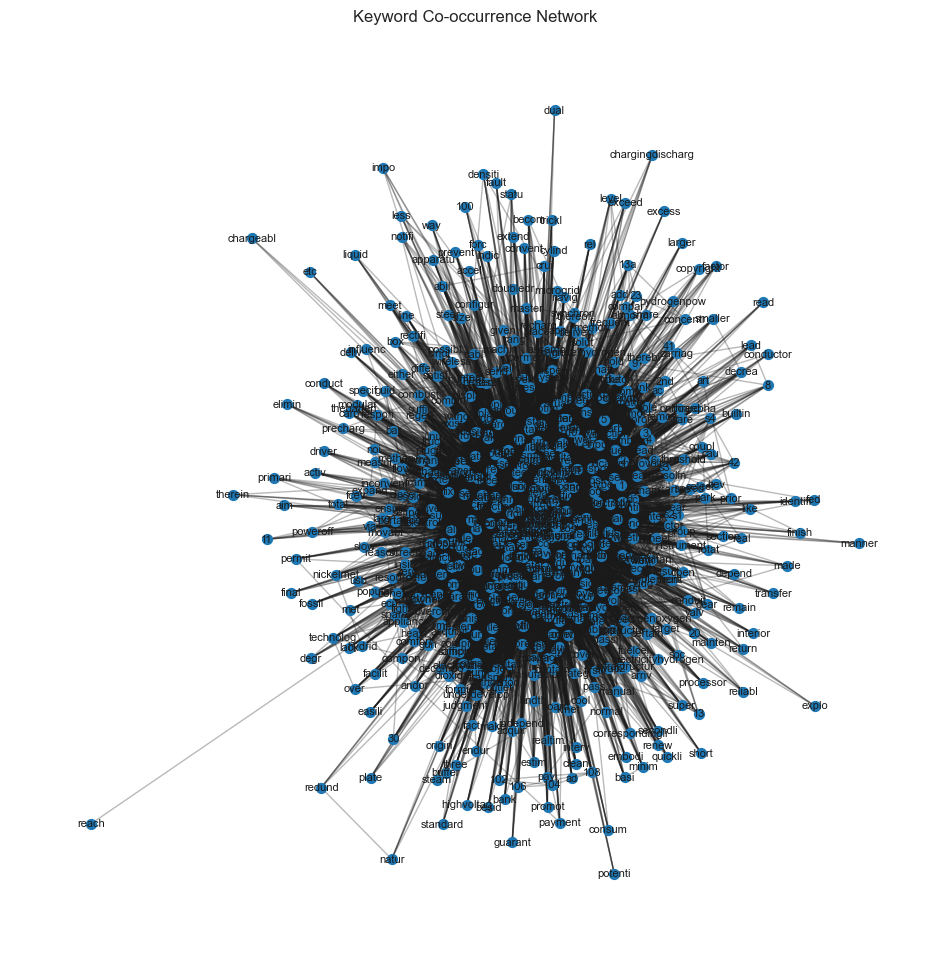

In [249]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(G, k=0.15, iterations=20)
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_size=50)
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.title("Keyword Co-occurrence Network")
plt.axis("off")
plt.show()


In [250]:
#calculate the degree centrality of nodes in tha graph 
#degree centrality is a measure of the number of direct connnections a node has 
degree_centrality = nx.degree_centrality(G)
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 keywords by degree centrality:")
print(top_degree)


Top 10 keywords by degree centrality:
[('electr', 0.9652317880794702), ('charg', 0.945364238410596), ('batteri', 0.923841059602649), ('vehicl', 0.8956953642384106), ('hydrogen', 0.8642384105960265), ('power', 0.8410596026490066), ('system', 0.7632450331125827), ('compri', 0.7566225165562914), ('fuel', 0.6870860927152318), ('invent', 0.6870860927152318)]


dynamic term clustering

In [251]:
#combine abstracts by year 
grouped = keyword_df.groupby("first filing year")["abstract"].apply(lambda texts: " ".join(texts)).reset_index()


In [252]:
#frequency analysis with TF
# from sklearn.feature_extraction.text import TfidfVectorizer

# # vectorizer = TfidfVectorizer(min_df=2, ngram_range=(1,3))
# # tfidf_matrix = vectorizer.fit_transform(grouped["abstract"])
# feature_names = vectorizer.get_feature_names_out()


In [253]:
from itertools import combinations
from collections import defaultdict

def build_cooccurrence(text: str, window_size: int = 5) -> dict:
    """
    Build a co-occurrence dictionary using a sliding window.
    
    Each window of 'window_size' tokens yields co-occurring pairs.
    """
    tokens = text.split()
    cooccurrences = defaultdict(int)
    
    # Iterate over all tokens with sliding window
    for i in range(len(tokens)):
        window = tokens[i:i + window_size]
        # Generate all combinations (order doesn't matter) from the current window
        for pair in combinations(window, 2):
            # Sort the pair to keep the ordering consistent (so ('a','b') is the same as ('b','a'))
            cooccurrences[tuple(sorted(pair))] += 1
    
    return cooccurrences

# Example usage:
# Assuming 'grouped' is your DataFrame and it contains a non-empty "abstract" column.
sample_text = grouped.loc[0, "abstract"]  # Replace with your actual text if needed.
cooc = build_cooccurrence(sample_text, window_size=5)
print("Co-occurrence dictionary:")
print(dict(cooc))
print("Number of edges (unique pairs):", len(cooc))


Co-occurrence dictionary:
{('enabl', 'purposeto'): 1, ('purposeto', 'suffici'): 1, ('power', 'purposeto'): 1, ('purposeto', 'suppli'): 1, ('enabl', 'suffici'): 2, ('enabl', 'power'): 2, ('enabl', 'suppli'): 2, ('power', 'suffici'): 3, ('suffici', 'suppli'): 3, ('power', 'suppli'): 4, ('auxiliari', 'enabl'): 1, ('auxiliari', 'suffici'): 2, ('auxiliari', 'power'): 3, ('auxiliari', 'suppli'): 4, ('cell', 'suffici'): 1, ('cell', 'power'): 2, ('cell', 'suppli'): 3, ('auxiliari', 'cell'): 12, ('output', 'power'): 1, ('output', 'suppli'): 2, ('auxiliari', 'output'): 3, ('cell', 'output'): 5, ('produc', 'suppli'): 1, ('auxiliari', 'produc'): 2, ('cell', 'produc'): 8, ('output', 'produc'): 4, ('auxiliari', 'fro'): 1, ('cell', 'fro'): 5, ('fro', 'output'): 3, ('fro', 'produc'): 4, ('cell', 'fuel'): 19, ('fuel', 'output'): 2, ('fuel', 'produc'): 5, ('fro', 'fuel'): 4, ('electr', 'produc'): 1, ('electr', 'fro'): 2, ('electr', 'fuel'): 4, ('cell', 'electr'): 4, ('fro', 'vehicl'): 1, ('fuel', 'vehic

In [254]:
from sklearn.cluster import KMeans
import numpy as np
#identify clusters of similar documents based on the terms they contain 
# Suppose we use TF-IDF of a given time window
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)

# Map terms to cluster centers can be done via:
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
cluster_terms = {}
for i in range(num_clusters):
    cluster_terms[i] = [feature_names[ind] for ind in order_centroids[i, :10]]
    print("Cluster %d:" % i, cluster_terms[i])


Cluster 0: ['invent', 'invent relat', 'voltag', 'fix', 'system', 'relat', 'electr vehicl', 'vehicl batteri', 'result', 'mean']
Cluster 1: ['hydrogen', 'energi', 'storag', 'power', 'fuel', 'system', 'cell', 'electr vehicl', 'storag batteri', 'suppli']
Cluster 2: ['cell', 'motor', 'fuel', 'hydrogen fuel', 'hydrogen fuel cell', 'hydrogen', 'fuel cell', 'lithium', 'lithium batteri', 'control']
Cluster 3: ['automobil', 'electr automobil', 'hydrogen', 'automobil charg', 'station', 'charg termin', 'termin', 'electr automobil charg', 'gener', 'pile']
Cluster 4: ['pack', 'batteri pack', 'control', 'power', 'system', 'fuel', 'hydrogen', 'power batteri pack', 'cell', 'heat']


In [255]:
import networkx as nx
from networkx.algorithms import community
#identify groups of terms that frequently co-occur 
# Build graph from aggregated co-occurrence (for a single time window)
G = nx.Graph()
for (term1, term2), weight in cooc.items():
    if weight > 1:
        G.add_edge(term1, term2, weight=weight)

# Detect communities using a greedy modularity algorithm
communities = community.greedy_modularity_communities(G)
print("Communities:")
for idx, comm in enumerate(communities, start=1):
    print(f"Cluster {idx}:", sorted(comm))


Communities:
Cluster 1: ['37', '4', '41', '42', '43', '45', '6', 'batteri', 'condit', 'constitutionwat', 'control', 'current', 'detect', 'drivestop', 'key', 'lead', 'level', 'oper', 'predetermin', 'section', 'sensor', 'switch', 'tank', 'temperatur', 'turn', 'upon', 'voltag', 'water']
Cluster 2: ['1', '2', 'air', 'auxiliari', 'base', 'cell', 'charg', 'continu', 'electr', 'electromot', 'enabl', 'forc', 'fro', 'fuel', 'hydrogen', 'output', 'oxygen', 'power', 'produc', 'start', 'suffici', 'suppli', 'unit', 'vehicl']
Cluster 3: ['3', '5a', '5b', 'also', 'convert', 'dc', 'dcdc', 'employ', 'fed', 'loadunload', 'motor', 'pump', 'therefrom', 'travel']
Cluster 4: ['8', '9', 'carbon', 'diexid', 'materi', 'methanol', 'mixer', 'reform']


In [256]:
from sklearn.decomposition import LatentDirichletAllocation 
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
#analyze abstracts over periods to find topics using LDA method 
# LDA is a method used to discover topics in a collection of documents by analyzing word patterns 
window_size = 10  # Years
cooc_networks = defaultdict(dict)

# Fit vectorizer on FULL dataset first to maintain consistent vocabulary
full_vectorizer = TfidfVectorizer(
    max_df=0.85, 
    min_df=2, 
    ngram_range=(1, 4),
    stop_words='english'
)
full_matrix = full_vectorizer.fit_transform(abstracts)

for center_year in range(keyword_df['first filing year'].min(), keyword_df['first filing year'].max()-window_size+1):
    window_data = keyword_df[keyword_df['first filing year'].between(center_year, center_year+window_size)]
    
    # Skip empty windows
    if len(window_data) == 0:
        print(f"Skipping empty window: {center_year}-{center_year+window_size}")
        continue
        
    # Use SAME vectorizer to maintain feature space
    try:
        window_matrix = full_vectorizer.transform(window_data['abstract'])
        
        # Validate matrix has non-zero entries
        if window_matrix.sum() == 0:
            print(f"Empty features in window {center_year}-{center_year+window_size}")
            continue
            
        # Train LDA
        lda = LatentDirichletAllocation(n_components=2, random_state=42)
        lda.fit(window_matrix)
        
        # Extract and display topics with year window
        feature_names = full_vectorizer.get_feature_names_out()  # Get the feature names (words)
        print(f"Year Window: {center_year}-{center_year + window_size}")
        for topic_idx, topic in enumerate(lda.components_):
            print(f"Topic {topic_idx + 1}:")
            # Get the top 10 words for each topic
            top_words_indices = topic.argsort()[-10:][::-1]  # Get indices of the top 10 words
            top_words = [feature_names[i] for i in top_words_indices]  # Get the actual words
            print(" ".join(top_words))  # Print the top words for the topic
        print("\n")  # Add a newline for better readability
        
    except ValueError as e:
        print(f"Error in {center_year}: {str(e)}")
        continue

Year Window: 1990-2000
Topic 1:
detect densiti concentr valu mean concentr valu plate storag batteri display number
Topic 2:
lead cell produc methanol level fuel cell sensor reform fuel detect


Year Window: 1991-2001
Topic 1:
detect densiti concentr valu mean concentr valu plate storag batteri display number
Topic 2:
mean result detect determin transmit display storag batteri concentr charger concentr valu


Year Window: 1992-2002
Topic 1:
detect densiti concentr valu mean concentr valu plate storag batteri display number
Topic 2:
mean result detect determin transmit display storag batteri concentr charger concentr valu


Year Window: 1993-2003
Topic 1:
detect valu densiti concentr discharg mean concentr valu plate storag batteri determin
Topic 2:
mean result detect determin transmit display storag batteri concentr charger concentr valu


Year Window: 1994-2004
Topic 1:
detect valu densiti concentr discharg mean concentr valu plate storag batteri determin
Topic 2:
mean result detect d

In [257]:
# from sklearn.decomposition import LatentDirichletAllocation 
# from sklearn.feature_extraction.text import TfidfVectorizer
# from collections import defaultdict
# import matplotlib.pyplot as plt
# from wordcloud import WordCloud
# import numpy as np

# # Assuming 'abstracts' is a list or series of document texts and 
# # 'keyword_df' is a DataFrame containing the 'first filing year' column and 'abstract' texts.

# # Parameters and container for storing results
# window_size = 10  # Years
# results = []      # Will store tuples: (start_year, [topic1_dict, topic2_dict, ...])

# # Fit vectorizer on the FULL dataset to maintain a consistent vocabulary
# full_vectorizer = TfidfVectorizer(
#     max_df=0.85, 
#     min_df=2, 
#     ngram_range=(1, 4),
#     stop_words='english'
# )
# full_matrix = full_vectorizer.fit_transform(abstracts)

# # Iterate through time windows
# for center_year in range(keyword_df['first filing year'].min(), 
#                          keyword_df['first filing year'].max()-window_size+1):
#     window_data = keyword_df[keyword_df['first filing year'].between(center_year, center_year+window_size)]
    
#     # Skip empty windows
#     if window_data.empty:
#         print(f"Skipping empty window: {center_year}-{center_year+window_size}")
#         continue
        
#     try:
#         # Use the same vectorizer to maintain the feature space
#         window_matrix = full_vectorizer.transform(window_data['abstract'])
        
#         # Check if the window has any non-zero features
#         if window_matrix.sum() == 0:
#             print(f"Empty features in window {center_year}-{center_year+window_size}")
#             continue

#         # Train LDA for 2 topics
#         lda = LatentDirichletAllocation(n_components=2, random_state=42)
#         lda.fit(window_matrix)
        
#         # For visualization, we will build dictionaries for each topic's top words
#         feature_names = full_vectorizer.get_feature_names_out()
#         topic_dicts = []
#         for topic_idx, topic in enumerate(lda.components_):
#             # Select the top 10 words and their weights
#             top_indices = topic.argsort()[-10:][::-1]
#             topic_words = {feature_names[i]: topic[i] for i in top_indices}
#             topic_dicts.append(topic_words)
            
#             # You can also print to the console for debugging:
#             print(f"Year Window: {center_year}-{center_year+window_size}, Topic {topic_idx+1}:")
#             print(" ".join([feature_names[i] for i in top_indices]))
#             print("\n")
        
#         # Store the results for this time window (use center year as a label)
#         results.append((center_year, topic_dicts))
        
#     except ValueError as e:
#         print(f"Error in {center_year}: {str(e)}")
#         continue

# # Visualizing the topics as word clouds

# # Determine the grid size for the subplots.
# num_windows = len(results)
# num_topics = 2  # As per our LDA setting

# # Create the subplots: adjust the figure size accordingly.
# fig, axs = plt.subplots(num_windows, num_topics, figsize=(num_topics*6, num_windows*4))

# # If only one window is available, ensure axs is iterable
# if num_windows == 1:
#     axs = np.expand_dims(axs, axis=0)

# # Loop over windows and topics, and create a word cloud for each topic.
# for i, (start_year, topic_dicts) in enumerate(results):
#     for j, topic in enumerate(topic_dicts):
#         # Create a word cloud from the topic dictionary
#         wordcloud = WordCloud(width=400, height=300, background_color='white')
#         wordcloud.generate_from_frequencies(topic)
        
#         # Select the proper axes (if only one row, axs might be 1D)
#         ax = axs[i, j] if num_windows > 1 else axs[j]
#         ax.imshow(wordcloud, interpolation='bilinear')
#         ax.set_title(f"Window {start_year}-{start_year + window_size}\nTopic {j+1}")
#         ax.axis('off')

# plt.tight_layout()
# plt.show()


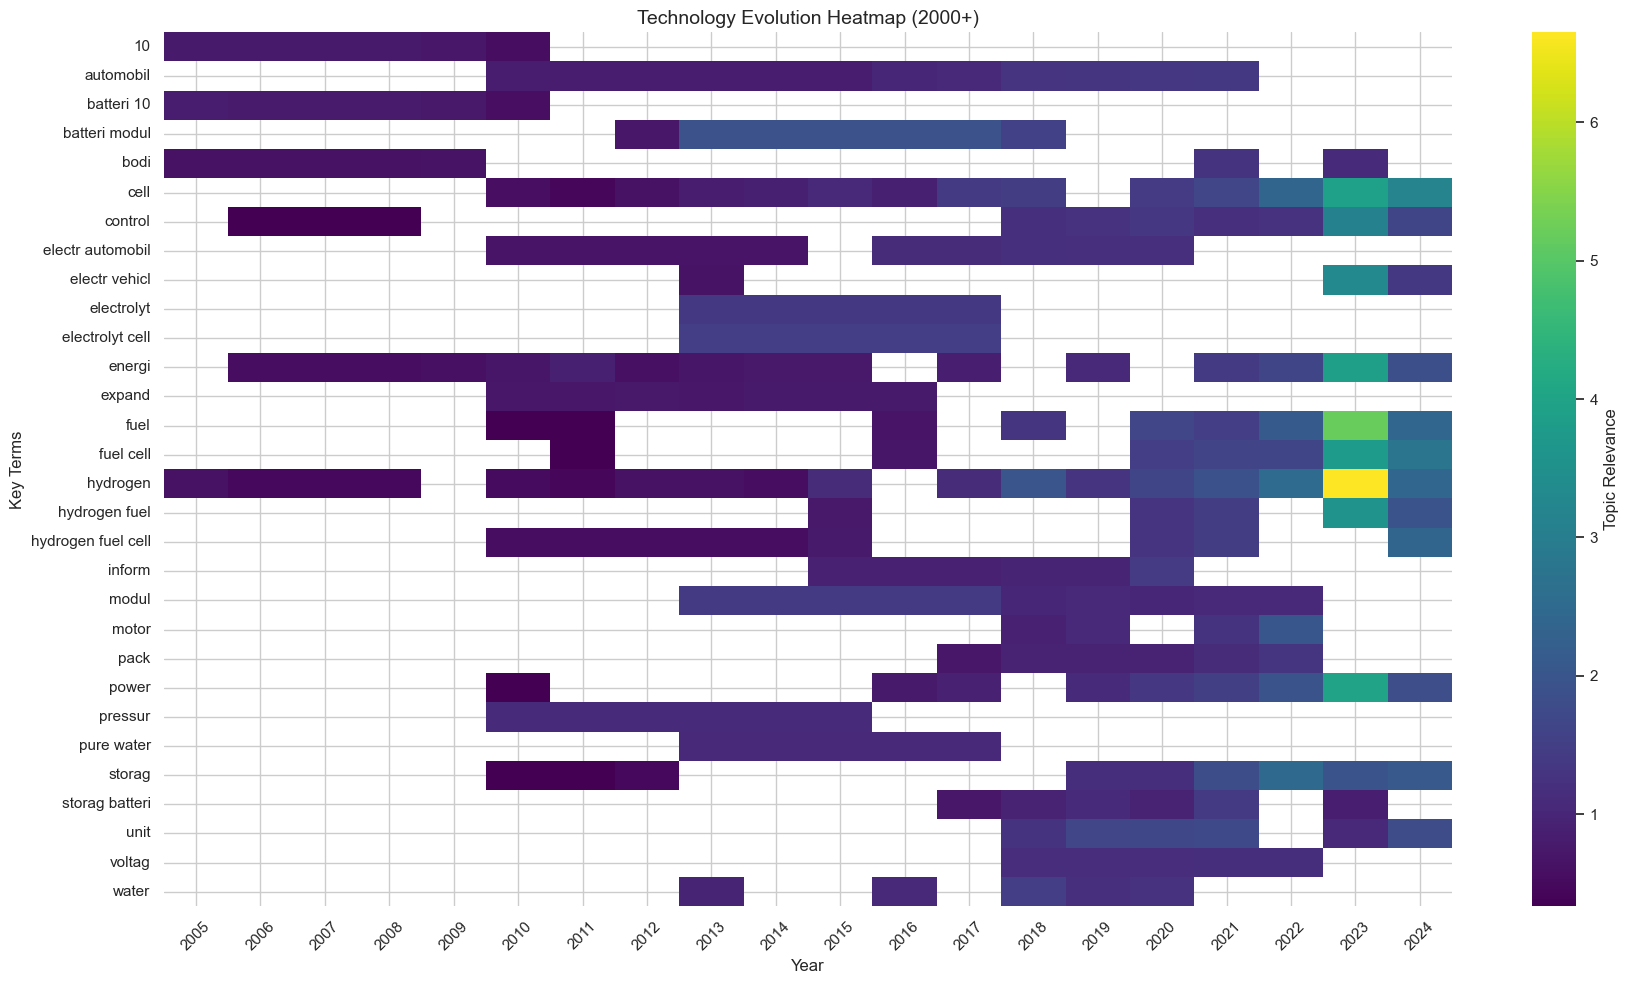

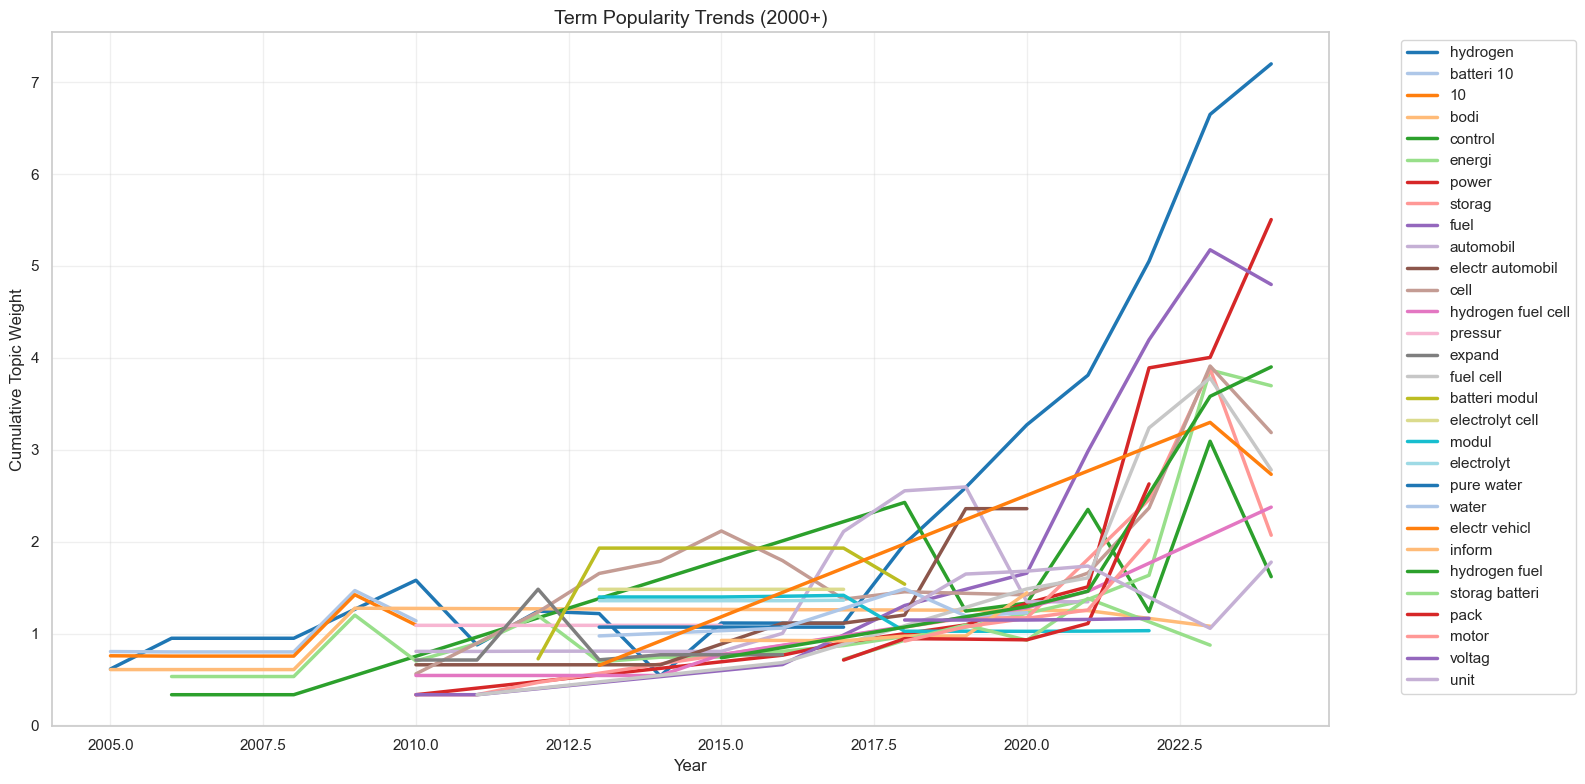

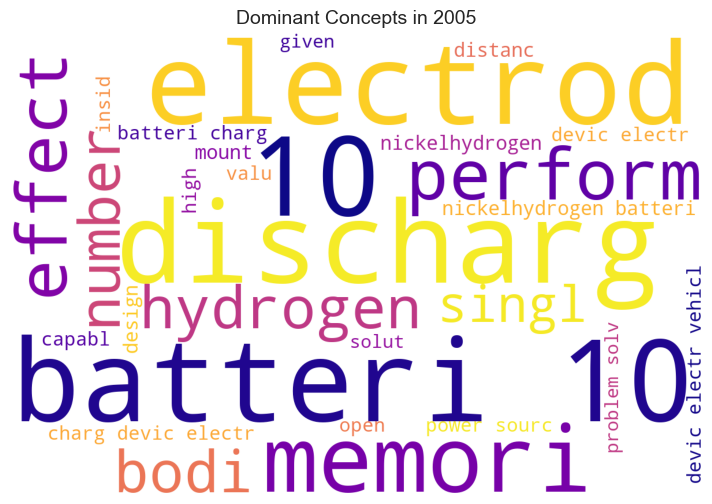

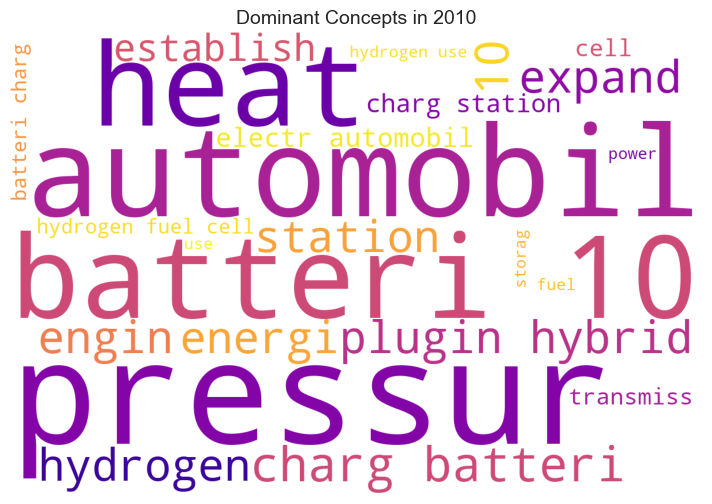

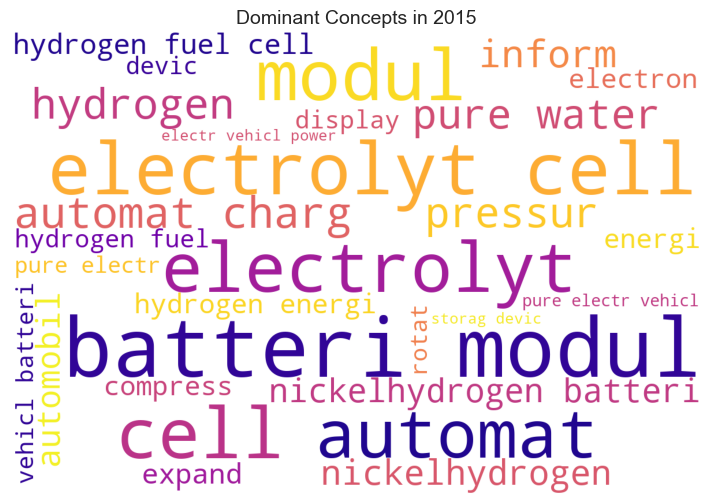

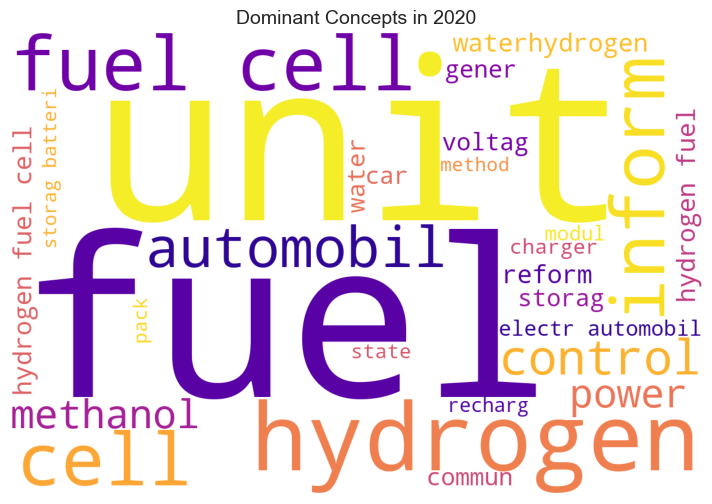

In [258]:
from sklearn.decomposition import LatentDirichletAllocation 
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Filter data for years 2000+
keyword_df = keyword_df[keyword_df['first filing year'] >= 2000]
abstracts = keyword_df['abstract'].tolist()

window_size = 5  # Reduced window size for more granular analysis
topics_over_time = []

# Fit vectorizer on 2000+ data only
full_vectorizer = TfidfVectorizer(
    max_df=0.85, 
    min_df=3,  # Adjusted for smaller time window
    ngram_range=(1, 3),
    stop_words='english'
)
full_matrix = full_vectorizer.fit_transform(abstracts)

# Adjust year range for 2000+
start_year = 2000
max_year = keyword_df['first filing year'].max()

for center_year in range(start_year, max_year - window_size + 1):
    window_data = keyword_df[keyword_df['first filing year'].between(
        center_year, 
        center_year + window_size
    )]
    
    if len(window_data) == 0:
        continue
        
    try:
        window_matrix = full_vectorizer.transform(window_data['abstract'])
        
        # Train LDA with dynamic component selection
        n_topics = min(3, len(window_data))  # Adjust topics based on data size
        lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
        lda.fit(window_matrix)
        
        # Collect topic data
        feature_names = full_vectorizer.get_feature_names_out()
        for topic_idx, topic in enumerate(lda.components_):
            top_words_indices = topic.argsort()[-10:][::-1]
            top_words = [feature_names[i] for i in top_words_indices]
            
            for word, weight in zip(top_words, topic[top_words_indices]):
                topics_over_time.append({
                    'year': center_year + window_size,  # Track end year
                    'topic': f"Topic {topic_idx + 1}",
                    'word': word,
                    'weight': weight
                })
                
    except ValueError as e:
        continue

# Create DataFrame and filter top words
topics_df = pd.DataFrame(topics_over_time)
top_words = topics_df.groupby('word')['weight'].sum().nlargest(30).index

# 1. Temporal Heatmap Visualization
plt.figure(figsize=(18, 10))
heatmap_data = topics_df[topics_df['word'].isin(top_words)].pivot_table(
    index='year', 
    columns='word', 
    values='weight', 
    aggfunc='mean'
)
sns.heatmap(heatmap_data.T, cmap='viridis', annot=False, cbar_kws={'label': 'Topic Relevance'})
plt.title('Technology Evolution Heatmap (2000+)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Key Terms', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Streamgraph for Topic Trends
plt.figure(figsize=(16, 8))
top_words_filtered = topics_df[topics_df['word'].isin(top_words)]
sns.lineplot(
    data=top_words_filtered,
    x='year',
    y='weight',
    hue='word',
    estimator='sum',
    errorbar=None,
    palette='tab20',
    linewidth=2.5
)
plt.title('Term Popularity Trends (2000+)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Cumulative Topic Weight', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Animated Word Cloud (conceptual example)
for year in range(2005, max_year, 5):
    plt.figure(figsize=(10, 6))
    year_words = topics_df[topics_df['year'] == year]
    wordcloud = WordCloud(
        width=1200,
        height=800,
        background_color='white',
        colormap='plasma'
    ).generate_from_frequencies(
        dict(zip(year_words['word'], year_words['weight']))
    )
    
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(f'Dominant Concepts in {year}', fontsize=14)
    plt.show()

In [259]:
!pip install plotly


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\tasni\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [260]:
# Interactive plot with Plotly (requires plotly installed)
import plotly.express as px

fig = px.line(
    topics_df[topics_df['word'].isin(top_words)],
    x='year',
    y='weight',
    color='word',
    title='Interactive Technology Trends (2000+)',
    labels={'weight': 'Research Focus Intensity'},
    height=600
)
fig.update_layout(hovermode='x unified')
fig.show()

In [261]:
keyword_df.head()

first publication number                                              Title  \
0           US2006250902A1    Plug-in hybrid vehicle with fast energy storage   
1            KR102511398B1  Vehicle charging system capable of hydrogen an...   
2            KR102511391B1  Electric vehicle charging system using hydroge...   
3           KR20230163874A  Electric vehicle wireless charging system thro...   
4               GB2631101A           Vehicle electric battery charging system   

                                            abstract  first filing year  \
0  invent relat plugin hybrid propuls system ener...               2006   
1  present invent relat vehicl charg system hydro...               2023   
2  present invent relat electr vehicl charg syste...               2023   
3  present invent relat system wirelessli charg e...               2023   
4  batteri arrang 430 electricallypow vehicl 130 ...               2024   

                                            keywords  
0  [invent, relat, plugin, hybrid, propuls, syste...  
1  [present, invent, relat, vehicl, charg, system...  
2  [present, invent, relat, electr, vehicl, charg...  
3  [present, invent, relat, system, wirelessli, c...  
4  [batteri, arrang, 430, electricallypow, vehicl...

analyzing the evolution of topics in patent abstracts over time using adaptive window detection and LDA topic modeling

In [262]:
import numpy as np
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.stats import entropy
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import defaultdict
import seaborn as sns

# ======================
# CONFIGURATION
# ======================
config = {
    'min_year': 2000,
    'min_docs_per_year': 2,       # lowered threshold for testing
    'global_min_df': 1,           # allow sparse terms for debugging
    'global_max_df': 0.9,
    'divergence_percentile': 85,
    'max_topics': 5,
    'top_words_per_topic': 10,
    'min_window_span': 1          # allow single-year windows for testing
}

# ======================
# UTILITY FUNCTIONS
# ======================
def jensen_shannon(p, q):
    m = 0.5 * (p + q)
    return 0.5 * (entropy(p, m) + entropy(q, m))

def safe_divide(a, b):
    return np.divide(a, b, out=np.zeros_like(a), where=b != 0)

# ======================
# DATA PREPARATION
# ======================
# Read the data; replace 'your_data.csv' with your actual data file.
#keyword_df = pd.read_csv('your_data.csv').dropna(subset=['abstract', 'first filing year'])
keyword_df = keyword_df[keyword_df['first filing year'] >= config['min_year']]
keyword_df = keyword_df.sort_values('first filing year')

# Debug: print basic info about data
print("DataFrame shape:", keyword_df.shape)
print("Years range:", keyword_df['first filing year'].min(), "-", keyword_df['first filing year'].max())

docs = keyword_df['abstract'].str.lower().str.replace(r'[^\w\s-]', '', regex=True).tolist()
years = keyword_df['first filing year'].astype(int).values

# ======================
# GLOBAL VOCABULARY
# ======================
global_vectorizer = CountVectorizer(
    min_df=config['global_min_df'],
    max_df=config['global_max_df'],
    ngram_range=(1, 2),
    stop_words='english'
)
global_vocab = global_vectorizer.fit(docs)
print("Global vocab size:", len(global_vectorizer.vocabulary_))

# ======================
# ADAPTIVE WINDOW DETECTION
# ======================
yearly_counts = []
valid_years = []

unique_years = np.unique(years)
print("Unique years in data:", unique_years)
for year in unique_years:
    year_mask = years == year
    num_docs = sum(year_mask)
    if num_docs >= config['min_docs_per_year']:
        try:
            counts = global_vectorizer.transform(np.array(docs)[year_mask]).sum(axis=0).A1
            yearly_counts.append((year, counts))
            valid_years.append(year)
        except Exception as e:
            print(f"Skipping {year} due to error: {str(e)}")
            continue

print("Valid years detected for windowing:", valid_years)

if len(yearly_counts) < 2:
    raise ValueError(f"Only {len(yearly_counts)} valid years found. Need at least 2.")

divergences = []
for i in range(1, len(yearly_counts)):
    prev = yearly_counts[i-1][1] + 1e-12
    curr = yearly_counts[i][1] + 1e-12
    prev = safe_divide(prev, prev.sum())
    curr = safe_divide(curr, curr.sum())
    div = jensen_shannon(prev, curr)
    divergences.append(div)

print("Calculated divergences:", divergences)
threshold = np.percentile(divergences, config['divergence_percentile']) if divergences else 0
print("Divergence threshold (", config['divergence_percentile'], "percentile):", threshold)

change_points = [0] + [i for i, d in enumerate(divergences) if d > threshold] + [len(yearly_counts)]
change_points = sorted(list(set(change_points)))
print("Change points indices:", change_points)

windows = []
for i in range(1, len(change_points)):
    start_idx = change_points[i-1]
    end_idx = change_points[i]
    window_years = [yearly_counts[j][0] for j in range(start_idx, end_idx)]
    if not window_years:
        continue
    try:
        window_start = min(window_years)
        window_end = max(window_years)
        if (window_end - window_start) < config['min_window_span']:
            continue
    except ValueError:
        continue
    windows.append({
        'start': window_start,
        'end': window_end,
        'years': window_years
    })
    
print("Detected windows:")
for w in windows:
    print(w)

if not windows:
    raise ValueError("No valid time windows detected. Try adjusting parameters.")

# ======================
# TOPIC MODELING
# ======================
tfidf_vectorizer = TfidfVectorizer(
    vocabulary=global_vectorizer.vocabulary_,
    ngram_range=(1, 2)
)
full_matrix = tfidf_vectorizer.fit_transform(docs)
feature_names = tfidf_vectorizer.get_feature_names_out()

topic_evolution = []

for window in windows:
    window_mask = keyword_df['first filing year'].isin(window['years'])
    window_matrix = full_matrix[window_mask]
    
    if window_matrix.shape[0] == 0:
        continue
        
    n_topics = max(1, min(config['max_topics'], window_matrix.shape[0] // 50))
    print(f"Window {window['start']}-{window['end']} with {window_matrix.shape[0]} docs. Using {n_topics} topics.")
    
    try:
        lda = LatentDirichletAllocation(
            n_components=n_topics,
            random_state=42,
            learning_method='online'
        )
        lda.fit(window_matrix)
        
        for topic_idx, topic in enumerate(lda.components_):
            top_indices = topic.argsort()[-config['top_words_per_topic']:][::-1]
            top_words = [feature_names[i] for i in top_indices]
            topic_evolution.append({
                'start': window['start'],
                'end': window['end'],
                'topic_id': f"{window['start']}-{topic_idx+1}",
                'words': top_words,
                'weights': topic[top_indices]
            })
            print(f"Topic {window['start']}-{topic_idx+1}: {top_words}")
    except Exception as e:
        print(f"Failed modeling {window['start']}-{window['end']}: {str(e)}")
        continue




DataFrame shape: (94, 5)
Years range: 2000 - 2024
Global vocab size: 5903
Unique years in data: [2000 2003 2005 2006 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
 2020 2021 2022 2023 2024]
Valid years detected for windowing: [np.int64(2010), np.int64(2012), np.int64(2013), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]
Calculated divergences: [np.float64(0.5136119893197473), np.float64(0.28087994699124613), np.float64(0.5099921332143629), np.float64(0.5539628267978498), np.float64(0.5252101739814113), np.float64(0.4126828269439815), np.float64(0.45180608623613483), np.float64(0.469009969485547), np.float64(0.4358358359824709), np.float64(0.39744977545284177), np.float64(0.3993865662879502), np.float64(0.4612540765334323)]
Divergence threshold ( 85 percentile): 0.5176713539513297
Change points indices: [0, 3, 4, 13]
Detected windows:
{'start': np.int64(2010), 'end': np.i

In [263]:
import plotly.express as px
import pandas as pd

# Prepare divergence data in a DataFrame
div_df = pd.DataFrame({
    'Year': valid_years[1:],  # Divergences correspond to year changes starting from the second valid year
    'Divergence': divergences
})

# Create a line plot for term distribution divergences over years with markers
fig = px.line(div_df, x='Year', y='Divergence',
              title='Automatic Topic Shift Detection',
              markers=True)

# Add a horizontal line for the divergence threshold
fig.add_hline(y=threshold, line_dash="dash", line_color="red",
              annotation_text="Change Threshold", annotation_position="bottom right")

# Create vertical spans for each detected window using layout shapes
shapes = []
for window in windows:
    shapes.append({
        'type': 'rect',
        'xref': 'x',
        'yref': 'paper',
        'x0': window['start'],
        'x1': window['end'],
        'y0': 0,
        'y1': 1,
        'fillcolor': 'gray',
        'opacity': 0.2,
        'layer': 'below',
        'line': {'width': 0},
    })

fig.update_layout(
    shapes=shapes,
    xaxis_title='Year',
    yaxis_title='Jensen-Shannon Divergence'
)

fig.show()


In [264]:
import pandas as pd
import plotly.express as px

# ----------------------
# Build the Term Matrix
# ----------------------
all_terms = list(set([word for t in topic_evolution for word in t['words']]))
term_matrix = pd.DataFrame(index=all_terms)

for window in windows:
    # Collect all terms for this window
    window_terms = [word for t in topic_evolution 
                    if t['start'] == window['start'] 
                    for word in t['words']]
    term_counts = pd.Series(window_terms).value_counts()
    term_matrix[window['start']] = term_counts

# Fill missing values and sort by window year (the DataFrame rows)
term_matrix = term_matrix.fillna(0).T.sort_index()

# Debug print: Check available columns (terms)
print("Term matrix columns:", term_matrix.columns.tolist())

# ----------------------
# Plotting with Plotly Express
# ----------------------
if not term_matrix.empty and not term_matrix.sum().nlargest(1).empty:
    # Select the top 25 terms across windows based on total counts
    top_terms = term_matrix.sum().nlargest(25).index
    selected_terms = [term for term in top_terms if term in term_matrix.columns]
    
    if selected_terms:
        # Prepare the heatmap data: subset and transpose to have Terms as rows
        heat_data = term_matrix[selected_terms].T
        
        # Create the interactive heatmap
        fig = px.imshow(heat_data,
                        text_auto=".1f",
                        color_continuous_scale='YlOrBr',
                        aspect="auto",
                        labels={"x": "Time Window Start Year", "y": "Term", "color": "Count"},
                        title="Top Terms Across Time Windows")
        fig.update_layout(title_x=0.5)
        fig.show()
    else:
        print("⚠️ No common top terms found across windows to plot heatmap.")
else:
    print("⚠️ Term matrix is empty — skipping heatmap plot.")


Term matrix columns: ['pure', 'hydrogenoxygen fuel', 'storag', 'fuel', 'pure water', 'vehicl', 'electrolyt cell', 'power', 'hydrogenoxygen', 'hydrogen fuel', 'electrolyt', 'energi', 'hydrogen', 'modul', 'batteri modul', 'cell', 'electr vehicl', 'batteri']


In [265]:
import plotly.express as px
from wordcloud import WordCloud

# 3. Evolving Word Clouds with Plotly Express
for window in windows:
    # Collect terms for the current window
    terms = [word for t in topic_evolution 
             if t['start'] == window['start'] 
             for word in t['words']]
    
    if not terms:
        continue
    
    # Generate the word cloud image using the WordCloud library
    wordcloud = WordCloud(width=1200, height=800, 
                          background_color='white',
                          colormap='tab10').generate(' '.join(terms))
    
    # Convert the word cloud to a NumPy array (RGB image)
    wc_array = wordcloud.to_array()
    
    # Use Plotly Express to display the word cloud image interactively
    fig = px.imshow(wc_array)
    fig.update_layout(
        title_text=f"{window['start']}-{window['end']} Key Concepts",
        title_x=0.5,
        xaxis={'visible': False},
        yaxis={'visible': False}
    )
    fig.show()


extract the topic of each patent 

In [266]:
classifications_df = pd.read_csv('classification_df.csv', sep=';')

In [267]:

def get_ipc_meaning(ipc_list, classification_df):
    """
    Extract the first three characters from the first IPC code in the list and
    return the corresponding Meaning from classification_df.
    
    Parameters:
      ipc_list: list of IPC code strings.
      classification_df: DataFrame with columns 'IPC_Code' and 'Meaning'.
    """
    if not ipc_list:
        return None

    # Extract the first three characters, e.g., "B60" from "B60L3/00"
    code_extracted = ipc_list[0][:3]

    # Look for a row in classification_df where the IPC_Code starts with the extracted code.
    match = classification_df[classification_df['CPC Symbol'].str.startswith(code_extracted)]
    if not match.empty:
        return match.iloc[0]['Classification Title']
    else:
        # Fallback option: try to get the general meaning based on the section letter.
        section_letter = code_extracted[0]
        match_section = classification_df[classification_df['CPC Symbol'] == section_letter]
        if not match_section.empty:
            return match_section.iloc[0]['Classification Title']
    return None

# Create a new column in the patents DataFrame with the IPC meaning
df['IPC_Meaning'] = df['IPC'].apply(lambda ipc_list: get_ipc_meaning(ipc_list, classifications_df))

df


No                                              Title  \
0      1    Plug-in hybrid vehicle with fast energy storage   
1      2  Vehicle charging system capable of hydrogen an...   
2      3  Electric vehicle charging system using hydroge...   
3      4  Electric vehicle wireless charging system thro...   
4      5           Vehicle electric battery charging system   
..   ...                                                ...   
493  496  Emergency vehicle charging cabin for series ch...   
494  497  Multi-source emergency power supply system and...   
495  498  External-mix self-reconfigurable supercapacito...   
496  499  Hydrogen fuel cell vehicle power system suppor...   
497  500  Fuel cell reactor start-stop control method, d...   

                                             Inventors  \
0    BENDER DONALD A [US] \r\nDESHMANE ATUL [US] \r...   
1                                        HONG SEONG HO   
2                                        HONG SEONG HO   
3                                    SON JEONG KI [KR]   
4                                  JULIAN MENASHE [BS]   
..                                                 ...   
493  ZHANG YONG \r\nSONG HAIFENG \r\nZHANG ZHIFENG ...   
494  WANG KUAN \r\nLIN JUPENG \r\nWANG ZHENXING \r\...   
495  HU GUOWEN \r\nYANG XIAODONG \r\nPENG SIMIN \r\...   
496  LI KAIHAN \r\nHAO YIGUO \r\nHE YU \r\nAO XIAOPING   
497  WU JINLIN \r\nMA QIUXIANG \r\nTAN JIRONG \r\nW...   

                                            Applicants  \
0                          AFS TRINITY POWER CORP [US]   
1                               HOGREENAIR CO LTD [KR]   
2                               HOGREENAIR CO LTD [KR]   
3                                    SON JEONG KI [KR]   
4                                  JULIAN MENASHE [BS]   
..                                                 ...   
493                      HENAN XINTAIHANG POWER CO LTD   
494  CHINA RAILWAY CONSTR GROUP CO \r\nCHINA RAILWA...   
495                           YANCHENG INST TECHNOLOGY   
496             WUHAN GROVE HYDROGEN AUTOMOBILE CO LTD   
497                      DONGFENG LIUZHOU MOTOR CO LTD   

                Publication number Earliest priority  \
0                   US2006250902A1        2005-05-05   
1                    KR102511398B1        2022-09-20   
2                    KR102511391B1        2022-09-20   
3                   KR20230163874A        2022-05-24   
4                       GB2631101A        2023-06-19   
..                             ...               ...   
493                   CN212784823U        2020-08-06   
494                   CN111668919A        2020-06-24   
495  CN105162225A \r\nCN105162225B        2015-09-06   
496  CN110722990A \r\nCN110722990B        2019-10-31   
497                   CN119099437A        2024-09-30   

                                                   IPC  \
0                                           [H04B1/20]   
1    [B60L3/00, B60L53/16, B60L53/51, B60L53/54, B6...   
2    [B60L3/00, B60L53/16, B60L53/51, B60L53/54, B6...   
3    [B60L53/12, B60L53/38, B60L53/54, B60L53/66, B...   
4                               [B60L53/66, B60L53/68]   
..                                                 ...   
493                               [H02H7/18, H02J7/00]   
494  [A62B13/00, B60P3/00, F24D15/00, F24F11/64, F2...   
495                               [H02J7/02, H02J7/34]   
496        [B60L3/00, B60L58/12, B60L58/30, H01M10/42]   
497                             [B60L58/30, B60L58/31]   

                                                   CPC  \
0    [B60K6/20 (KR), B60K6/28 (KR), B60K6/30 (EP,US...   
1                   [Y02T10/70 (EP), Y02T10/7072 (EP)]   
2                                     [Y02T10/70 (EP)]   
3    [B60L53/12 (KR), B60L53/38 (KR), B60L53/54 (KR...   
4    [B60L50/10 (EP), B60L50/50 (EP), B60L50/75 (EP...   
..                                                 ...   
493                                          [unkown)]   
494  [A62B13/00 (CN),

In [268]:
# Check year distribution
print("Year stats:")
print(keyword_df['first filing year'].describe())

# Check example parsed years
print("\nSample years:", keyword_df['first filing year'].head(3))

Year stats:
count      94.000000
mean     2018.468085
std         4.948557
min      2000.000000
25%      2016.250000
50%      2019.500000
75%      2022.000000
max      2024.000000
Name: first filing year, dtype: float64

Sample years: 82    2000
86    2003
49    2005
Name: first filing year, dtype: int32


In [269]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from scipy.stats import linregress

# Convert years to integers and filter recent decades
keyword_df['year'] = keyword_df['first filing year'].astype(int)
keyword_df = keyword_df[keyword_df['year'] >= 2000]  # Focus on modern era

# Create 3-year bins for better signal
keyword_df['period'] = ((keyword_df['year'] - 2000) // 3).apply(
    lambda x: f"{(2000 + x*3)}-{(2002 + x*3)}"
)

# Create document count matrix using same vocabulary
count_vectorizer = CountVectorizer(
    vocabulary=vectorizer.get_feature_names_out(),  # Use existing TF-IDF features
    binary=False  # Get actual counts
)
count_matrix = count_vectorizer.fit_transform(keyword_df['abstract'])

# Create period-term matrix with normalized frequencies
term_freq = pd.DataFrame(
    count_matrix.A,
    columns=count_vectorizer.get_feature_names_out(),
    index=keyword_df['period']
)
period_counts = term_freq.groupby(level=0).sum()
doc_counts = keyword_df['period'].value_counts()
normalized_freq = period_counts.div(doc_counts, axis=0)

In [270]:
term_lifecycles = {}
for term in normalized_freq.columns:
    y = normalized_freq[term].values
    x = np.arange(len(y))
    
    if len(y) < 4 or y.sum() < 10:  # Minimum 4 periods & 10 total mentions
        continue
        
    slope, _, _, p_value, _ = linregress(x, y)
    term_lifecycles[term] = {
        'slope': slope,
        'p_value': p_value,
        'mean_freq': y.mean(),
        'trend_strength': np.corrcoef(x, y)[0,1]**2  # R²
    }

# Filter with adaptive thresholds
emerging_terms = [
    (term, data) for term, data in term_lifecycles.items()
    if (data['slope'] > 0) & 
       (data['p_value'] < 0.2) & 
       (data['trend_strength'] > 0.4) &
       (data['mean_freq'] > 0.001)
]

declining_terms = [
    (term, data) for term, data in term_lifecycles.items()
    if (data['slope'] < 0) & 
       (data['p_value'] < 0.2) & 
       (data['trend_strength'] > 0.4) &
       (data['mean_freq'] > 0.001)
]

In [271]:
# Check distribution of slopes and p-values
slopes = [data['slope'] for data in term_lifecycles.values()]
p_values = [data['p_value'] for data in term_lifecycles.values()]

print(f"Slope range: [{min(slopes):.2f}, {max(slopes):.2f}]")
print(f"Significant terms (p<0.05): {sum(np.array(p_values) < 0.05)}")

Slope range: [0.09, 0.53]
Significant terms (p<0.05): 3


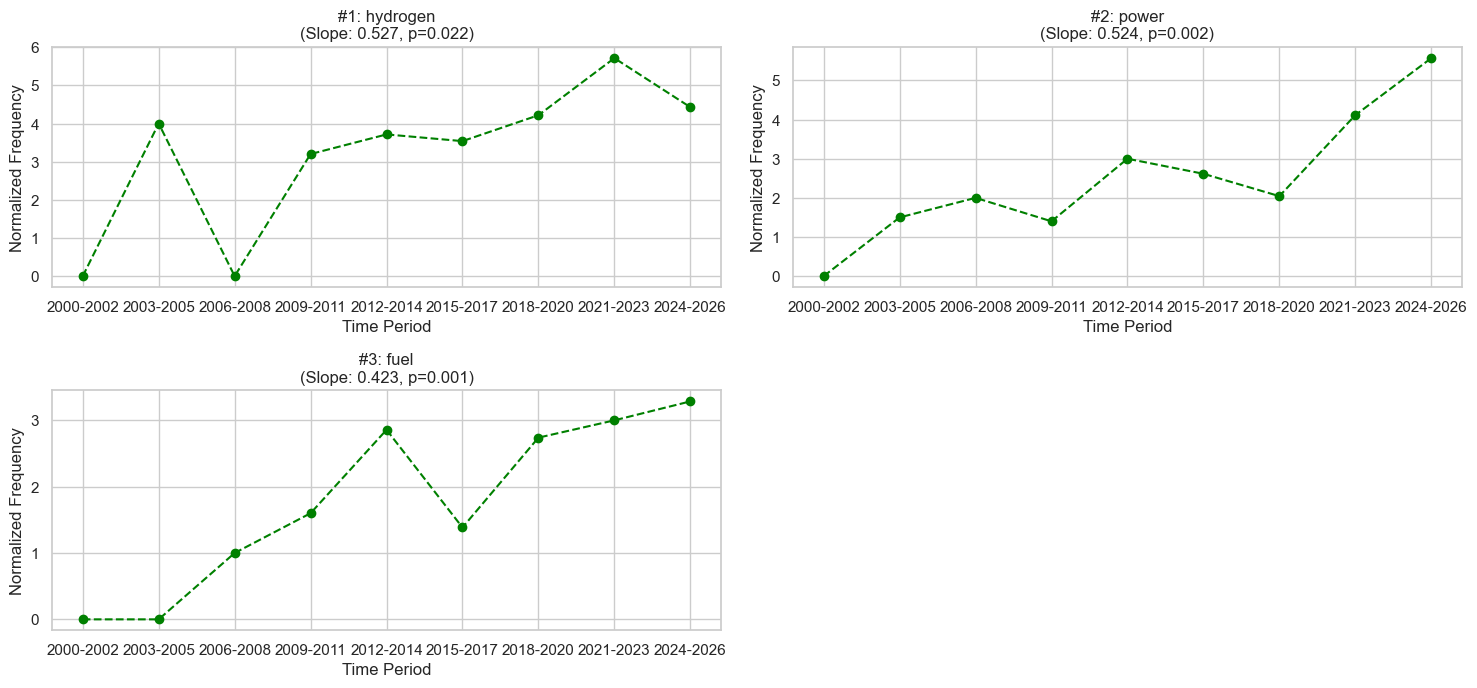

In [272]:
def plot_top_emerging_terms(top_n=5):
    if not emerging_terms:
        print("No emerging terms found")
        return
    
    # Get top N terms by slope
    top_terms = sorted(emerging_terms, key=lambda x: x[1]['slope'], reverse=True)[:top_n]
    
    plt.figure(figsize=(15, 10))
    from numpy.polynomial.polynomial import Polynomial

    for idx, (term, data) in enumerate(top_terms, 1):
        plt.subplot(3, 2, idx)  # 3 rows, 2 columns (adjust for top_n)
        normalized_freq[term].plot(
            marker='o', 
            color='green',
            linestyle='--',
            title=f"#{idx}: {term}\n(Slope: {data['slope']:.3f}, p={data['p_value']:.3f})"
        )

        plt.xlabel("Time Period")
        plt.ylabel("Normalized Frequency")
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Generate visualization
plot_top_emerging_terms(5)

slope : direction/magnitude of trend a positive slope is emerging , negative is declining 
p_value : confidence in the trend , lower = more significant 
trend_strength : how well the trend fits the data R**2

In [273]:
df.head()

No                                              Title  \
0   1    Plug-in hybrid vehicle with fast energy storage   
1   2  Vehicle charging system capable of hydrogen an...   
2   3  Electric vehicle charging system using hydroge...   
3   4  Electric vehicle wireless charging system thro...   
4   5           Vehicle electric battery charging system   

                                           Inventors  \
0  BENDER DONALD A [US] \r\nDESHMANE ATUL [US] \r...   
1                                      HONG SEONG HO   
2                                      HONG SEONG HO   
3                                  SON JEONG KI [KR]   
4                                JULIAN MENASHE [BS]   

                    Applicants Publication number Earliest priority  \
0  AFS TRINITY POWER CORP [US]     US2006250902A1        2005-05-05   
1       HOGREENAIR CO LTD [KR]      KR102511398B1        2022-09-20   
2       HOGREENAIR CO LTD [KR]      KR102511391B1        2022-09-20   
3            SON JEONG KI [KR]     KR20230163874A        2022-05-24   
4          JULIAN MENASHE [BS]         GB2631101A        2023-06-19   

                                                 IPC  \
0                                         [H04B1/20]   
1  [B60L3/00, B60L53/16, B60L53/51, B60L53/54, B6...   
2  [B60L3/00, B60L53/16, B60L53/51, B60L53/54, B6...   
3  [B60L53/12, B60L53/38, B60L53/54, B60L53/66, B...   
4                             [B60L53/66, B60L53/68]   

                                                 CPC Publication date  \
0  [B60K6/20 (KR), B60K6/28 (KR), B60K6/30 (EP,US...       2006-11-09   
1                 [Y02T10/70 (EP), Y02T10/7072 (EP)]       2023-03-20   
2                                   [Y02T10/70 (EP)]       2023-03-20   
3  [B60L53/12 (KR), B60L53/38 (KR), B60L53/54 (KR...       2023-12-01   
4  [B60L50/10 (EP), B60L50/50 (EP), B60L50/75 (EP...       2024-12-25   

  Earliest publication  ...  first publication number  \
0           2006-11-09  ...            US2006250902A1   
1           2023-03-20  ...             KR102511398B1   
2           2023-03-20  ...             KR102511391B1   
3           2023-12-01  ...            KR20230163874A   
4           2024-12-25  ...                GB2631101A   

  second publication number first publication country  \
0                      None                        US   
1                      None                        KR   
2                      None                        KR   
3                      None                        KR   
4                      None                        GB   

  second publication country first filing year earliest priority year  \
0                       None              2006                   2005   
1                       None              2023                   2022   
2                       None              2023                   2022   
3                       None              2023                   2022   
4                       None              2024                   2023   

  applicant country                  family_jurisdictions  \
0                US  [AU, CA, CN, EP, HK, JP, KR, US, WO]   
1                KR                                  [KR]   
2                KR                                  [KR]   
3                KR                                  [KR]   
4                BS                              [GB, WO]   

                                      family_members  \
0  [AU2006295147A1, AU2006295147B2, CA2623398A1, ...   
1                                    [KR102511398B1]   
2                                    [KR102511391B1]   
3                                   [KR20230163874A]   
4                       [GB2631101A, WO2024261465A1]   

                        IPC_Meaning  
0  ELECTRIC COMMUNICATION TECHNIQUE  
1               VEHICLES IN GENERAL  
2               VEHICLES IN GENERAL  
3               VEHICLES IN GENERAL  
4               VEHICLES IN GENERAL  

[5 rows x 23 columns]

In [274]:
import pandas as pd
from collections import defaultdict
from scipy.stats import linregress

def track_cooccurrence_trends(df: pd.DataFrame, 
                             time_col: str = 'year',
                             text_col: str = 'abstract',
                             window_size: int = 5,
                             min_count: int = 5) -> pd.DataFrame:
    """
    Track co-occurrence trends over time with statistical significance
    
    Args:
        df: DataFrame containing temporal text data
        time_col: Column name for time periods (years)
        text_col: Column name containing text to analyze
        window_size: Window size for co-occurrence detection
        min_count: Minimum total occurrences to consider
        
    Returns:
        DataFrame with co-occurrence pairs and trend metrics
    """
    # Group documents by time period
    time_groups = df.groupby(time_col)[text_col].agg(list)
    
    # Store co-occurrence frequencies by year
    temporal_counts = defaultdict(lambda: defaultdict(int))
    
    # Process each time period
    for year, documents in time_groups.items():
        year_cooc = defaultdict(int)
        
        # Process each document in the time period
        for doc in documents:
            pairs = build_cooccurrence(doc, window_size)
            for pair, count in pairs.items():
                year_cooc[pair] += count
                
        # Store annual counts
        for pair, count in year_cooc.items():
            temporal_counts[pair][year] = count
    
    # Convert to DataFrame and calculate trends
    cooc_df = pd.DataFrame.from_dict(temporal_counts, orient='index')
    
    # Calculate trend metrics
    trend_data = []
    for pair, counts in cooc_df.iterrows():
        years = counts.dropna().index.astype(int)
        freqs = counts.dropna().values
        
        if len(years) < 3 or sum(freqs) < min_count:
            continue  # Skip sparse pairs
            
        # Calculate linear regression
        slope, _, _, p_value, _ = linregress(years, freqs)
        
        trend_data.append({
            'term1': pair[0],
            'term2': pair[1],
            'slope': slope,
            'p_value': p_value,
            'total_count': sum(freqs),
            'first_year': years.min(),
            'last_year': years.max(),
            'frequency_history': list(zip(years, freqs))
        })
    
    return pd.DataFrame(trend_data)

# Example usage:
cooc_trends = track_cooccurrence_trends(
    grouped,
    time_col='first filing year',
    text_col='abstract',
    window_size=5,
    min_count=10
)

# Get top emerging combinations
emerging_tech = cooc_trends[
    (cooc_trends.slope > 0) &
    (cooc_trends.p_value < 0.05)
].sort_values('slope', ascending=False)

print("Top emerging technology combinations:")
print(emerging_tech[['term1', 'term2', 'slope', 'total_count']].head(5))

Top emerging technology combinations:
        term1     term2     slope  total_count
141      fuel  hydrogen  7.809325        670.0
313  hydrogen    system  3.199457        258.0
11     electr    vehicl  3.102230        921.0
854   product    storag  3.000000         24.0
164  hydrogen     power  2.853832        266.0


In [275]:
# Select top term pairs for visualization
top_terms = emerging_tech.head(5)  # Adjust the number as needed

# Prepare data for plotting
plot_data = []
for _, row in top_terms.iterrows():
    for year, freq in row['frequency_history']:
        plot_data.append({
            'year': year,
            'frequency': freq,
            'term_pair': f"{row['term1']} & {row['term2']}"
        })

plot_df = pd.DataFrame(plot_data)

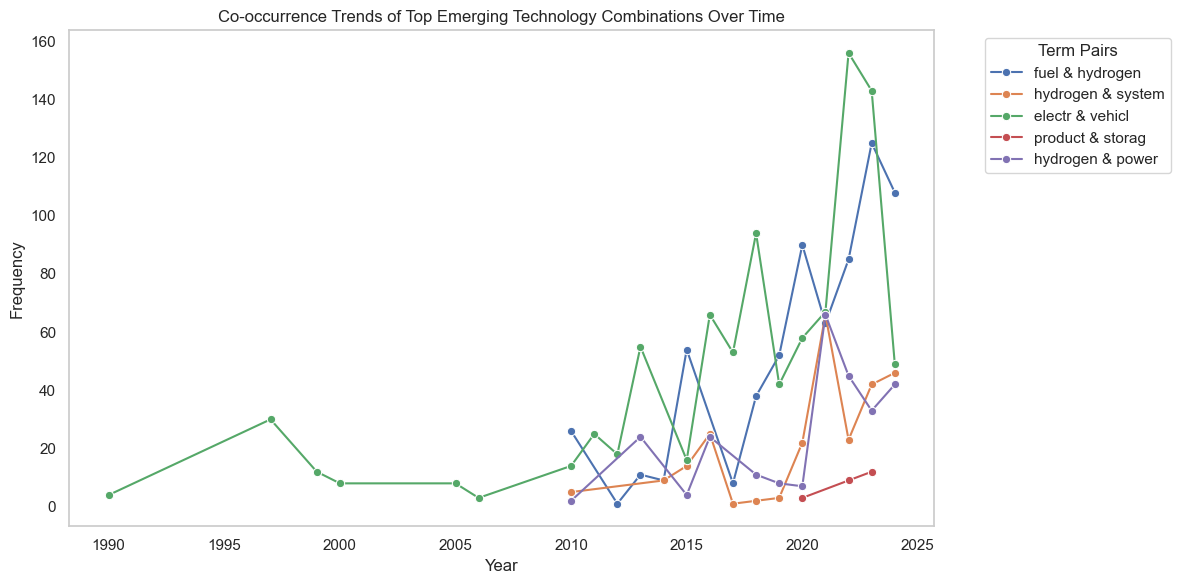

In [276]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=plot_df, x='year', y='frequency', hue='term_pair', marker='o')
plt.title('Co-occurrence Trends of Top Emerging Technology Combinations Over Time')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(title='Term Pairs', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

In [277]:
declining_tech = cooc_trends[
    (cooc_trends.slope < 0) &
    (cooc_trends.p_value < 0.05)
].sort_values('slope')

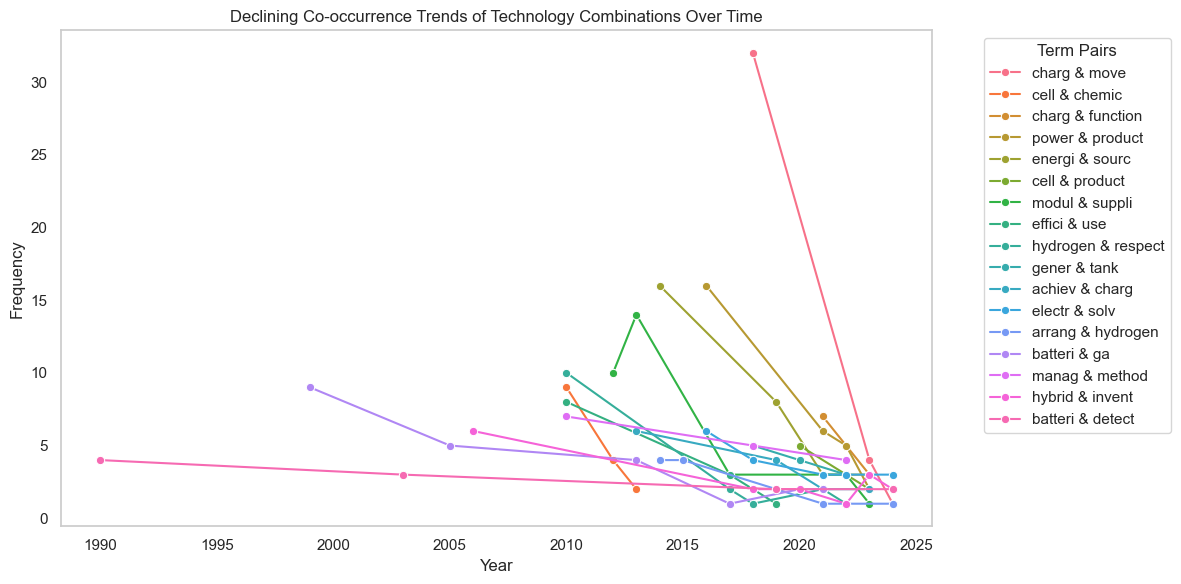

In [278]:
# Prepare data for visualization of declining trends
decline_plot_data = []
for _, row in declining_tech.iterrows():
    for year, freq in row['frequency_history']:
        decline_plot_data.append({
            'year': year,
            'frequency': freq,
            'term_pair': f"{row['term1']} & {row['term2']}"
        })

decline_plot_df = pd.DataFrame(decline_plot_data)

# Create the line plot for declining trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=decline_plot_df, x='year', y='frequency', hue='term_pair', marker='o')
plt.title('Declining Co-occurrence Trends of Technology Combinations Over Time')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(title='Term Pairs', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

In [279]:
# import time
# import random
# import undetected_chromedriver as uc
# from selenium.webdriver.common.by import By
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC
# from selenium.common.exceptions import TimeoutException
# from bs4 import BeautifulSoup
# import pandas as pd

# class PatentsSearch:
#     def __init__(self, headless=True):
#         """Initialize the scraper with enhanced compatibility options."""
        
#         options = uc.ChromeOptions()
        
        
#         if headless:
#             options.add_argument('--headless')
        
        
#         options.add_argument('--no-sandbox')
#         options.add_argument('--disable-dev-shm-usage')
#         options.add_argument('--disable-blink-features=AutomationControlled')
#         options.add_argument('--disable-extensions')
        
#         try:
            
#             self.driver = uc.Chrome(
#                 options=options, 
#                 use_subprocess=True,  
#                 version_main=None,    
#                 suppress_welcome=True,
#                 debug=False
#             )
            
            
#             self.driver.set_page_load_timeout(30)
#             self.driver.set_window_size(1920, 1080)
        
#         except Exception as e:
#             print(f"Failed to initialize ChromeDriver: {e}")
#             print("Trying alternative initialization method...")
            
#             # Alternative initialization method
#             self.driver = uc.Chrome(
#                 options=options,
#                 driver_executable_path=None  
#             )

#     def add_random_delay(self, min_seconds=1, max_seconds=3):
#         """Add a random delay to mimic human behavior."""
#         time.sleep(random.uniform(min_seconds, max_seconds))

#     def get_page_html(self, url):
#         """Navigate to the given URL and return the page HTML."""
#         try:
#             print(f"Navigating to: {url}")
#             self.driver.get(url)

            
#             WebDriverWait(self.driver, 20).until(
#                 EC.presence_of_element_located((By.TAG_NAME, "body"))
#             )

            
#             self.add_random_delay(3, 5)

            
#             return self.driver.page_source

#         except TimeoutException:
#             print("Timed out waiting for the page to load.")
#             return None
#         except Exception as e:
#             print(f"An error occurred: {e}")
#             return None

#     def parse_html(self, html):
#         """Parse the HTML and extract all span elements inside the 'Published as' content."""
#         soup = BeautifulSoup(html, 'html.parser')
        
#         # Look for the element containing "Publié en tant que" or "Published as"
#         published_as_element = soup.find(lambda tag: tag.name == "h5" and ("Publié en tant que" in tag.text or "Published as" in tag.text))
        
#         if published_as_element:
#             # Get the next sibling span that contains the relevant content
#             content_element = published_as_element.find_next_sibling("span")
#             if content_element:
#                 # Extract all span elements within the content
#                 spans = content_element.find_all('span')
#                 return [span.get_text(strip=True) for span in spans]
#         return []

#     def close(self):
#         """Close the browser when done."""
#         if self.driver:
#             self.driver.quit()



# if __name__ == '__main__':
    
#     scraper = PatentsSearch(headless=False)  # Set headless to False to see the browser in action

    
  
    
#     df['family_members'] = None

#     try:
#         for index, row in df.iterrows():
            
#             url = f"https://worldwide.espacenet.com/patent/search/family/{row['Family number']}/publication/{row['first publication number']}?q=hydrogen%20battery"

            
#             html = scraper.get_page_html(url)
#             if html:
#                 print(f"Page HTML retrieved successfully for {row['first publication number']}.")
                
#                 family_members = scraper.parse_html(html)
#                 df.at[index, 'family_members'] = family_members  
#             else:
#                 print(f"Failed to retrieve the page HTML for {row['first publication number']}.")

#     finally:
        
#         scraper.close()
#         print("Scraper closed.")

    
#     df.head()

In [280]:
df[['Family number','first publication number','family_members']].iloc[4]

Family number                                   91738186
first publication number                      GB2631101A
family_members              [GB2631101A, WO2024261465A1]
Name: 4, dtype: object

In [281]:
df[['first applicant', 'second applicant']] = df['Applicants'].str.split('\n' , n=1 , expand=True)

In [282]:
df[['first applicant', 'second applicant']] 

first applicant  \
0               AFS TRINITY POWER CORP [US]   
1                    HOGREENAIR CO LTD [KR]   
2                    HOGREENAIR CO LTD [KR]   
3                         SON JEONG KI [KR]   
4                       JULIAN MENASHE [BS]   
..                                      ...   
493           HENAN XINTAIHANG POWER CO LTD   
494        CHINA RAILWAY CONSTR GROUP CO \r   
495                YANCHENG INST TECHNOLOGY   
496  WUHAN GROVE HYDROGEN AUTOMOBILE CO LTD   
497           DONGFENG LIUZHOU MOTOR CO LTD   

                        second applicant  
0                                   None  
1                                   None  
2                                   None  
3                                   None  
4                                   None  
..                                   ...  
493                                 None  
494  CHINA RAILWAY CONSTRUCTION CORP LTD  
495                                 None  
496                                 None  
497                                 None  

[497 rows x 2 columns]

**applicant type classification**


In [283]:
import pandas as pd

def classify_applicant(applicant, inventors):
    if pd.isna(applicant):
        return "Unknown"
    applicant_lower = applicant.lower()
    
    # Corporations/Companies
    if any(keyword in applicant_lower for keyword in ["corp", "inc", "ltd", "co.", "llc", "ag", "gmbh", "co", "holdings", "ventures"]):
        if ("inc" or "corp" or "holdings" or "ventures")  in applicant_lower or "incorporated" in applicant_lower:
            return "Company - Incorporated/Corporation"
        elif ("ltd" or "llc" or "gmbh" or "kk" or "bv") in applicant_lower or "limited" in applicant_lower:
            return "Company - Limited"
        elif any(keyword in applicant_lower for keyword in ["s.a.", "sociedad anónima", "société anonyme"]):
            return "Company - Anonymous (S.A.)"
        else:
            return "Company - General"
    
    # Automotive manufacturers
    if any(keyword in applicant_lower for keyword in ["automobile", "motor", "vehicle", "auto" , "mobility","motors"]):
        return "Automotive Manufacturer"
    
    # Energy companies
    if any(keyword in applicant_lower for keyword in ["power", "energy", "fuel cell", "hydrogen"]):
        return "Energy Company"
    
    # Technology companies
    if any(keyword in applicant_lower for keyword in ["tech", "technology", "creative", "innovation" , "engineering" , "systems" , "digital" , "solutions"]):
        return "Technology Company"
    
    # Material Science/Nanotechnology companies
    if any(keyword in applicant_lower for keyword in ["nano", "material"]):
        return "Material Science/Nanotechnology Company"
    
    # Environmental protection companies
    if any(keyword in applicant_lower for keyword in ["environmental protection", "green air"]):
        return "Environmental Protection Company"
    
    # Universities/Research Institutions
    if any(keyword in applicant_lower for keyword in ["univ", "university", "college", "polytechnic", "institute", "school", "academia", "laboratory", "research"]):
        return "University/Research Institution"
    
    # Technical Universities
    if any(keyword in applicant_lower for keyword in ["teknik", "technical", "polytechnic"]):
        return "Technical University"
    
    # Research Laboratories
    if any(keyword in applicant_lower for keyword in ["laboratory", "institute"]):
        return "Research Laboratory"
    
    # Government/Public Institutions
    if any(keyword in applicant_lower for keyword in ["national", "government", "ministry", "agency"]):
        return "Government/Public Institution"
    
    # Individual Inventors 
    if applicant in inventors.values:
        return "Individual Inventor"
    if "[" in applicant and "]" in applicant:
        return "Individual Inventor"
    
    return "Individual Inventor"




In [284]:
df['first applicant type'] = df.apply(lambda row: classify_applicant(row['first applicant'], df['Inventors']), axis=1)
df['second applicant type'] = df.apply(lambda row: classify_applicant(row['second applicant'], df['Inventors']), axis=1)


In [285]:

first_applicant_type_counts = df['first applicant type'].value_counts()
first_applicant_type_counts

first applicant type
Company - Limited                          252
Individual Inventor                         84
Company - General                           77
Technology Company                          30
University/Research Institution             23
Company - Incorporated/Corporation          14
Energy Company                              10
Automotive Manufacturer                      6
Material Science/Nanotechnology Company      1
Name: count, dtype: int64

In [286]:
second_applicant_type_counts = df['second applicant type'].value_counts()
second_applicant_type_counts

second applicant type
Unknown                               424
Company - Limited                      32
Individual Inventor                    19
Company - General                       9
Energy Company                          3
Automotive Manufacturer                 3
University/Research Institution         3
Company - Incorporated/Corporation      2
Technology Company                      2
Name: count, dtype: int64

In [287]:
df[['first applicant','second applicant']]

first applicant  \
0               AFS TRINITY POWER CORP [US]   
1                    HOGREENAIR CO LTD [KR]   
2                    HOGREENAIR CO LTD [KR]   
3                         SON JEONG KI [KR]   
4                       JULIAN MENASHE [BS]   
..                                      ...   
493           HENAN XINTAIHANG POWER CO LTD   
494        CHINA RAILWAY CONSTR GROUP CO \r   
495                YANCHENG INST TECHNOLOGY   
496  WUHAN GROVE HYDROGEN AUTOMOBILE CO LTD   
497           DONGFENG LIUZHOU MOTOR CO LTD   

                        second applicant  
0                                   None  
1                                   None  
2                                   None  
3                                   None  
4                                   None  
..                                   ...  
493                                 None  
494  CHINA RAILWAY CONSTRUCTION CORP LTD  
495                                 None  
496                                 None  
497                                 None  

[497 rows x 2 columns]

In [288]:
df[['first applicant type','second applicant type']] 

first applicant type second applicant type
0      Company - General               Unknown
1      Company - Limited               Unknown
2      Company - Limited               Unknown
3    Individual Inventor               Unknown
4    Individual Inventor               Unknown
..                   ...                   ...
493    Company - Limited               Unknown
494    Company - General     Company - Limited
495   Technology Company               Unknown
496    Company - Limited               Unknown
497    Company - Limited               Unknown

[497 rows x 2 columns]

In [289]:
df.columns

Index(['No', 'Title', 'Inventors', 'Applicants', 'Publication number',
       'Earliest priority', 'IPC', 'CPC', 'Publication date',
       'Earliest publication', 'Family number', 'first publication date',
       'second publication date', 'first publication number',
       'second publication number', 'first publication country',
       'second publication country', 'first filing year',
       'earliest priority year', 'applicant country', 'family_jurisdictions',
       'family_members', 'IPC_Meaning', 'first applicant', 'second applicant',
       'first applicant type', 'second applicant type'],
      dtype='object')

In [290]:
df.to_csv('data_with_family_members.csv')

**applicant type percentage**

In [291]:

applicants = []


for index, row in df.iterrows():
    
    first_applicant = row['first applicant']
    second_applicant = row['second applicant']
    
    
    if pd.notna(first_applicant):
        applicants.append(first_applicant)
    
    
    if pd.notna(second_applicant):
        applicants.append(second_applicant)


applicants_df = pd.DataFrame(applicants, columns=['Applicants'])


applicants_df


Applicants
0               AFS TRINITY POWER CORP [US]
1                    HOGREENAIR CO LTD [KR]
2                    HOGREENAIR CO LTD [KR]
3                         SON JEONG KI [KR]
4                       JULIAN MENASHE [BS]
..                                      ...
565        CHINA RAILWAY CONSTR GROUP CO \r
566     CHINA RAILWAY CONSTRUCTION CORP LTD
567                YANCHENG INST TECHNOLOGY
568  WUHAN GROVE HYDROGEN AUTOMOBILE CO LTD
569           DONGFENG LIUZHOU MOTOR CO LTD

[570 rows x 1 columns]

In [292]:
applicants_df['Applicant Type'] = applicants_df.apply(lambda row: classify_applicant(row['Applicants'], df['Inventors']), axis=1)

In [293]:
applicants_df

Applicants       Applicant Type
0               AFS TRINITY POWER CORP [US]    Company - General
1                    HOGREENAIR CO LTD [KR]    Company - Limited
2                    HOGREENAIR CO LTD [KR]    Company - Limited
3                         SON JEONG KI [KR]  Individual Inventor
4                       JULIAN MENASHE [BS]  Individual Inventor
..                                      ...                  ...
565        CHINA RAILWAY CONSTR GROUP CO \r    Company - General
566     CHINA RAILWAY CONSTRUCTION CORP LTD    Company - Limited
567                YANCHENG INST TECHNOLOGY   Technology Company
568  WUHAN GROVE HYDROGEN AUTOMOBILE CO LTD    Company - Limited
569           DONGFENG LIUZHOU MOTOR CO LTD    Company - Limited

[570 rows x 2 columns]

In [294]:
import pandas as pd


applicant_type_counts = applicants_df['Applicant Type'].value_counts()
applicant_type_percentages = (applicant_type_counts / applicant_type_counts.sum()) * 100


applicant_type_df = applicant_type_percentages.reset_index()
applicant_type_df.columns = ['Applicant Type', 'Percentage']

In [295]:
applicant_type_df = applicant_type_df.sort_values(by='Percentage', ascending=False)


In [296]:
applicant_type_df.head()

Applicant Type  Percentage
0                Company - Limited   49.824561
1              Individual Inventor   18.070175
2                Company - General   15.087719
3               Technology Company    5.614035
4  University/Research Institution    4.561404

Individual contribution to patent filing : 
  - USPTO : 9% but this share has decreased by 13% over the past five years 
  - CNIPA : 8% down from 20% in the past 5 years
  - EPO : 4% 

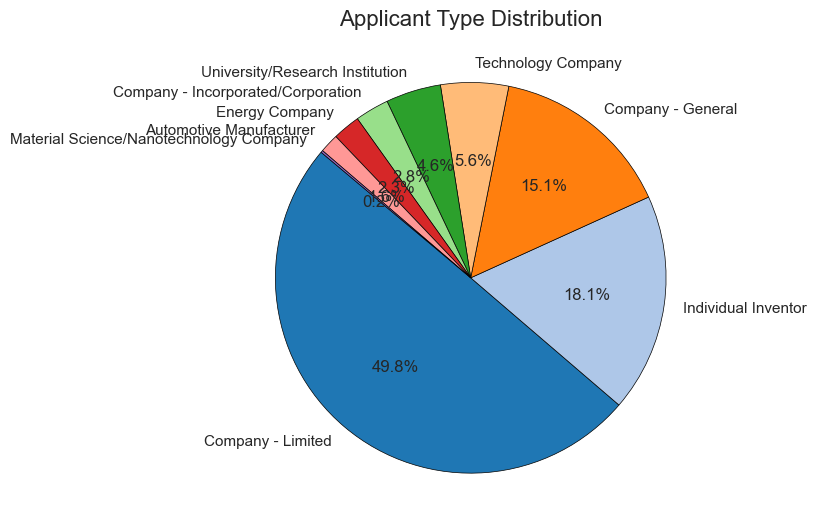

In [297]:
plt.figure(figsize=(8, 8))
plt.pie(
    applicant_type_df['Percentage'],
    labels=applicant_type_df['Applicant Type'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab20.colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.5}
)

plt.title('Applicant Type Distribution', fontsize=16)
plt.tight_layout()
plt.show()

In [298]:
df.columns

Index(['No', 'Title', 'Inventors', 'Applicants', 'Publication number',
       'Earliest priority', 'IPC', 'CPC', 'Publication date',
       'Earliest publication', 'Family number', 'first publication date',
       'second publication date', 'first publication number',
       'second publication number', 'first publication country',
       'second publication country', 'first filing year',
       'earliest priority year', 'applicant country', 'family_jurisdictions',
       'family_members', 'IPC_Meaning', 'first applicant', 'second applicant',
       'first applicant type', 'second applicant type'],
      dtype='object')

**top 10% of actors**

In [299]:

applicant_counts = applicants_df['Applicants'].value_counts()


top_10_applicants_df = applicant_counts.head(10).reset_index()
top_10_applicants_df.columns = ['Applicant', 'Patent Count'] 


#total_patents = top_10_applicants_df['Patent Count'].sum()
total_patents = applicants_df['Applicants'].count()

top_10_applicants_df['Contribution (%)'] = (top_10_applicants_df['Patent Count'] / total_patents) * 100


print("Top 10 Applicants by Number of Patents Filed with Contribution:")
top_10_applicants_df

Top 10 Applicants by Number of Patents Filed with Contribution:


Applicant  Patent Count  \
0           WUHAN GROVE HYDROGEN AUTOMOBILE CO LTD            13   
1  GUANGDONG HYDROGEN ENERGY SCIENCE & TECH CO LTD            10   
2   SHANGHAI HYDROGEN MOBILE REFORMER INSTR CO LTD             8   
3                                YOUON TECH CO LTD             6   
4                    GEELY HOLDING GROUP CO LTD \r             6   
5                 CHINA RAILWAY CONSTR GROUP CO \r             6   
6              CHINA RAILWAY CONSTRUCTION CORP LTD             6   
7                         BEIQI FOTON MOTOR CO LTD             5   
8                               HONDA MOTOR CO LTD             5   
9                        UNIV HENAN SCIENCE & TECH             5   

   Contribution (%)  
0          2.280702  
1          1.754386  
2          1.403509  
3          1.052632  
4          1.052632  
5          1.052632  
6          1.052632  
7          0.877193  
8          0.877193  
9          0.877193

In [300]:

applicant_counts = applicants_df['Applicants'].value_counts()


top_10_applicants_df = applicant_counts.head(10).reset_index()
top_10_applicants_df.columns = ['Applicant', 'Patent Count']  


total_patents = applicants_df['Applicants'].count()


total_top_10_patents = top_10_applicants_df['Patent Count'].sum()


percentage_top_10_contribution = (total_top_10_patents / total_patents) * 100


print(f"Percentage Contribution of Top 10 Applicants: {percentage_top_10_contribution:.2f}%")
innovation_cycle = ""
if percentage_top_10_contribution >=50:
    innovation_cycle = "the innovation cycle is Ending"
elif 30 <= percentage_top_10_contribution < 50:
     innovation_cycle = "the innovation cycle is Slowing"
elif 20 <= percentage_top_10_contribution < 30:
     innovation_cycle = "the innovation cycle is Ongoing"
elif 10 <= percentage_top_10_contribution < 20:
     innovation_cycle = "the innovation cycle is Beginning"
elif percentage_top_10_contribution < 10:
     innovation_cycle = "the innovation cycle is Emmerging"

print(innovation_cycle)

Percentage Contribution of Top 10 Applicants: 12.28%
the innovation cycle is Beginning


In [301]:
# Co-Applicant Rate
#num_patents_with_multiple_applicants = df['Applicants'].str.contains('\n').sum()
num_patents_with_multiple_applicants = (df['second applicant'].notna()).sum()
total_patents = len(df)
co_applicant_rate = (num_patents_with_multiple_applicants / total_patents) * 100
print(f"Co-Applicant Rate: {co_applicant_rate:.2f}%")

Co-Applicant Rate: 14.69%


**growth rate**

In [302]:



patent_counts = df.groupby('first filing year').size().reset_index(name='Patent Count')


patent_counts['Cumulative Count'] = patent_counts['Patent Count'].cumsum()


X=patent_counts['Patent Count']
T=patent_counts['Cumulative Count']
patent_counts['GR'] = ((X- X.shift(1)) / ((T+ T.shift(1))/2)).fillna(0)


patent_counts_sorted = patent_counts.sort_values('first filing year', ascending=False)


patent_counts_sorted[['first filing year', 'Patent Count', 'GR']].head(10)


first filing year  Patent Count        GR
32               2025             1 -0.116818
31               2024            59  0.021436
30               2023            49 -0.026667
29               2022            60  0.027933
28               2021            50  0.029703
27               2020            41  0.011650
26               2019            38  0.027523
25               2018            32  0.032787
24               2017            26 -0.012987
23               2016            28  0.047244

In [303]:
# Filter the DataFrame for the years between 2018 and 2023
df_2018_2023 = patent_counts[(patent_counts['first filing year'] >= 2018) & (patent_counts['first filing year'] <= 2023)]

# Sum the annual growth rates (GR) for the period
growth_rate_2018_2023 = df_2018_2023['GR'].sum()*100

# Print the result
print(f"Growth Rate between 2018 and 2023 (sum of annual GR): {growth_rate_2018_2023:.2f}%")

Growth Rate between 2018 and 2023 (sum of annual GR): 10.29%


In [304]:
from datetime import date
current_year = date.today().year
start_year = current_year - 2
end_year = start_year - 5


print('current: ' , current_year , 'start : ' , start_year , 'end : ' , end_year)

current:  2025 start :  2023 end :  2018


In [305]:


df_2018_2023 = patent_counts[(patent_counts['first filing year'] >= end_year) & (patent_counts['first filing year'] <= start_year)]


    

# Sum the annual growth rates (GR) for the period
GR = df_2018_2023['GR'].sum()*100


print(f"\nGrowth Rate from {end_year} to {start_year}: {GR:.2f}%")


if GR >=50:
    print ("the technology is Booming")
elif 20 <= GR < 50:
    print ("the technology is Trending")
elif 10 <= GR < 20:
    print ("the technology is Quite_Trending")
elif 0 <= GR < 10:
    print ("the technology is Steady")
elif GR < 0:
    print ("the technology is Declining")


Growth Rate from 2018 to 2023: 10.29%
the technology is Quite_Trending


**market cost**


In [306]:
df.columns

Index(['No', 'Title', 'Inventors', 'Applicants', 'Publication number',
       'Earliest priority', 'IPC', 'CPC', 'Publication date',
       'Earliest publication', 'Family number', 'first publication date',
       'second publication date', 'first publication number',
       'second publication number', 'first publication country',
       'second publication country', 'first filing year',
       'earliest priority year', 'applicant country', 'family_jurisdictions',
       'family_members', 'IPC_Meaning', 'first applicant', 'second applicant',
       'first applicant type', 'second applicant type'],
      dtype='object')

In [307]:
cost = pd.read_csv('corrected-patent-cost-data.csv')

In [308]:
cost.head()

Country  Years 0.0-1.5  Years 2.0-4.5  Years 5.0-9.5  Years 10.0-14.5  \
0      US          10500           6000          11500             5000   
1      WO           5400           4900           4100             1500   
2      EP           7600           8900          12000             9000   
3      KR           4000           5000           7500             8400   
4      JP           4500           5500           6000             6500   

   Years 15.0-20.0  Total Cost (US$)  
0             3000             36000  
1             1000             16900  
2             5100             42600  
3            10500             35400  
4             7500             30000

In [309]:
cost.tail()

Country  Years 0.0-1.5  Years 2.0-4.5  Years 5.0-9.5  Years 10.0-14.5  \
50      CL           2500           1500           1500             1000   
51      BD           1500           1500           1000             1000   
52      LU           1000           1500           1000             1000   
53      NZ           1000           1000           1500             1000   
54      ZA           1000           1500           1000             1000   

    Years 15.0-20.0  Total Cost (US$)  
50             1000              7500  
51             1000              6000  
52             1000              5500  
53             1500              6000  
54             1000              5500

In [310]:
cost

Country  Years 0.0-1.5  Years 2.0-4.5  Years 5.0-9.5  Years 10.0-14.5  \
0       US          10500           6000          11500             5000   
1       WO           5400           4900           4100             1500   
2       EP           7600           8900          12000             9000   
3       KR           4000           5000           7500             8400   
4       JP           4500           5500           6000             6500   
5       ID           1500           4500           4500             5500   
6       VN           1500           4500           3000             4500   
7       BR           1500           4500           3000             5500   
8       CN           6000           5800           5200             4000   
9       RU           1500           4500           2000             4500   
10      NO           1500           4500           2000             4500   
11      TH           1500           4500           2000             4500   
12      TR           1500           4500           2000             4500   
13      TW           1500           4500           3500             4500   
14      DE           5000           7000           3000             5000   
15      AT           2000           4000           2000             4000   
16      CZ           1500           3500           2000             3500   
17      AR           1500           3500           2000             4500   
18      HU           1500           3500           2500             3500   
19      NL           2000           4000           2500             3500   
20      FI           1500           3500           1500             2500   
21      MX           1500           3500           2500             2500   
22      MA           1500           3500           2500             2500   
23      SK           1500           3500           1500             2500   
24      SA           1500           3500           2500             2500   
25      PL           1500           3500           2500             2500   
26      HK           1500           3500           1500             2500   
27      IT           4500           4500           2500             3000   
28      DK           1500           3500           1500             2500   
29      PH           1500           3500           2500             2500   
30      PE           1500           3500           1500             2500   
31      SE           1500           3500           2500             1500   
32      CO           1500           2500           3500             1500   
33      MY           2500           1500           2500             2500   
34      ES           2500           3000           2000             2500   
35      PT           1500           2500           1500             2500   
36      FR           4600           3800           3000             3500   
37      AU           1500           2500           1500             2500   
38      SG           1500           2500           1500             2500   
39      EG           1500           2500           1500             1500   
40      GR           1500           2500           1500             1500   
41      IL           1500           2500           1500             1500   
42      CA           3200           2700           3500             2300   
43      VE           1500           2500           1500             1500   
44      PK           1500           2500           2500             3500   
45      IN           1500           2500           2500             3500   
46      GB           3000           3500           2000             2000   
47      IE           1500           2000           1500             1500   
48      CH           1500           2000           1500             1500   
49      BE           1500           2000           1500             1500   
50      CL           2500           1500           1500             1000   
51      BD           1500           1500           

In [311]:
import pandas as pd


reference_countries = ['FR', 'EP', 'US', 'CA', 'CN', 'IN', 'KR']


economic_groups = {
    # China-like economies 
    'BR': 'CN', 'RU': 'CN', 'VN': 'CN', 'ZA': 'CN', 'MX': 'CN', 
    'ID': 'CN', 'TR': 'CN', 'TH': 'CN', 'SA': 'CN', 'AR': 'CN',
    'CL': 'CN', 'CO': 'CN', 'PE': 'CN', 'PH': 'CN', 'EG': 'CN',
    'PK': 'CN', 'BD': 'CN', 'MA': 'CN', 'VE': 'CN',
    
    # France-like economies 
    'DE': 'FR', 'GB': 'FR', 'IT': 'FR', 'ES': 'FR', 'NL': 'FR',
    'SE': 'FR', 'CH': 'FR', 'BE': 'FR', 'AT': 'FR', 'DK': 'FR',
    'FI': 'FR', 'NO': 'FR', 'PT': 'FR', 'IE': 'FR', 'GR': 'FR',
    'CZ': 'FR', 'HU': 'FR', 'SK': 'FR', 'PL': 'FR',
    
    # Canada-like economies 
    'AU': 'CA', 'JP': 'KR', 'SG': 'KR', 'TW': 'KR', 'IL': 'KR',
    'NZ': 'CA', 'MY': 'KR', 'HK': 'KR',
    
}


for idx, row in cost.iterrows():
    country = row['Country']
    if country not in reference_countries:
        # Find the mapped reference country
        reference = economic_groups.get(country, 'CN')  
        # Copy costs from the reference country
        ref_row = cost[cost['Country'] == reference].iloc[0]
        cost.loc[idx, 'Years 0.0-1.5':'Total Cost (US$)'] = ref_row['Years 0.0-1.5':'Total Cost (US$)']
        

In [312]:
import pandas as pd
from datetime import datetime

current_year = datetime.now().year


df['Patent Age'] = current_year - df['earliest priority year']


df['Patent Age'] = df['Patent Age'].apply(lambda x: max(0, x) if pd.notnull(x) else x)

In [313]:
df.columns

Index(['No', 'Title', 'Inventors', 'Applicants', 'Publication number',
       'Earliest priority', 'IPC', 'CPC', 'Publication date',
       'Earliest publication', 'Family number', 'first publication date',
       'second publication date', 'first publication number',
       'second publication number', 'first publication country',
       'second publication country', 'first filing year',
       'earliest priority year', 'applicant country', 'family_jurisdictions',
       'family_members', 'IPC_Meaning', 'first applicant', 'second applicant',
       'first applicant type', 'second applicant type', 'Patent Age'],
      dtype='object')

In [314]:
def assign_cost(row, cost_df):
    country = row['first publication country']
    age = row['Patent Age']
    
    cost_row = cost_df[cost_df['Country'] == country]
    
    if not cost_row.empty:
        
        cost_columns = [
            'Years 0.0-1.5',
            'Years 2.0-4.5', 
            'Years 5.0-9.5',
            'Years 10.0-14.5',
            'Years 15.0-20.0'
        ]
        
        if age > 20:
            return cost_row['Total Cost (US$)'].values[0]
        elif age <= 1.5:
            return cost_row[cost_columns[0]].values[0]
        else:
            # Calculate cumulative sum up to current age bracket
            bracket_index = next(i for i, limit in enumerate([1.5, 4.5, 9.5, 14.5, 20.0]) if age <= limit)
            return cost_row[cost_columns[:bracket_index+1]].sum(axis=1).values[0]
    else:
        return None


In [315]:
df['patent cost'] = df.apply(lambda row: assign_cost(row, cost), axis=1)

# 4. Handle remaining cases
df['patent cost'] = df['patent cost'].fillna(0).astype(int)

In [316]:
zero_cost_count = (df['patent cost'] == 0).sum()
print(f"Number of patents with assigned cost 0: {zero_cost_count}")


Number of patents with assigned cost 0: 0


In [317]:
df.head(2)

No                                              Title  \
0   1    Plug-in hybrid vehicle with fast energy storage   
1   2  Vehicle charging system capable of hydrogen an...   

                                           Inventors  \
0  BENDER DONALD A [US] \r\nDESHMANE ATUL [US] \r...   
1                                      HONG SEONG HO   

                    Applicants Publication number Earliest priority  \
0  AFS TRINITY POWER CORP [US]     US2006250902A1        2005-05-05   
1       HOGREENAIR CO LTD [KR]      KR102511398B1        2022-09-20   

                                                 IPC  \
0                                         [H04B1/20]   
1  [B60L3/00, B60L53/16, B60L53/51, B60L53/54, B6...   

                                                 CPC Publication date  \
0  [B60K6/20 (KR), B60K6/28 (KR), B60K6/30 (EP,US...       2006-11-09   
1                 [Y02T10/70 (EP), Y02T10/7072 (EP)]       2023-03-20   

  Earliest publication  ...  applicant country  \
0           2006-11-09  ...                 US   
1           2023-03-20  ...                 KR   

                   family_jurisdictions  \
0  [AU, CA, CN, EP, HK, JP, KR, US, WO]   
1                                  [KR]   

                                      family_members  \
0  [AU2006295147A1, AU2006295147B2, CA2623398A1, ...   
1                                    [KR102511398B1]   

                        IPC_Meaning              first applicant  \
0  ELECTRIC COMMUNICATION TECHNIQUE  AFS TRINITY POWER CORP [US]   
1               VEHICLES IN GENERAL       HOGREENAIR CO LTD [KR]   

  second applicant first applicant type  second applicant type  Patent Age  \
0             None    Company - General                Unknown          20   
1             None    Company - Limited                Unknown           3   

  patent cost  
0       36000  
1        9000  

[2 rows x 29 columns]

df = df.drop('Assigned Cost' , axis= 1)

In [318]:
df.columns

Index(['No', 'Title', 'Inventors', 'Applicants', 'Publication number',
       'Earliest priority', 'IPC', 'CPC', 'Publication date',
       'Earliest publication', 'Family number', 'first publication date',
       'second publication date', 'first publication number',
       'second publication number', 'first publication country',
       'second publication country', 'first filing year',
       'earliest priority year', 'applicant country', 'family_jurisdictions',
       'family_members', 'IPC_Meaning', 'first applicant', 'second applicant',
       'first applicant type', 'second applicant type', 'Patent Age',
       'patent cost'],
      dtype='object')

**originality rate** (IPC&Originality_Rate notebook)

In [319]:
OR_df = df.head(50)
#OR_df.to_csv('OR_df.csv' , index=False)

In [321]:
from bs4 import BeautifulSoup
import pandas as pd
import time
import random
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException

class EspacenetORScraper:
    def __init__(self, headless=True):
        """Initialize the scraper with configurable options."""
        options = uc.ChromeOptions()
        if headless:
            options.add_argument('--headless')  # Run in headless mode

        options.add_argument('--disable-blink-features=AutomationControlled')
        self.driver = uc.Chrome(options=options)
        self.driver.set_page_load_timeout(30)
        self.driver.set_window_size(1600, 1300)

    def add_random_delay(self, min_seconds=1, max_seconds=3):
        """Add a random delay to mimic human behavior."""
        time.sleep(random.uniform(min_seconds, max_seconds))

    def get_page_html(self, url, retries=3):
        """
        Navigate to the given URL and return the page HTML.
        Retry the operation if a timeout occurs.

        Args:
            url (str): The URL to navigate to.
            retries (int): Number of retry attempts.

        Returns:
            str: The page HTML, or None if all retries fail.
        """
        for attempt in range(retries):
            try:
                print(f"Navigating to: {url} (Attempt {attempt + 1})")
                self.driver.get(url)
                WebDriverWait(self.driver, 30).until(
                    EC.presence_of_element_located((By.TAG_NAME, "body"))
                )

                # Add a random delay to mimic human behavior
                self.add_random_delay(3, 5)

                # Return the page HTML
                return self.driver.page_source

            except TimeoutException:
                print(f"Timed out waiting for the page to load. Retrying ({attempt + 1}/{retries})...")
                if attempt == retries - 1:
                    print("Max retries reached. Unable to load the page.")
                    return None
            except Exception as e:
                print(f"An error occurred: {e}")
                return None

    def click_citations_tab_and_get_html(self, retries=3):
        """
        Click the "Citations" tab and return the HTML content of the table's tbody.
        If no citations are found (error message is present), return None.

        Args:
            retries (int): Number of retry attempts.

        Returns:
            str or None: The HTML content of the table's tbody, or None if no citations are found.
        """
        for attempt in range(retries):
            try:
                # Wait for the "Citations" tab to be clickable
                citations_tab = WebDriverWait(self.driver, 30).until(
                    EC.element_to_be_clickable((By.XPATH, "//li[@role='tab']//span[contains(text(), 'Citations')]"))
                )
                print("Citations tab found. Clicking...")
                citations_tab.click()
                self.add_random_delay(2, 4)

                # Wait for the wrapper to load
                WebDriverWait(self.driver, 30).until(
                    EC.presence_of_element_located((By.CSS_SELECTOR, "div.wrapper--m6N288zA"))
                )
                print("Wrapper found.")

                # Check if the table exists inside the wrapper
                table = self.driver.find_elements(By.CSS_SELECTOR, "div.wrapper--m6N288zA table.table__table--8dvWEm4j")
                if table:
                    print("Table found inside the wrapper.")
                    # Wait for the table's tbody to load
                    WebDriverWait(self.driver, 30).until(
                        EC.presence_of_element_located((By.CSS_SELECTOR, "table.table__table--8dvWEm4j tbody.table__body--wKJVkwCZ"))
                    )
                    print("Table body found.")

                    # Add a delay to ensure the table is fully rendered
                    self.add_random_delay(2, 4)

                    # Extract the HTML content of the table's tbody
                    tbody = self.driver.find_element(By.CSS_SELECTOR, "table.table__table--8dvWEm4j tbody.table__body--wKJVkwCZ")
                    return tbody.get_attribute("outerHTML")
                else:
                    # Check if the error message exists
                    error_message = self.driver.find_elements(By.CSS_SELECTOR, "div.wrapper--m6N288zA div.error__container--85Brg4Ek")
                    if error_message:
                        print("No citations found for this patent.")
                        return None  # Return None if no citations are found
                    else:
                        print("Neither table nor error message found. Retrying...")
                        continue  # Retry the loop

            except TimeoutException:
                print(f"Timed out waiting for the 'Citations' tab to load. Retrying ({attempt + 1}/{retries})...")
                if attempt == retries - 1:
                    print("Max retries reached. Unable to load the 'Citations' tab.")
                    return None
            except Exception as e:
                print(f"An error occurred while clicking the 'Citations' tab: {e}")
                return None

    def parse_tbody_to_dataframe(self, tbody_html):
        """
        Parse the tbody HTML and convert it into a pandas DataFrame.

        Args:
            tbody_html (str): The HTML content of the tbody.

        Returns:
            pd.DataFrame: A DataFrame containing the extracted data.
        """
        soup = BeautifulSoup(tbody_html, 'html.parser')
        rows = soup.find_all('tr', class_='table__row--qDMbhLBz')

        data = []
        for row in rows:
            cells = row.find_all('td', class_='table__cell--9cdFfes6')
            row_data = []
            for cell in cells:
                # Extract text from the span if it exists, otherwise extract text from the cell
                span = cell.find('span')
                if span:
                    row_data.append(span.get_text(strip=True))
                else:
                    row_data.append(cell.get_text(strip=True))
            data.append(row_data)

        # Define column names based on the table structure
        columns = [
            "CitationOrigin", "Publication", "Title", "Earliest PriorityDate",
            "PublicationDate", "Applicants", "IPC", "CPC"
        ]

        # Create a DataFrame
        df = pd.DataFrame(data, columns=columns)
        return df

    def close(self):
        """Close the browser when done."""
        if self.driver:
            self.driver.quit()


if __name__ == '__main__':

    #df = pd.read_csv('OR_df_exp.csv')  # Replace with your actual file path
    
    # Make sure the DataFrame has the required columns
    required_columns = ['Family number', 'first publication number']
    if not all(col in OR_df.columns for col in required_columns):
        raise ValueError(f"Input DataFrame must contain these columns: {required_columns}")
    
    # Initialize the scraper
    scraper = EspacenetORScraper(headless=False)  # Set headless to False to see the browser in action

    # Create a new empty DataFrame to store the results
    # Initialize with the same columns as the input DataFrame plus the new 'citations IPC' column
    result_or_df = pd.DataFrame(columns=df.columns.tolist() + ['citations IPC'])

    # Counter to keep track of non-empty lists in the 'citations IPC' column
    non_empty_count = 0

    try:
        # Iterate over each row in the original DataFrame
        for index, row in OR_df.iterrows():
            # Stop if we have at least 30 rows with non-empty citations
            if non_empty_count >= 30:
                break

            # Construct the URL for the current patent
            url = f"https://worldwide.espacenet.com/patent/search/family/{row['Family number']}/publication/{row['first publication number']}?q=pn%3D{row['first publication number']}"
            print(f"Processing patent: {row['first publication number']}")

            # Get the page HTML
            html = scraper.get_page_html(url, retries=3)
            if html:
                print("Page HTML retrieved successfully.")

                # Click the "Citations" tab and get its HTML content
                tbody_html = scraper.click_citations_tab_and_get_html(retries=3)
                if tbody_html:
                    print(f"Citations tab tbody HTML retrieved successfully for {row['first publication number']}.")

                    # Parse the tbody HTML and convert it into a DataFrame
                    citations_df = scraper.parse_tbody_to_dataframe(tbody_html)
                    if citations_df is not None and not citations_df.empty:  # Check if citations were found
                        print(f"DataFrame created successfully for {row['first publication number']}.")

                        # Extract the IPC classes from the citations DataFrame
                        ipc_list = citations_df["IPC"].tolist()

                        # Create a new row as a dictionary
                        new_row = row.to_dict()
                        new_row['citations IPC'] = ipc_list

                        # Append the row to the result DataFrame - FIX FOR THE ERROR
                        # Create a temporary DataFrame with the new row and ensure index is unique
                        temp_df = pd.DataFrame([new_row])
                        result_or_df = pd.concat([result_or_df, temp_df], ignore_index=True)

                        # Increment the non-empty count
                        non_empty_count += 1
                        print(f"Added patent {row['first publication number']} with {len(ipc_list)} citation IPCs. Total with citations: {non_empty_count}")
                    else:
                        print(f"No citations found for {row['first publication number']}.")
                else:
                    print(f"No citations found for {row['first publication number']}.")

    finally:
        # Close the browser
        scraper.close()
        print("Scraper closed.")

        # Display the resulting DataFrame
        if not result_or_df.empty:
            print(result_or_df[['first publication number', 'citations IPC']])


            # Save the resulting DataFrame to a CSV file
            #result_df.to_csv("patents_with_citations_ipc.csv", index=False, encoding="utf-8")
            #print("DataFrame saved to 'patents_with_citations_ipc.csv'.")
        else:
            print("No results collected. Result DataFrame is empty.")

Processing patent: US2006250902A1
Navigating to: https://worldwide.espacenet.com/patent/search/family/37397092/publication/US2006250902A1?q=pn%3DUS2006250902A1 (Attempt 1)
Page HTML retrieved successfully.
Citations tab found. Clicking...
Wrapper found.
Table found inside the wrapper.
Table body found.
Citations tab tbody HTML retrieved successfully for US2006250902A1.
DataFrame created successfully for US2006250902A1.
Added patent US2006250902A1 with 15 citation IPCs. Total with citations: 1
Processing patent: KR102511398B1
Navigating to: https://worldwide.espacenet.com/patent/search/family/85796445/publication/KR102511398B1?q=pn%3DKR102511398B1 (Attempt 1)


C:\Users\tasni\AppData\Local\Temp\ipykernel_24548\531274605.py:221: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Page HTML retrieved successfully.
Citations tab found. Clicking...
Wrapper found.
Table found inside the wrapper.
Table body found.
Citations tab tbody HTML retrieved successfully for KR102511398B1.
DataFrame created successfully for KR102511398B1.
Added patent KR102511398B1 with 4 citation IPCs. Total with citations: 2
Processing patent: KR102511391B1
Navigating to: https://worldwide.espacenet.com/patent/search/family/85796535/publication/KR102511391B1?q=pn%3DKR102511391B1 (Attempt 1)
Page HTML retrieved successfully.
Citations tab found. Clicking...
Wrapper found.
Table found inside the wrapper.
Table body found.
Citations tab tbody HTML retrieved successfully for KR102511391B1.
DataFrame created successfully for KR102511391B1.
Added patent KR102511391B1 with 5 citation IPCs. Total with citations: 3
Processing patent: KR20230163874A
Navigating to: https://worldwide.espacenet.com/patent/search/family/89124565/publication/KR20230163874A?q=pn%3DKR20230163874A (Attempt 1)
Page HTML retri

In [322]:
def process_citations(citations):
    # Initialize a set to store unique citations
    processed = set()
    
    # Iterate over each citation string
    for citation in citations:
        # Split the citation string by commas
        parts = citation.split(',')
        # Add each part to the set (strip whitespace)
        for part in parts:
            # Split by '/' and take the first part, then strip whitespace
            processed.add(part.split('/')[0].strip())

    unique_citaions = list(processed)
    unique_citaions.sort()
    
    # Convert the set back to a list
    return unique_citaions

In [323]:
result_or_df['citations IPC'] = result_or_df['citations IPC'].apply(process_citations)
result_or_df.head()

No                                              Title  \
0  1    Plug-in hybrid vehicle with fast energy storage   
1  2  Vehicle charging system capable of hydrogen an...   
2  3  Electric vehicle charging system using hydroge...   
3  4  Electric vehicle wireless charging system thro...   
4  6            Nickel-hydrogen battery charging method   

                                           Inventors  \
0  BENDER DONALD A [US] \r\nDESHMANE ATUL [US] \r...   
1                                      HONG SEONG HO   
2                                      HONG SEONG HO   
3                                  SON JEONG KI [KR]   
4                  LIU YI \r\nZHOU LIFU \r\nNI RUJIN   

                                      Applicants  \
0                    AFS TRINITY POWER CORP [US]   
1                         HOGREENAIR CO LTD [KR]   
2                         HOGREENAIR CO LTD [KR]   
3                              SON JEONG KI [KR]   
4  HUIZHOU DESAY SV AUTOMOBILE ELECTRONIC CO LTD   

              Publication number Earliest priority  \
0                 US2006250902A1        2005-05-05   
1                  KR102511398B1        2022-09-20   
2                  KR102511391B1        2022-09-20   
3                 KR20230163874A        2022-05-24   
4  CN105098267A \r\nCN105098267B        2014-04-29   

                                                 IPC  \
0                                         [H04B1/20]   
1  [B60L3/00, B60L53/16, B60L53/51, B60L53/54, B6...   
2  [B60L3/00, B60L53/16, B60L53/51, B60L53/54, B6...   
3  [B60L53/12, B60L53/38, B60L53/54, B60L53/66, B...   
4                                        [H01M10/44]   

                                                 CPC  \
0  [B60K6/20 (KR), B60K6/28 (KR), B60K6/30 (EP,US...   
1                 [Y02T10/70 (EP), Y02T10/7072 (EP)]   
2                                   [Y02T10/70 (EP)]   
3  [B60L53/12 (KR), B60L53/38 (KR), B60L53/54 (KR...   
4                                   [Y02E60/10 (EP)]   

            Publication date Earliest publication  ...  \
0                 2006-11-09           2006-11-09  ...   
1                 2023-03-20           2023-03-20  ...   
2                 2023-03-20           2023-03-20  ...   
3                 2023-12-01           2023-12-01  ...   
4  2015-11-25 \r\n2017-05-24           2015-11-25  ...   

                   family_jurisdictions  \
0  [AU, CA, CN, EP, HK, JP, KR, US, WO]   
1                                  [KR]   
2                                  [KR]   
3                                  [KR]   
4                                  [CN]   

                                      family_members  \
0  [AU2006295147A1, AU2006295147B2, CA2623398A1, ...   
1                                    [KR102511398B1]   
2                                    [KR102511391B1]   
3                                   [KR20230163874A]   
4                       [CN105098267A, CN105098267B]   

                        IPC_Meaning  \
0  ELECTRIC COMMUNICATION TECHNIQUE   
1               VEHICLES IN GENERAL   
2               VEHICLES IN GENERAL   
3               VEHICLES IN GENERAL   
4                 ELECTRIC ELEMENTS   

                                 first applicant second applicant  \
0                    AFS TRINITY POWER CORP [US]             None   
1                         HOGREENAIR CO LTD [KR]             None   
2                         HOGREENAIR CO LTD [KR]             None   
3                              SON JEONG KI [KR]             None   
4  HUIZHOU DESAY SV AUTOMOBILE ELECTRONIC CO LTD             None   

  first applicant type second applicant type Patent Age patent cost  \
0    Company - General               Unknown         20       36000   
1    Company - Limited               Unknown          3        9000   
2    Company - Limited               Unknown          3        9000   
3  Individual Inventor               Unknown          3        9000   
4    Company - Limited               Unknown    

def process_ipc_codes(ipc_list):
    """
    Process a list of IPC codes with country codes in parentheses.
    
    Args:
        ipc_list (list or str): A list of IPC codes in the format "CODE (COUNTRY)" or a string
                               representation of such a list.
                               
    Returns:
        list: The original list without any modifications.
    
    Example:
        >>> input_list = ["H01M8/04201 (CN)", "H01M8/0618 (CN)", "H01M8/0625 (CN)", 
                          "Y02E60/50 (EP)", "Y02T90/40 (EP)"]
        >>> process_ipc_codes(input_list)
        ['H01M8/04201 (CN)', 'H01M8/0618 (CN)', 'H01M8/0625 (CN)', 'Y02E60/50 (EP)', 'Y02T90/40 (EP)']
    """
    # If the input is a string (as might happen if extracted from text),
    # convert it to a list by parsing the string
    if isinstance(ipc_list, str):
        # Check if it's a string representation of a list (starts with [ and ends with ])
        if ipc_list.strip().startswith('[') and ipc_list.strip().endswith(']'):
            # Remove the brackets and split by commas
            # Use eval carefully - only if you're sure the input is safe
            try:
                ipc_list = eval(ipc_list)
            except:
                # If eval fails, do a simple string split and clean up
                content = ipc_list.strip()[1:-1]  # Remove brackets
                ipc_list = [item.strip().strip("'\"") for item in content.split(',')]
    
    # Ensure the result is a list
    if not isinstance(ipc_list, list):
        ipc_list = [ipc_list]
    
    # Return the original list (as per your request)
    return ipc_list

# Example usage:
if __name__ == "__main__":
    input_list = ["H01M8/04201 (CN)", "H01M8/0618 (CN)", "H01M8/0625 (CN)", 
                  "Y02E60/50 (EP)", "Y02T90/40 (EP)"]
    result = process_ipc_codes(input_list)
    print(result)
    
    # Test with a string input
    string_input = "['H01M8/04201 (CN)', 'H01M8/0618 (CN)', 'H01M8/0625 (CN)', 'Y02E60/50 (EP)', 'Y02T90/40 (EP)']"
    result2 = process_ipc_codes(string_input)
    print(result2)

In [324]:
len(result_or_df)

23

improved ipc codes function

In [325]:
import ast

def process_ipc_codes(ipc_list):
    """
    Process a list of IPC codes with country codes in parentheses.
    
    Args:
        ipc_list (list or str): A list of IPC codes in the format "CODE (COUNTRY)" or a string
                               representation of such a list.
                               
    Returns:
        list: The original list without any modifications.
    
    Example:
        >>> input_list = ["H01M8/04201 (CN)", "H01M8/0618 (CN)", "H01M8/0625 (CN)", 
                          "Y02E60/50 (EP)", "Y02T90/40 (EP)"]
        >>> process_ipc_codes(input_list)
        ['H01M8/04201 (CN)', 'H01M8/0618 (CN)', 'H01M8/0625 (CN)', 'Y02E60/50 (EP)', 'Y02T90/40 (EP)']
    """
    # If input is a string, try to safely convert it into a list
    if isinstance(ipc_list, str):
        ipc_list = ipc_list.strip()
        
        if ipc_list.startswith("[") and ipc_list.endswith("]"):
            try:
                ipc_list = ast.literal_eval(ipc_list)  # Safe alternative to eval()
            except (SyntaxError, ValueError):
                # If parsing fails, fallback to a simple split method
                ipc_list = [item.strip().strip("'\"") for item in ipc_list[1:-1].split(",")]

    # Ensure output is a list
    return ipc_list if isinstance(ipc_list, list) else [ipc_list]

# # Example usage:
# if __name__ == "__main__":
#     input_list = ["H01M8/04201 (CN)", "H01M8/0618 (CN)", "H01M8/0625 (CN)", 
#                   "Y02E60/50 (EP)", "Y02T90/40 (EP)"]
#     result = process_ipc_codes(input_list)
#     print(result)
    
#     # Test with a string input
#     string_input = "['H01M8/04201 (CN)', 'H01M8/0618 (CN)', 'H01M8/0625 (CN)', 'Y02E60/50 (EP)', 'Y02T90/40 (EP)']"
#     result2 = process_ipc_codes(string_input)
#     print(result2)


In [326]:
result_or_df['IPC'] = result_or_df['IPC'].apply(process_ipc_codes)
result_or_df['IPC'] = result_or_df['IPC'].apply(process_citations)
result_or_df['CPC'] = result_or_df['CPC'].apply(process_ipc_codes)
result_or_df['CPC'] = result_or_df['CPC'].apply(process_citations)

In [327]:
result_or_df['IPC'].head(2)

0                                  [H04B1]
1    [B60L3, B60L53, B60L58, H01M8, H05K7]
Name: IPC, dtype: object

In [328]:
citations_IPC_df= result_or_df[['first publication number','IPC','citations IPC']]
citations_IPC_df['IPC count']= citations_IPC_df['IPC'].apply(len)
citations_IPC_df['citations IPC count']= citations_IPC_df['citations IPC'].apply(len)

C:\Users\tasni\AppData\Local\Temp\ipykernel_24548\2742703499.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\tasni\AppData\Local\Temp\ipykernel_24548\2742703499.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [329]:
#remove rows in whitch IPC count > citations IPC count
citations_IPC_df = citations_IPC_df[citations_IPC_df['IPC count'] <= citations_IPC_df['citations IPC count']]

In [330]:

citations_IPC_df['%citaions'] = citations_IPC_df['IPC count'] / citations_IPC_df['citations IPC count']

In [331]:
citations_IPC_df

first publication number  \
0            US2006250902A1   
1             KR102511398B1   
2             KR102511391B1   
3            KR20230163874A   
4              CN105098267A   
5            US2022140365A1   
6              CN108550935A   
7              CN112606713A   
8            US2013093378A1   
9              CN109263516A   
10             CN106025314A   
11           WO2023128748A1   
12           KR20210053589A   
13             CN113525181A   
14             CN113085622A   
15             US12005772B2   
16             CN108674229A   
17             CN108248409A   
18             US10960783B2   
19           WO2023146504A1   
20             CN104210379A   
22             CN103350650A   

                                                  IPC  \
0                                             [H04B1]   
1               [B60L3, B60L53, B60L58, H01M8, H05K7]   
2               [B60L3, B60L53, B60L58, H01M8, H05K7]   
3                            [B60L53, G06Q20, G06Q50]   
4                                            [H01M10]   
5                              [H01M16, H01M8, H02J7]   
6                                            [H01M10]   
7                     [B60L50, B60L58, H02J7, H02P27]   
8                                             [H02J7]   
9                                     [B60L58, H01M8]   
10                      [B60L11, H01M4, H01M8, H02J7]   
11                    [B60K6, B60L15, B60L53, B60L58]   
12                            [B60L58, B60L7, B60T13]   
13                                    [B60L58, H01M8]   
14  [B60L53, F17C13, F17C5, F17C7, F17D1, H01M8, H...   
15            [B60K15, F02B13, F02B43, H01M10, H02J7]   
16                     [B60L50, B60L53, B60S5, H02J7]   
17                                    [B60L11, H01M8]   
18  [B60L50, B60L53, B60S5, B67D7, H04B5, H04W4, H...   
19                             [B60L53, B60L7, H02J7]   
20                                           [B60L11]   
22                            [B60K1, B60L11, B60L15]   

                                        citations IPC  IPC count  \
0   [B06L1, B60K1, B60K17, B60K21, B60K23, B60K25,...          1   
1   [B60K15, B60L3, B60L50, B60L53, B60P3, F17C11,...          5   
2   [B60K15, B60L3, B60L50, B60L53, B60P3, C25B1, ...          5   
3   [B60L11, B60L53, B60M7, F16H7, G06Q50, H01M10,...          3   
4               [E02F3, E02F9, F15B11, H01M10, H02J7]          1   
5   [B60L50, B60L53, B60S5, B64B1, B64C39, B64D27,...          3   
6                                     [H01M10, H02J7]          1   
7   [B60K1, B60L11, B60L50, B60L58, B60L7, H01M10,...          4   
8   [B60L11, B60L8, B63C7, B63H11, B63H13, B63H21,...          1   
9   [, B60L1, B60L11, B60L15, B60L50, B60L58, H01M...          2   
10              [B60L11, C01B3, H01M8, H02J7, H02S10]          4   
11  [B01J19, B01J7, B60K1, B60L1, B60L11, B60L58, ...          4   
12                            [B60L11, B60L15, B60L7]          3   
13                                 [, B60L50, B60L58]          2   
14  [B60L11, B60L53, C25B1, C25B15, C25B9, E06C9, ...          7   
15            [B60K6, B60W20, F02D19, F02M21, H01L31]          5   
16  [B60C19, B60K15, B60L11, B60S5, B65B1, B65B3, ...          4   
17  [B60L11, C01B3, C02F101, C02F9, C25B1, H01M10,...          2   
18  [, B60H1, B60K15, B60K6, B60L11, B60L3, B60L50...          7   
19  [, B60H1, B60L11, B60L53, B60L58, F03D9, G06Q3...          3   
20                            [B60L11, H01M10, H01M8]          1   
22  [, B01B1, B60K6, B60L11, B60L50, B60W10, C01B3...          3   

    citations IPC count  %citaions  
0                    40   0.025000  
1                    11   0.454545  
2                    15   0.333333  
3                     8   0.375000  
4                     5   0.200000  
5                    22   0.136364  
6                     2   0.500000  
7                    10   0.400000  
8                    27   0.037037  
9                     9   0.222222  
10   

In [332]:
#originality rate calculation 
citations_IPC_df['%S²'] = citations_IPC_df['%citaions']**2
mean_S_square = citations_IPC_df['%S²'].sum()
num_rows = len(citations_IPC_df)
original_rate = 1- mean_S_square/num_rows
print('num rows = ' , num_rows)
print('OR = ' ,' {:.2f}%'.format(original_rate) )

num rows =  22
OR =   0.79%


**family analysis**

family_df = pd.read_csv('family_df.csv')
family_df = family_df.drop('Unnamed: 0' , axis= 1)
family_df.columns

In [333]:
family_df= df.copy()

In [334]:
df['family_members']

0      [AU2006295147A1, AU2006295147B2, CA2623398A1, ...
1                                        [KR102511398B1]
2                                        [KR102511391B1]
3                                       [KR20230163874A]
4                           [GB2631101A, WO2024261465A1]
                             ...                        
493                                       [CN212784823U]
494                                       [CN111668919A]
495                         [CN105162225A, CN105162225B]
496                         [CN110722990A, CN110722990B]
497                                       [CN119099437A]
Name: family_members, Length: 497, dtype: object

In [335]:
# 1. Calculate number of family members per row
family_df['family_members_count'] = family_df['family_members'].str.len()

# 2. Calculate total across all patents
total_family_members = family_df['family_members_count'].sum()

print(f"Total family members across all patents: {total_family_members}")


Total family members across all patents: 1104


***market strategy***

In [336]:
import pandas as pd


market_value = df['patent cost'].sum()


df['Patent Value'] = df['patent cost']
#market rate fixed
market_rate = total_family_members / len(df)

Patent_Value=market_value/len(df)

print(f"Market Value: ${market_value:,.2f}")
print(f"Market Rate: ${market_rate:,.2f} per patent")
print(f"Mean Value of Patents: ${Patent_Value:,.2f}")



Market Value: $8,896,200.00
Market Rate: $2.22 per patent
Mean Value of Patents: $17,899.80


In [337]:
len(family_df)

497

In [338]:
import pandas as pd
import numpy as np
family_df_copy = family_df.copy()



In [339]:
family_df_copy = family_df_copy.dropna(subset=['family_members'])


In [340]:
family_df_copy = family_df_copy[family_df_copy['family_members'].apply(lambda x: len(x) > 0)]


In [341]:
family_df_copy.head(2)

No                                              Title  \
0   1    Plug-in hybrid vehicle with fast energy storage   
1   2  Vehicle charging system capable of hydrogen an...   

                                           Inventors  \
0  BENDER DONALD A [US] \r\nDESHMANE ATUL [US] \r...   
1                                      HONG SEONG HO   

                    Applicants Publication number Earliest priority  \
0  AFS TRINITY POWER CORP [US]     US2006250902A1        2005-05-05   
1       HOGREENAIR CO LTD [KR]      KR102511398B1        2022-09-20   

                                                 IPC  \
0                                         [H04B1/20]   
1  [B60L3/00, B60L53/16, B60L53/51, B60L53/54, B6...   

                                                 CPC Publication date  \
0  [B60K6/20 (KR), B60K6/28 (KR), B60K6/30 (EP,US...       2006-11-09   
1                 [Y02T10/70 (EP), Y02T10/7072 (EP)]       2023-03-20   

  Earliest publication  ...                  family_jurisdictions  \
0           2006-11-09  ...  [AU, CA, CN, EP, HK, JP, KR, US, WO]   
1           2023-03-20  ...                                  [KR]   

                                      family_members  \
0  [AU2006295147A1, AU2006295147B2, CA2623398A1, ...   
1                                    [KR102511398B1]   

                        IPC_Meaning              first applicant  \
0  ELECTRIC COMMUNICATION TECHNIQUE  AFS TRINITY POWER CORP [US]   
1               VEHICLES IN GENERAL       HOGREENAIR CO LTD [KR]   

  second applicant first applicant type second applicant type  Patent Age  \
0             None    Company - General               Unknown          20   
1             None    Company - Limited               Unknown           3   

   patent cost family_members_count  
0        36000                   26  
1         9000                    1  

[2 rows x 30 columns]

In [342]:
family_df_copy = family_df_copy[family_df_copy['family_members'] != ';']

In [343]:
# Inspect the first few rows of the 'family_members' column
print(family_df_copy['family_members'].head())

0    [AU2006295147A1, AU2006295147B2, CA2623398A1, ...
1                                      [KR102511398B1]
2                                      [KR102511391B1]
3                                     [KR20230163874A]
4                         [GB2631101A, WO2024261465A1]
Name: family_members, dtype: object


In [344]:
import re
import ast

def extract_country_codes(family_data):
    """
    Extract country codes from the family_members column.
    Handles both string representations of lists and actual lists.
    """
    # If the input is a string representation of a list
    if isinstance(family_data, str):
        # Check if it's an empty list string
        if family_data == '[]':
            return []
        # Use the string-based extraction function
        return extract_country_codes_from_str(family_data)
    
    # If the input is an actual list
    elif isinstance(family_data, list):
        # Use the list-based extraction function
        return extract_country_codes_from_list(family_data)
    
    # If the input is neither, return an empty list
    return []

def extract_country_codes_from_str(family_str):
    """
    Extract country codes from a string representation of a list.
    """
    if not isinstance(family_str, str) or family_str == '[]':
        return []
    
    # This pattern finds anything that looks like a patent number within quotes
    pattern = r"'([A-Z]{2}[A-Z0-9]+)'"
    matches = re.findall(pattern, family_str)
    
    # Extract the first two characters for country codes
    country_codes = [match[:2] for match in matches]
    return country_codes

def extract_country_codes_from_list(family_members):
    """
    Extract country codes from an actual list of patent numbers.
    """
    if not isinstance(family_members, list) or not family_members:
        return []
    
    # This pattern extracts the 2-letter country code from patent numbers
    country_codes = []
    for item in family_members:
        if isinstance(item, str):  # Ensure the item is a string
            match = re.match(r'^([A-Z]{2})[A-Z0-9]+', item)  # Match the first 2 letters
            if match:
                country_codes.append(match.group(1))  # Append the country code
    return country_codes

In [345]:
import ast

def clean_family_members(family_data):
    """
    Clean the family_members column:
    - Convert string representations of lists to actual lists.
    - Remove semicolons and empty strings.
    """
    # If the input is a string, try to evaluate it as a list
    if isinstance(family_data, str):
        try:
            family_data = ast.literal_eval(family_data)  # Convert string to list
        except (ValueError, SyntaxError):
            # If evaluation fails, treat it as a single-item list
            family_data = [family_data]
    
    # If the input is already a list, proceed
    if isinstance(family_data, list):
        # Remove semicolons and empty strings
        cleaned_list = [item.replace(';', '') for item in family_data if item.replace(';', '') != '']
        return cleaned_list
    
    # If the input is neither a string nor a list, return an empty list
    return []

# Apply the cleaning function to the family_members column
family_df_copy['family_members'] = family_df_copy['family_members'].apply(clean_family_members)

# Inspect the results
family_df_copy[['family_members']].sample(5)

family_members
38                                      [CN206968419U]
373           [CZ37303U1, EP4522443A1, WO2023056997A1]
57                                      [CN115706254A]
319  [CN102656721A, CN102656721B, JP5459319B2, JPWO...
454                       [JP2005102458A, JP3775411B2]

In [346]:
family_df_copy['country_codes'] = family_df_copy['family_members'].apply(extract_country_codes)

# Inspect the results
family_df_copy[['family_members', 'country_codes']].sample(5)

family_members country_codes
440  [CN112757921A, CN112757921B]      [CN, CN]
350                [CN201040493Y]          [CN]
118                [CN105703406A]          [CN]
427                [CN214396461U]          [CN]
390                [CN215067820U]          [CN]

In [347]:
family_df_copy[['family_members', 'country_codes']].iloc[55]

family_members    [CN106026340A]
country_codes               [CN]
Name: 55, dtype: object

In [348]:
family_df_copy.columns

Index(['No', 'Title', 'Inventors', 'Applicants', 'Publication number',
       'Earliest priority', 'IPC', 'CPC', 'Publication date',
       'Earliest publication', 'Family number', 'first publication date',
       'second publication date', 'first publication number',
       'second publication number', 'first publication country',
       'second publication country', 'first filing year',
       'earliest priority year', 'applicant country', 'family_jurisdictions',
       'family_members', 'IPC_Meaning', 'first applicant', 'second applicant',
       'first applicant type', 'second applicant type', 'Patent Age',
       'patent cost', 'family_members_count', 'country_codes'],
      dtype='object')

In [349]:
family_df.columns

Index(['No', 'Title', 'Inventors', 'Applicants', 'Publication number',
       'Earliest priority', 'IPC', 'CPC', 'Publication date',
       'Earliest publication', 'Family number', 'first publication date',
       'second publication date', 'first publication number',
       'second publication number', 'first publication country',
       'second publication country', 'first filing year',
       'earliest priority year', 'applicant country', 'family_jurisdictions',
       'family_members', 'IPC_Meaning', 'first applicant', 'second applicant',
       'first applicant type', 'second applicant type', 'Patent Age',
       'patent cost', 'family_members_count'],
      dtype='object')

In [350]:
family_df_copy['family_size'] = family_df_copy['family_members'].apply(len)
print(family_df_copy[['Publication number', 'family_size']].head())

  Publication number  family_size
0     US2006250902A1           26
1      KR102511398B1            1
2      KR102511391B1            1
3     KR20230163874A            1
4         GB2631101A            2


In [351]:
unique_family_members = set(item for sublist in family_df_copy['family_members'] for item in sublist)
print(f"Total unique family members: {len(unique_family_members)}")

Total unique family members: 1000


Relationship between filing countries and family countries

In [352]:
import pandas as pd


all_country_codes = [code for sublist in family_df_copy['country_codes'] for code in sublist]


family_counts_df = pd.Series(all_country_codes).value_counts().reset_index()
family_counts_df.columns = ['country_code', 'member_count']


C:\Users\tasni\AppData\Local\Temp\ipykernel_24548\1863737735.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




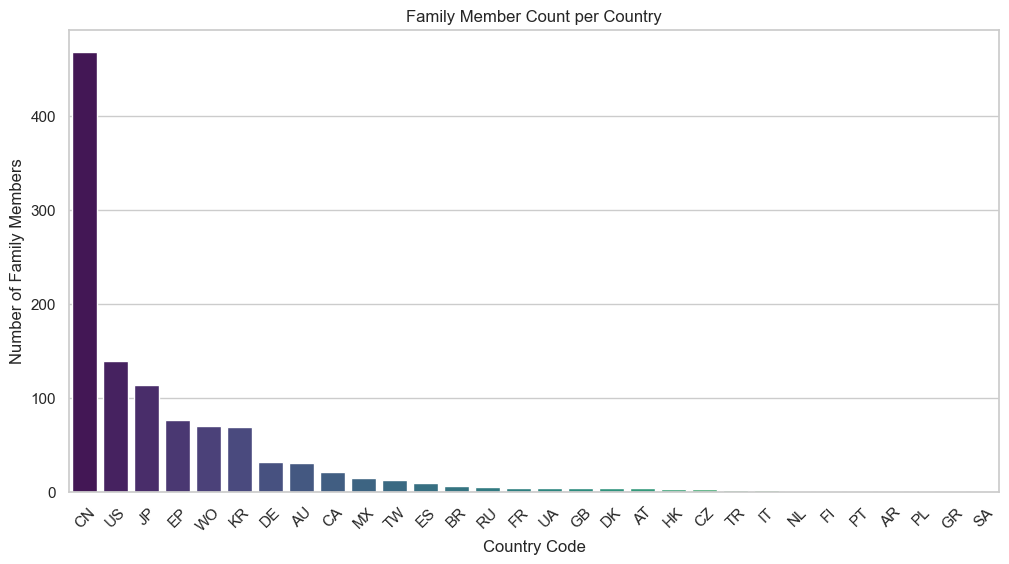

In [353]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))


sns.barplot(x='country_code', y='member_count', data=family_counts_df, palette='viridis')

plt.xlabel('Country Code')
plt.ylabel('Number of Family Members')
plt.title('Family Member Count per Country')
plt.xticks(rotation=45)  

plt.show()


market rate : toatl fam / total first filing

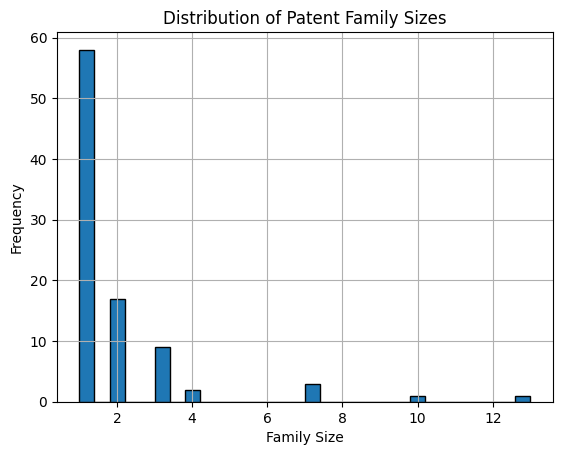

In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of family sizes
family_df_copy['family_size'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Patent Family Sizes')
plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Calculate filing counts by country
country_counts = pd.DataFrame(df['first publication country'].value_counts()).reset_index()
country_counts.columns = ['Country', 'Filing Counts']

# Display the resulting DataFrame
print(country_counts)


  Country  Filing Counts
0      CN             54
1      US             17
2      JP             12
3      WO              7
4      KR              7
5      TW              1
6      GB              1


country_counts['filing counts'] = df['first publication country'].value_counts().reset_index()

In [ ]:
country_counts.head()

Country  Filing Counts
0      CN             54
1      US             17
2      JP             12
3      WO              7
4      KR              7

In [ ]:
patent_counts.head()

first filing year  Patent Count  Cumulative Count        GR
0               1990             1                 1  0.000000
1               1997             2                 3  0.500000
2               1999             3                 6  0.222222
3               2000             3                 9  0.000000
4               2003             2                11 -0.100000

**visualisations and plots**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

In [ ]:
df.head(1)

No                                            Title  \
0   1  Plug-in hybrid vehicle with fast energy storage   

                                           Inventors  \
0  BENDER DONALD A [US] \nDESHMANE ATUL [US] \nME...   

                    Applicants Publication number Earliest priority  \
0  AFS TRINITY POWER CORP [US]     US2006250902A1        2005-05-05   

          IPC                                                CPC  \
0  [H04B1/20]  [B60K6/20 (KR), B60K6/28 (KR), B60K6/30 (EP,US...   

  Publication date Earliest publication  ...  earliest priority year  \
0       2006-11-09           2006-11-09  ...                    2005   

  applicant country family_members              first applicant  \
0                US             []  AFS TRINITY POWER CORP [US]   

  second applicant first applicant type second applicant type  Patent Age  \
0             None    Company - General               Unknown          20   

   patent cost Patent Value  
0        36000        36000  

[1 rows x 28 columns]

In [ ]:
applicant_counts

Applicants
GUANGDONG HYDROGEN ENERGY SCIENCE & TECH CO LTD    6
HOGREENAIR CO LTD [KR]                             2
YAZAKI CORP                                        2
FOSHAN XIANHU LABORATORY                           2
NIPPON SOKEN                                       2
                                                  ..
MEANEY JR DANIEL J [US]                            1
CHEJIXIU AUTOMOBILE TECH CO LTD                    1
SJZ-HANTREND ENERGY TECH CO LTD                    1
BEIJING BOYANG DINGRONG PV TECH CO LTD             1
LI KUNCHUN                                         1
Name: count, Length: 98, dtype: int64

In [ ]:
top_10_applicants_df

Applicant  Patent Count
0  GUANGDONG HYDROGEN ENERGY SCIENCE & TECH CO LTD             6
1                           HOGREENAIR CO LTD [KR]             2
2                                      YAZAKI CORP             2
3                         FOSHAN XIANHU LABORATORY             2
4                                    NIPPON SOKEN              2
5                         BEIQI FOTON MOTOR CO LTD             2
6                               HONDA MOTOR CO LTD             2
7                                YOUON TECH CO LTD             2
8                          HONDA MOTOR CO LTD [JP]             2
9                                       PAHPS [KR]             2

C:\Users\tasni\AppData\Local\Temp\ipykernel_388\3140164756.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Patent Count', y='Applicant', data=top_10_applicants_df, palette='magma')


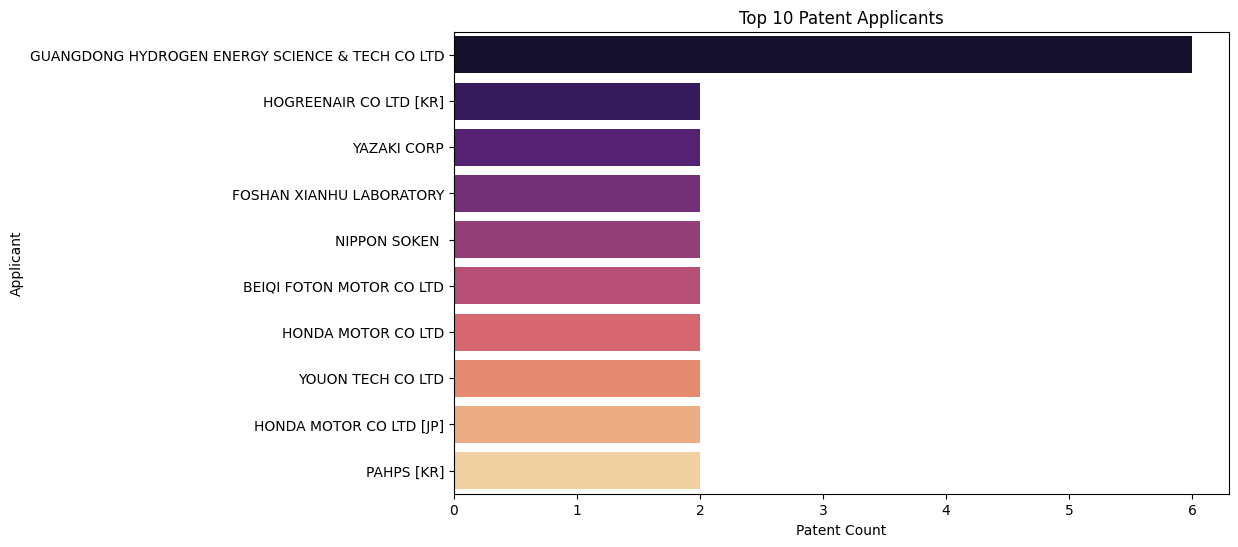

In [ ]:
#top 10 applicants 


plt.figure(figsize=(10, 6))
sns.barplot(x='Patent Count', y='Applicant', data=top_10_applicants_df, palette='magma')
plt.title('Top 10 Patent Applicants')
plt.show()

Network Analysis of Applicants

Creating Collaboration Network Graph...


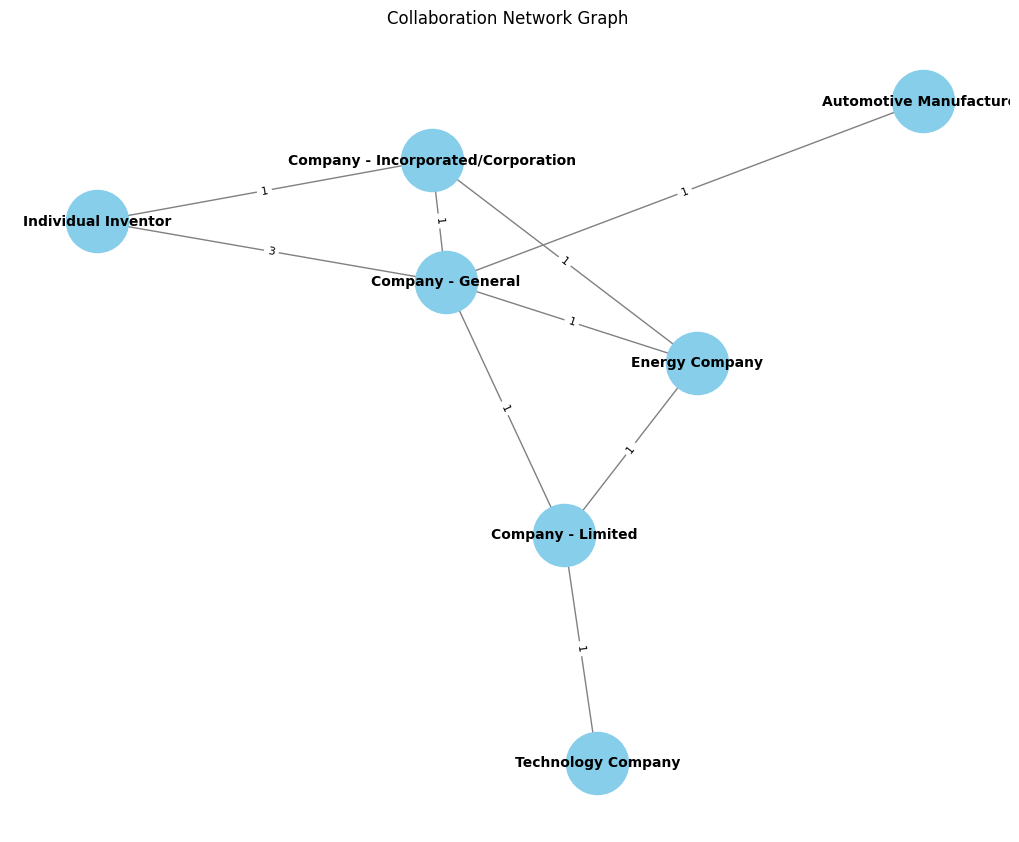

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def create_collaboration_network(df):
    """
    Creates and visualizes a collaboration network graph between 'First Applicant Type' and 'Second Applicant Type',
    after removing rows that contain 'Unknown'.
    """
    print("Creating Collaboration Network Graph...")

    
    df_filtered = df.copy()

    
    df_filtered = df_filtered[
        (df_filtered['first applicant type'] != "Unknown") & 
        (df_filtered['second applicant type'] != "Unknown")
    ]

   
    df_filtered = df_filtered[['first applicant type', 'second applicant type']].dropna()

    
    G = nx.Graph()

    # Add edges (collaborations)
    for _, row in df_filtered.iterrows():
        applicant1, applicant2 = row['first applicant type'], row['second applicant type']
        if applicant1 != applicant2:  
            if G.has_edge(applicant1, applicant2):
                G[applicant1][applicant2]['weight'] += 1 
            else:
                G.add_edge(applicant1, applicant2, weight=1)

    
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)  

    
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", edge_color="gray", font_size=10, font_weight="bold")

    
    edge_labels = {(u, v): d["weight"] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    plt.title("Collaboration Network Graph ")
    plt.show()

    return G  

create_collaboration_network(df)


**top IPC codes**

In [ ]:
df['IPC'].head(2)

0                                           [H04B1/20]
1    [B60L53/12, B60L53/38, B60L53/54, B60L53/66, B...
Name: IPC, dtype: object

In [ ]:
import pandas as pd
from ast import literal_eval

# Convert string representations of lists into actual lists
df['IPC'] = df['IPC'].apply(lambda x: literal_eval(x) if isinstance(x, str) else x)

# Explode the IPC lists into individual rows
all_ipc = df['IPC'].explode()

# Count frequencies and extract sorted list of most common IPC classes
most_common_ipc = all_ipc.value_counts().index.tolist()


C:\Users\tasni\AppData\Local\Temp\ipykernel_388\3970486454.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Main IPC', data=main_ipc_df, palette='plasma')


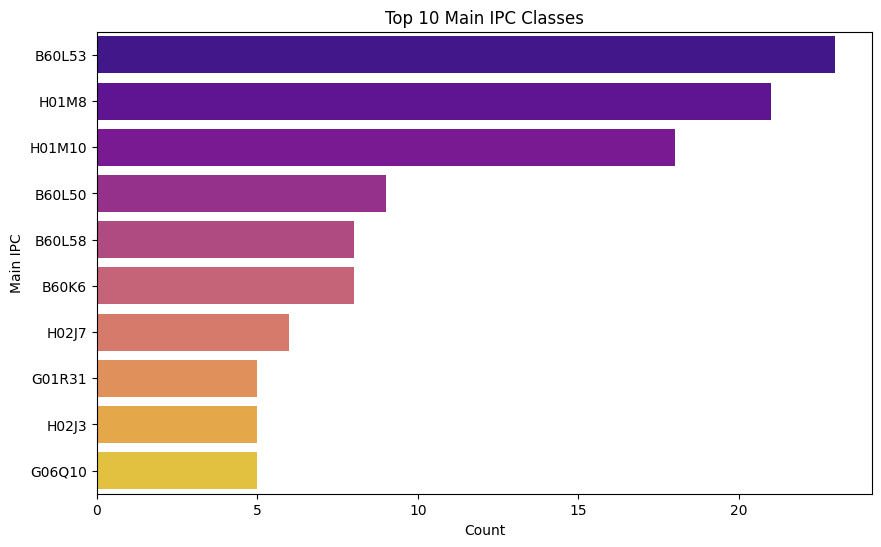

In [ ]:

main_ipc = [code.split('/')[0] for code in most_common_ipc]

# Count main CPC frequencies
main_ipc_counts = Counter(main_ipc).most_common(10)
main_ipc_df = pd.DataFrame(main_ipc_counts, columns=['Main IPC', 'Count'])


plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Main IPC', data=main_ipc_df, palette='plasma')
plt.title('Top 10 Main IPC Classes')
plt.show()

geographical analysis 

In [ ]:
country_counts.head()

Country  Filing Counts
0      CN             54
1      US             17
2      JP             12
3      WO              7
4      KR              7

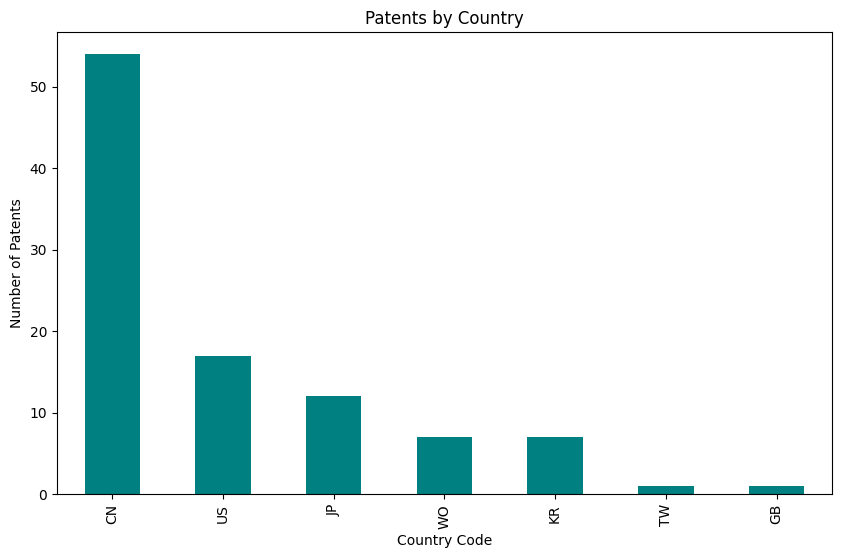

In [ ]:
# Extract country codes
df['Country'] = df['Publication number'].str[:2]

# Count patents by country
pub_country_counts = df['Country'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
pub_country_counts.plot(kind='bar', color='teal')
plt.title('Patents by Country')
plt.xlabel('Country Code')
plt.ylabel('Number of Patents')
plt.show()

**market and R&D**

In [ ]:
df = df.reset_index(drop=True)
family_df_copy = family_df_copy.reset_index(drop=True)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Build a relationship DataFrame that links each origin country to its filing countries.
records = []
for idx, row in family_df_copy.iterrows():
    # Get the origin country for this patent 
    origin = df.loc[idx, 'first publication country']
    # Record an entry for each filing country in the family
    for filing in row['country_codes']:
        records.append({'origin_country': origin, 'filing_country': filing})

relation_df = pd.DataFrame(records)

# Step 3: Group by origin and filing country to count the occurrences
grouped_df = relation_df.groupby(['origin_country', 'filing_country']).size().reset_index(name='count')

# Step 4: Pivot the grouped DataFrame so that each row is an origin country and each column is a filing country
pivot_df = grouped_df.pivot(index='origin_country', columns='filing_country', values='count').fillna(0)

import matplotlib.pyplot as plt

# Sort the pivot table by total filings per origin country 
pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=True).index]





In [ ]:
grouped_df.head(10)

origin_country filing_country  count
0             CN             AU      4
1             CN             CA      3
2             CN             CN     32
3             CN             DE      1
4             CN             EP      4
5             CN             GB      2
6             CN             JP     10
7             CN             KR      6
8             CN             MX      1
9             CN             TR      2

In [ ]:
pivot_df.head()

filing_country   AU   CA    CN   DE   EP   GB   JP   KR   MX   TR   TW   US  \
origin_country                                                                
TW              0.0  0.0   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
GB              0.0  0.0   0.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0  1.0   
KR              0.0  0.0   5.0  0.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0   
WO              0.0  0.0   4.0  0.0  0.0  1.0  3.0  1.0  0.0  0.0  0.0  1.0   
US              0.0  1.0  15.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  6.0   

filing_country   WO  
origin_country       
TW              0.0  
GB              0.0  
KR              2.0  
WO              1.0  
US              3.0

<Figure size 1200x800 with 0 Axes>

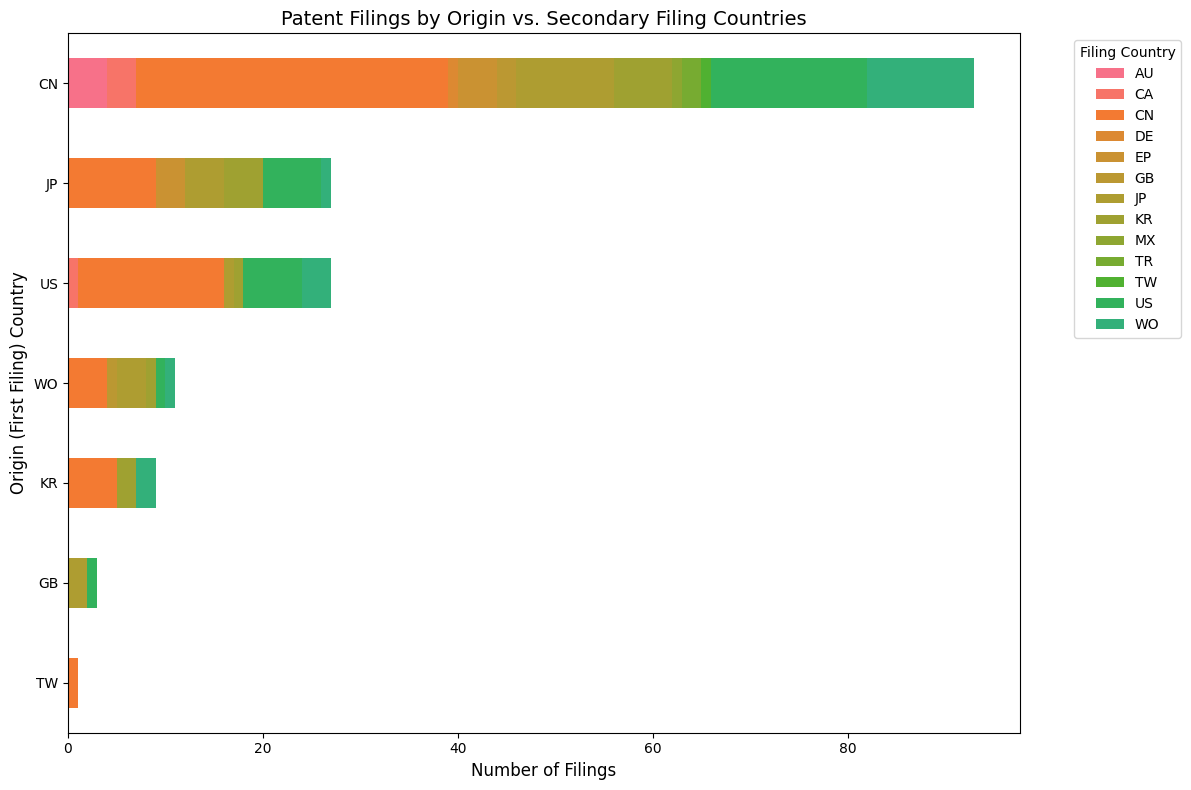

In [ ]:
# Plot the stacked horizontal bar chart
plt.figure(figsize=(12, 8))
# pivot_df.plot(kind='barh', stacked=True, colormap='tab20', figsize=(12, 8))
colors = sns.color_palette("husl", 30)  # Generates 30 distinct colors
pivot_df.plot(kind='barh', stacked=True, color=colors, figsize=(12, 8))

# Titles and labels
plt.title('Patent Filings by Origin vs. Secondary Filing Countries', fontsize=14)
plt.xlabel('Number of Filings', fontsize=12)
plt.ylabel('Origin (First Filing) Country', fontsize=12)

# Adjust legend
plt.legend(title='Filing Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_patent_filing_relationships(family_df, main_df):
    """
    Visualizes the relationship between origin countries and their filing countries.
    
    Parameters:
    - family_df: DataFrame containing 'country_codes' column with filing countries
    - main_df: Original DataFrame containing 'first publication country' column
    """
    # Step 1: Build relationship DataFrame
    records = []
    for idx, row in family_df.iterrows():
        origin = main_df.loc[idx, 'first publication country']
        for filing in row['country_codes']:
            records.append({
                'origin_country': origin, 
                'filing_country': filing
            })
    
    relation_df = pd.DataFrame(records)
    
    # Step 2: Count occurrences and pivot
    grouped_df = relation_df.groupby(['origin_country', 'filing_country']).size().reset_index(name='count')
    pivot_df = grouped_df.pivot(index='origin_country', columns='filing_country', values='count').fillna(0)
    
    # Step 3: Sort by total filings (descending)
    pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=False).index]
    
    # Step 4: Plotting
    plt.figure(figsize=(14, 10))
    
    # Use a color palette with enough distinct colors
    num_countries = len(pivot_df.columns)
    colors = sns.color_palette("husl", num_countries)
    
    # Plot stacked horizontal bars
    pivot_df.plot(kind='barh', 
                 stacked=True, 
                 color=colors,
                 ax=plt.gca())
    
    # New improved titles and labels
    plt.title('International Patent Protection Strategy by Country\n'
             '(Where patents from each origin country are subsequently filed)',
             fontsize=16, pad=20)
    
    plt.xlabel('Total Patent Family Members Filed in Each Jurisdiction', 
              fontsize=12)
    plt.ylabel('Country of First Filing (Origin Country)', 
              fontsize=12)
    
    plt.legend(title='Secondary Filing Countries', 
               bbox_to_anchor=(1.05, 1), 
               loc='upper left',
               fontsize=10,
               frameon=True)
    
    # Add explanatory annotation
    plt.annotate('Each bar shows where patents originating in the country (left axis)\n'
                'were subsequently filed internationally (colored segments)',
                xy=(0.5, -0.15),
                xycoords='axes fraction',
                ha='center',
                fontsize=11,
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    plt.xlabel('Number of Filings', fontsize=12)
    plt.ylabel('Origin (First Filing) Country', fontsize=12)
    
    # Improve legend
    plt.legend(title='Filing Country', 
               bbox_to_anchor=(1.05, 1), 
               loc='upper left',
               fontsize=10)
    
    # Add grid lines for better readability
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    
    return pivot_df

# Usage:
# pivot_results = plot_patent_filing_relationships(family_df_copy, df)

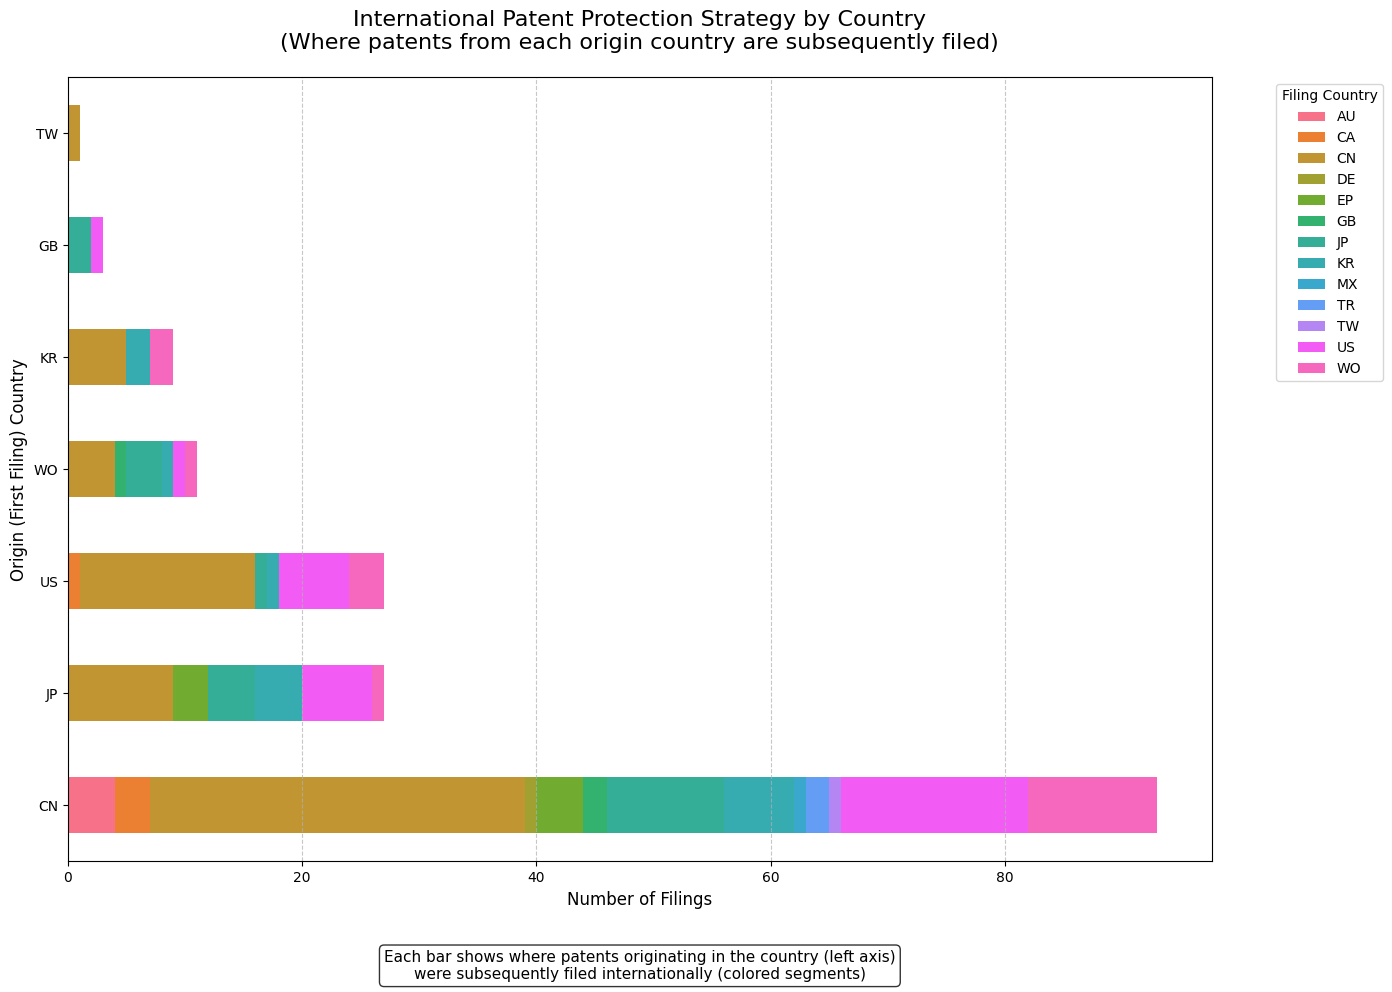

In [ ]:
# Call the function with your DataFrames
result_df = plot_patent_filing_relationships(family_df_copy, df)

In [ ]:
def plot_patent_receipts(family_df, main_df):
    """
    Visualizes the international flow of patents - showing which countries send patents to others.
    
    Parameters:
    - family_df: DataFrame containing 'country_codes' (list of countries where each patent was filed)
    - main_df: Original DataFrame containing 'first publication country' (country where each patent originated)
    """
    # Build relationship data
    records = []
    for idx, row in family_df.iterrows():
        source = main_df.loc[idx, 'first publication country']
        for receiver in row['country_codes']:
            records.append({
                'source_country': source,
                'receiver_country': receiver
            })
    
    relation_df = pd.DataFrame(records)
    
    # Count and pivot the data
    grouped_df = relation_df.groupby(['receiver_country', 'source_country']).size().reset_index(name='count')
    pivot_df = grouped_df.pivot(index='receiver_country', columns='source_country', values='count').fillna(0)
    
    # Sort by total received patents (descending)
    pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=False).index]
    
    # Create the visualization
    plt.figure(figsize=(14, 10))
    colors = sns.color_palette("husl", len(pivot_df.columns))
    
    # Plot the stacked horizontal bars
    pivot_df.plot(kind='barh', 
                 stacked=True, 
                 color=colors,
                 ax=plt.gca())
    
    # Enhanced titles and labels
    plt.title('International Patent Flow: Where Countries Receive Their Patents From\n'
             '(Shows which countries file patents in each jurisdiction)',
             fontsize=16, pad=20)
    
    plt.xlabel('Total Number of Patents Received', fontsize=12)
    plt.ylabel('Patent Receiving Country', fontsize=12)
    
    # Improved legend
    plt.legend(title='Patent Origin Countries', 
               bbox_to_anchor=(1.05, 1), 
               loc='upper left',
               fontsize=10,
               frameon=True)
    
    # Add explanatory note
    plt.annotate('Each bar represents a country that receives patents\n'
                'Colors show which countries those patents originally came from\n'
                'Longer bars indicate more total patent filings in that country',
                xy=(0.5, -0.15),
                xycoords='axes fraction',
                ha='center',
                fontsize=11,
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)  # Make room for annotation
    plt.show()
    
    return pivot_df

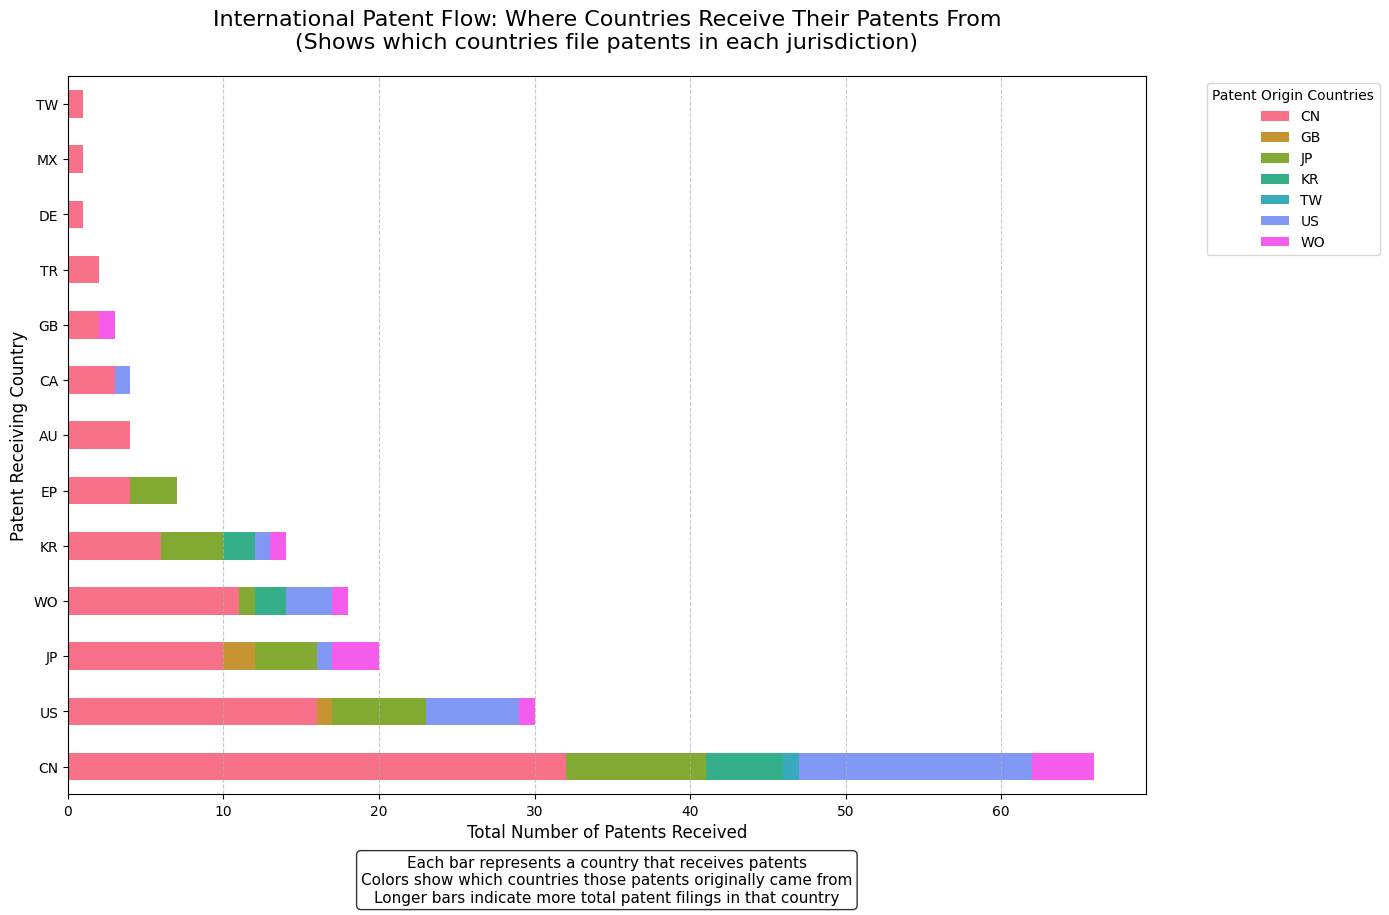

In [ ]:
receipt_df = plot_patent_receipts(family_df_copy, df)

In [ ]:
#pivot_df.to_excel('pivot_table.xlsx')

In [ ]:
family_counts_df.head()

country_code  member_count
0           CN            66
1           US            30
2           JP            20
3           WO            18
4           KR            14

In [ ]:
#family_counts_df.to_csv('family_pub_country_counts.csv')

trend over time

C:\Users\tasni\AppData\Local\Temp\ipykernel_388\2954057496.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Publication Year'] = pd.to_datetime(df['Publication date'], errors='coerce', infer_datetime_format=True).dt.year


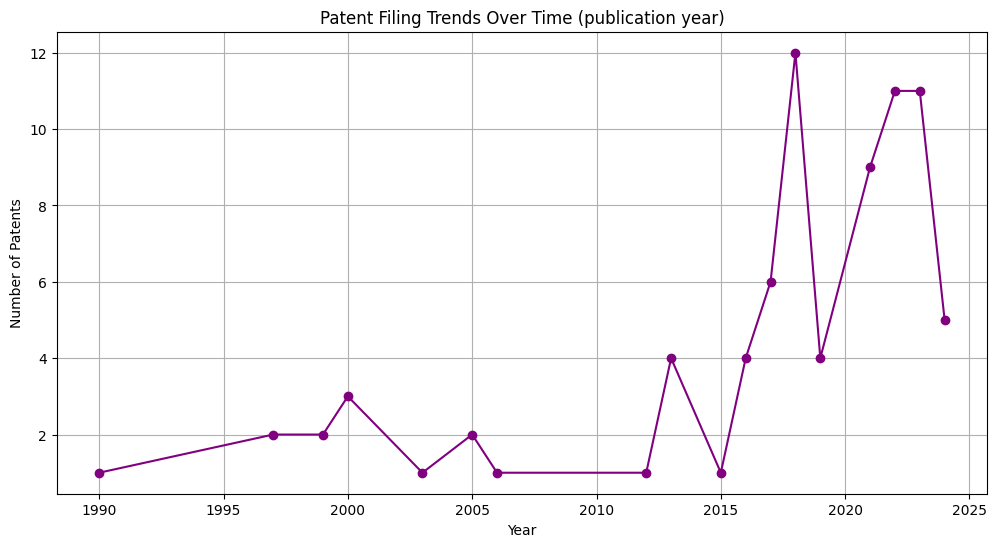

In [ ]:
# Extract year from publication date (assuming format: 'YYYY-MM-DD')
df['Publication Year'] = pd.to_datetime(df['Publication date'], errors='coerce', infer_datetime_format=True).dt.year

# Count patents by year
yearly_counts = df['Publication Year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='line', marker='o', color='purple')
plt.title('Patent Filing Trends Over Time (publication year)')
plt.xlabel('Year')
plt.ylabel('Number of Patents')
plt.grid(True)
plt.show()


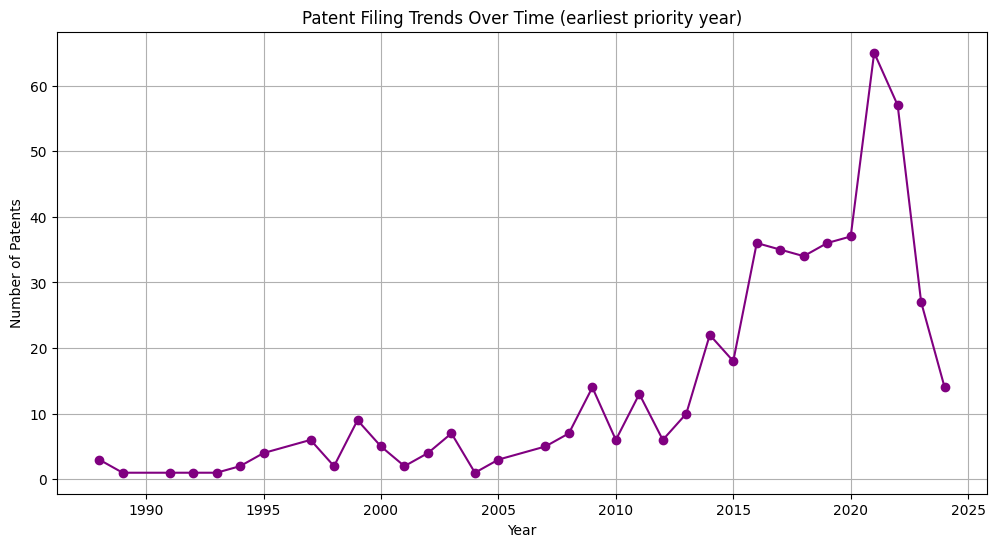

In [ ]:
# Extract year from publication date (assuming format: 'YYYY-MM-DD')
#df['Publication Year'] = pd.to_datetime(df['Publication date'], errors='coerce', infer_datetime_format=True).dt.year

# Count patents by year
yearly_counts = df['earliest priority year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='line', marker='o', color='purple')
plt.title('Patent Filing Trends Over Time (earliest priority year)')
plt.xlabel('Year')
plt.ylabel('Number of Patents')
plt.grid(True)
plt.show()


word cloud for innovation themes

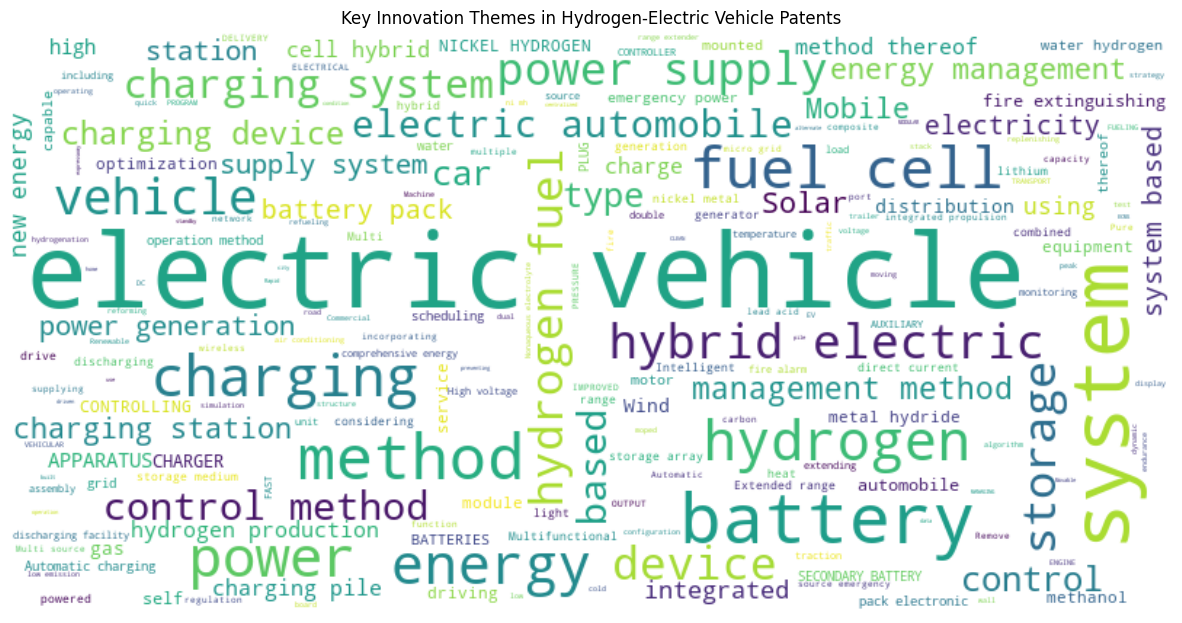

In [ ]:
# Combine all titles
text = ' '.join(df['Title'].dropna().astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Key Innovation Themes in Hydrogen-Electric Vehicle Patents')
plt.show()

Patent Age Distribution:


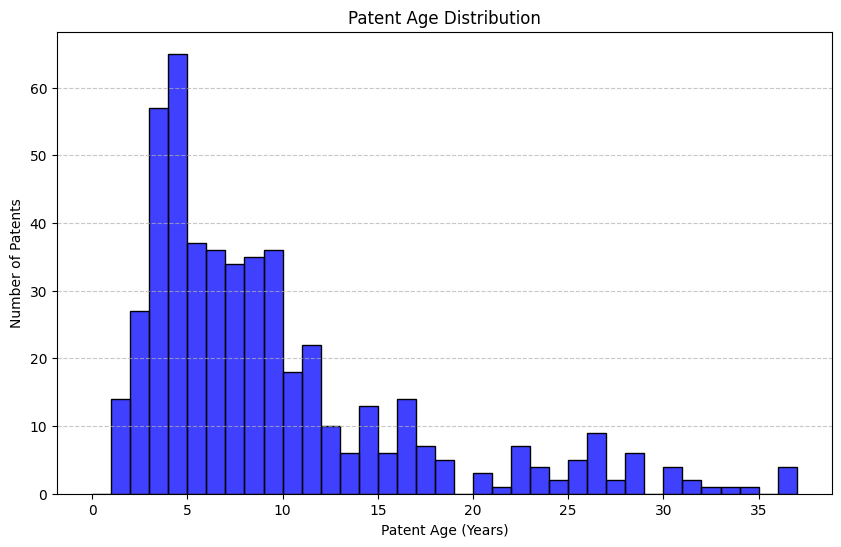

In [ ]:
age_distribution = df['Patent Age'].value_counts().sort_index()

# Display the distribution
print("Patent Age Distribution:")
#print(age_distribution)

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Patent Age'], bins=range(0, df['Patent Age'].max() + 1), kde=False, color='blue')
plt.title('Patent Age Distribution')
plt.xlabel('Patent Age (Years)')
plt.ylabel('Number of Patents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()